In [14]:
import os 
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('./models/')
from useful_functions import df_to_dict, concat_dico, get_classement, sort_list


In [15]:
models1Dnames=['ARIMA', 'Exponential', 'Moving Average', 'SIRH1', 'SIRH2', 'SIRH3', 'SIRH4', 'Linear Regression', 'Bayesian Regression']
models3Dnames=[ 'VAR', 'Exponential Multi', 'Moving Average Multi', 'SIRH Multi1', 'SIRH Multi2']


In [16]:
from useful_functions import classify
# def classify(point, pandemic) : 
#     if pandemic[point] < 100 : 
#         return ('stable')
#     der = (1/7)*(pandemic[point] - pandemic[point-7]) / pandemic[point]
#     if  der < -0.05: 
#         return  'big decrease'
#     elif der <-0.03:
#         return 'decrease'
#     elif der < 0.03 :
#         return 'stable'
#     elif der < 0.2 :
#         return 'increase'
#     else : 
#         return 'big increase'

Classification of r_eff

In [59]:
r_eff_list=[]
index_points=[20*i for i in range(1, 15)]
r_eff_list_big_increase=[]
r_eff_list_increase=[]
r_eff_list_stable=[]
r_eff_list_decrease=[]
r_eff_list_big_decrease=[]
r_eff_list_inflexion=[]
countpetit=0
allcount=0


for name in os.listdir('./all_pandemics/') : 
    df=pd.read_csv('./all_pandemics/'+name)
    df.drop(columns=['Unnamed: 0'], inplace=True)
    df.index=['n_hospitalized', 'n_infectious', 'mobility', 'R_eff']
    n_hospitalized=(np.array(df.loc['n_hospitalized']))
    r_effs=(np.array(df.loc['R_eff']))
    for i in range( len(index_points)):
        allcount+=1
        r_eff_list.append(r_effs[index_points[i]])
        if classify(index_points[i], n_hospitalized) == 'big increase':
            r_eff_list_big_increase.append(r_effs[index_points[i]])
        elif classify(index_points[i], n_hospitalized) == 'increase':
            r_eff_list_increase.append(r_effs[index_points[i]])
        elif classify(index_points[i], n_hospitalized) == 'stable':
            r_eff_list_stable.append(r_effs[index_points[i]])
        elif classify(index_points[i], n_hospitalized) == 'decrease':
            r_eff_list_decrease.append(r_effs[index_points[i]])
        elif classify(index_points[i], n_hospitalized) == 'big decrease':
            r_eff_list_big_decrease.append(r_effs[index_points[i]])
        elif classify(index_points[i], n_hospitalized) == 'inflexion':
            r_eff_list_inflexion.append(r_effs[index_points[i]])
        else:
            print('error')
            break
        if n_hospitalized[index_points[i]] < 100:
            countpetit+=1
    



In [60]:
countpetit/allcount

0.43805114638447973

In [18]:
a, b, c, d = np.quantile(r_eff_list, 0.1), np.quantile(r_eff_list, 0.3), np.quantile(r_eff_list, 0.7), np.quantile(r_eff_list, 0.9)

In [19]:
# def classify_bis(point, r_effs): # with quantile 

#     if r_effs[point] < a:
#         return 'big decrease'
#     elif r_effs[point] < b:
#         return 'decrease'
#     elif r_effs[point] < c:
#         return 'stable'
#     elif r_effs[point] < d:
#         return 'increase'
#     else:
#         return 'big increase'

In [20]:
def classify_bis(point, r_effs): # with my nose 

    if r_effs[point] < 0.5:
        return 'big decrease'
    elif r_effs[point] < 0.8:
        return 'decrease'
    elif r_effs[point] < 1.2:
        return 'stable'
    elif r_effs[point] < 3:
        return 'increase'
    else:
        return 'big increase'

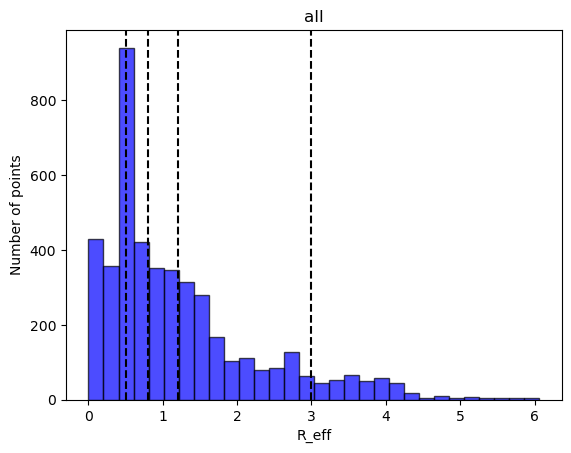

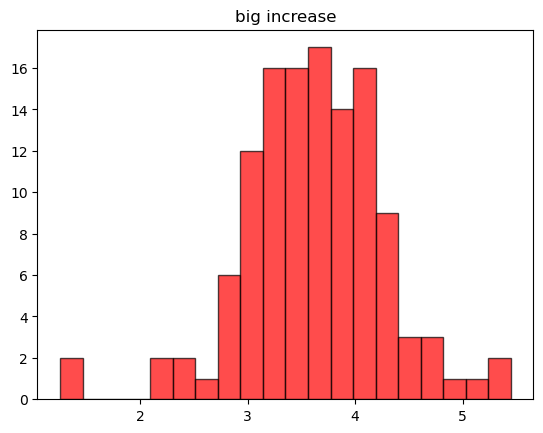

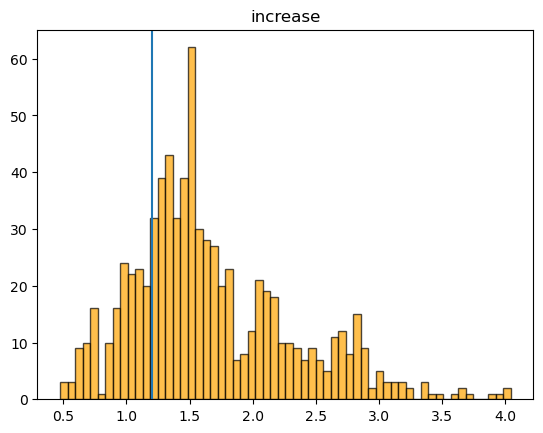

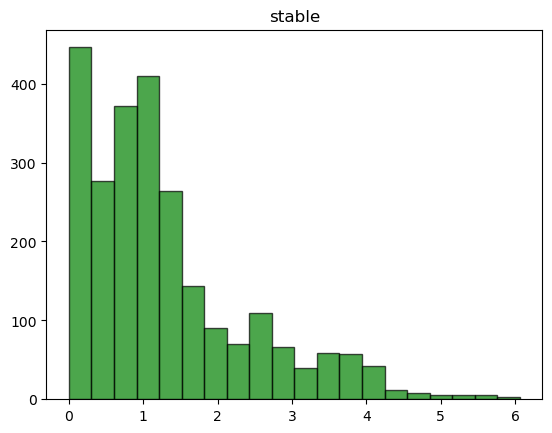

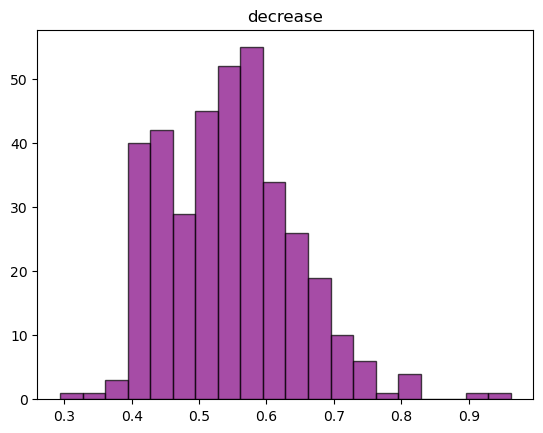

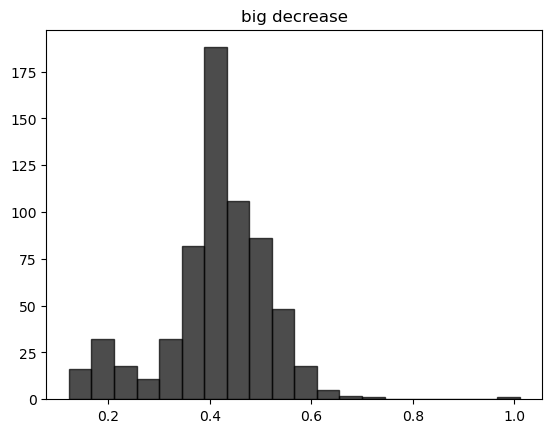

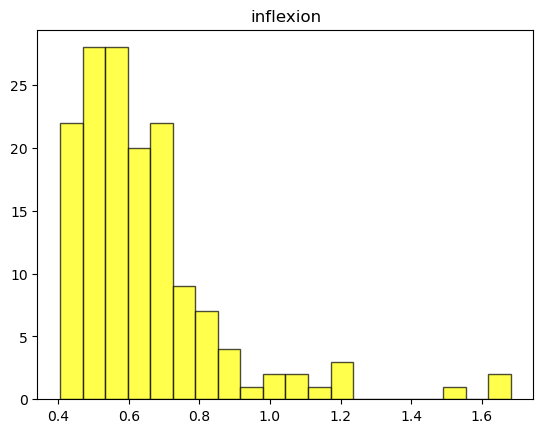

In [52]:
plt.hist(r_eff_list, bins=30, color='blue', alpha=0.7, label='all', edgecolor='black')
plt.title('all')
plt.axvline(x=0.5, color='black', linestyle='--')
plt.axvline(x=0.8, color='black', linestyle='--')
plt.axvline(x=1.2, color='black', linestyle='--')
plt.axvline(x=3, color='black', linestyle='--')
plt.xlabel('R_eff')
plt.ylabel('Number of points')
plt.show()
plt.hist(r_eff_list_big_increase, bins=20, color='red', alpha=0.7, label='big increase', edgecolor='black')
plt.title('big increase')
plt.show()
plt.hist(r_eff_list_increase, bins=60, color='orange', alpha=0.7, label='increase', edgecolor='black')
plt.title('increase')
plt.axvline(x=1.2)
plt.show()
plt.hist(r_eff_list_stable, bins=20, color='green', alpha=0.7, label='stable', edgecolor='black')
plt.title('stable')
plt.show()
plt.hist(r_eff_list_decrease, bins=20, color='purple', alpha=0.7, label='decrease', edgecolor='black')
plt.title('decrease')
plt.show()
plt.hist(r_eff_list_big_decrease, bins=20, color='black', alpha=0.7, label='big decrease', edgecolor='black')
plt.title('big decrease')
plt.show()
plt.hist(r_eff_list_inflexion, bins=20, color='yellow', alpha=0.7, label='inflexion', edgecolor='black')
plt.title('inflexion')
plt.show()


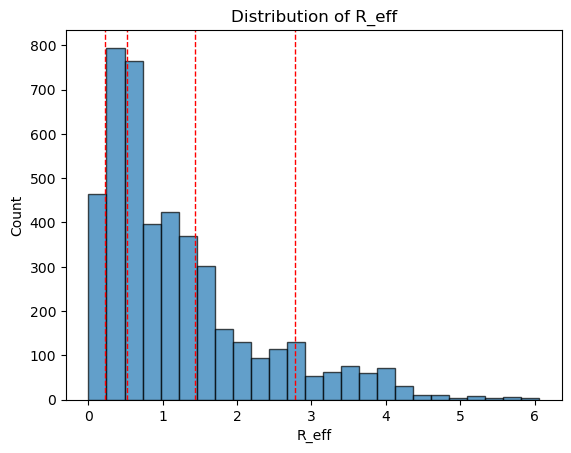

In [22]:
plt.hist(r_eff_list, bins=25,   alpha=0.7, edgecolor='black')
plt.axvline(a, color='red', linestyle='dashed', linewidth=1)
plt.axvline(b, color='red', linestyle='dashed', linewidth=1)
plt.axvline(c, color='red', linestyle='dashed', linewidth=1)
plt.axvline(d, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of R_eff')
plt.xlabel('R_eff')
plt.ylabel('Count')
plt.show()

In [23]:


def plot_pandemic(reach = 7 , mob = 0 , pand = 0 , type_of_model= '1D', loss='RMSE') : 

    df=pd.read_csv('./all_pandemics/pandemic_'+str(mob)+str('_')+str(pand)+'.csv')
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    n_hospitalized= np.array(df.loc[0])
    plt.plot(n_hospitalized)


    results=pd.read_csv('./results/global_evaluation_from_zero_corrected/evaluation_with_'+loss+'_of_'+type_of_model+'_models_on_pandemic_'+str(mob)+str('_')+str(pand)+'_and_reach_='+str(reach)+'.csv')
    results.drop(['Unnamed: 0'], axis=1, inplace=True)
    if type_of_model == '3D':
        models_names=models3Dnames
    elif type_of_model == '1D':
        models_names=models1Dnames
    results.index=models_names
    predictions=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+str('_')+str(pand)+'.csv')
    predictions.drop(['Unnamed: 0'], axis=1, inplace=True)
    predictions.index=[20 * i for i in range(1, 15)]
    label_dones=[]
    for point in results.columns :
        best_model=models_names[np.argmin(results[point])]
        id=int(point.split('[')[1].split(']')[0])
        if best_model not in label_dones : 
            plt.plot(id + reach, predictions[best_model].loc[id], 'o',color=colors_models[best_model],  label=best_model)
            label_dones.append(best_model)
        else : 
            plt.plot(id + reach, predictions[best_model].loc[id], 'o',color=colors_models[best_model])

    plt.title('Best '+type_of_model+' models according to '+loss+' and their predictions on pandemic ' + str(mob) + ' ' + str(pand))  
    plt.xlabel('Days')
    plt.ylabel('Number of hospitalized')
    plt.legend()
    plt.show()



In [24]:
# concatenate two df who have the same columns : 
def concat_df(df1, df2):
    if not df1.columns.equals(df2.columns):
        raise ValueError("Les deux DataFrames doivent avoir les mêmes colonnes."+str(df1.columns)+str(df2.columns))
    
    return pd.concat([df1, df2], axis=0)

In [25]:
dicocolor={'big decrease':'green', 'decrease':'lightgreen', 'stable':'yellow', 'increase':'orange', 'big increase':'red', 'inflexion':'blue'}
colors_models={'ARIMA':'blue', 'Exponential':'red', 'Moving Average':'green', 'SIRH1':'yellow', 'SIRH2':'orange', 'SIRH3':'purple', 'SIRH4':'pink', 'Linear Regression':'brown', 'Bayesian Regression':'black', 'VAR':'blue', 'Exponential Multi':'red', 'Moving Average Multi':'green', 'SIRH Multi1':'yellow', 'SIRH Multi2':'orange'}

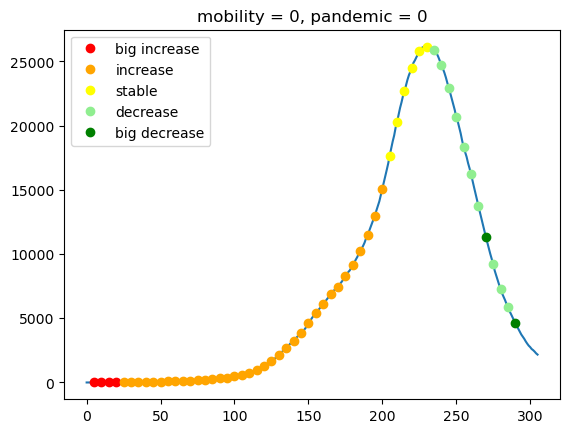

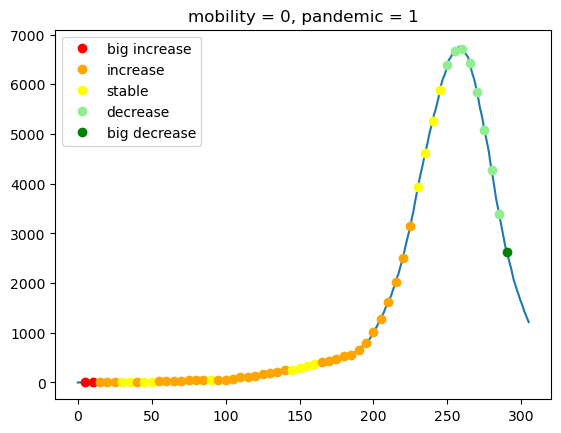

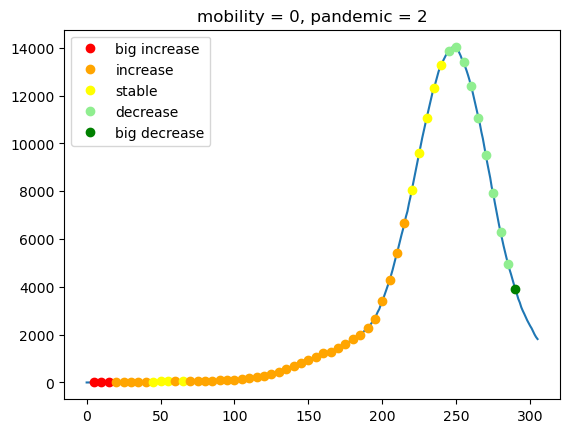

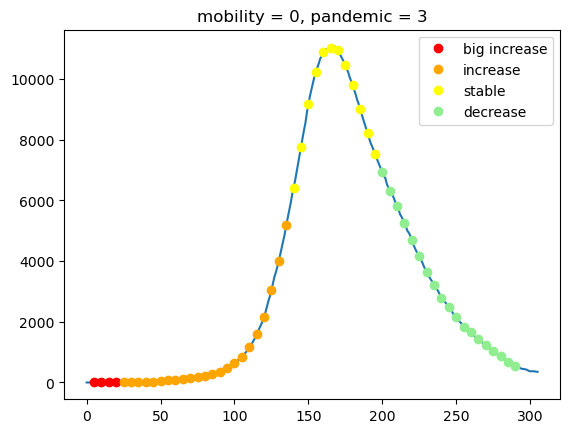

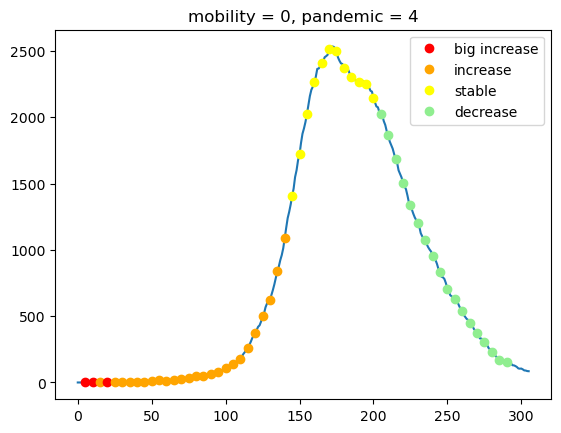

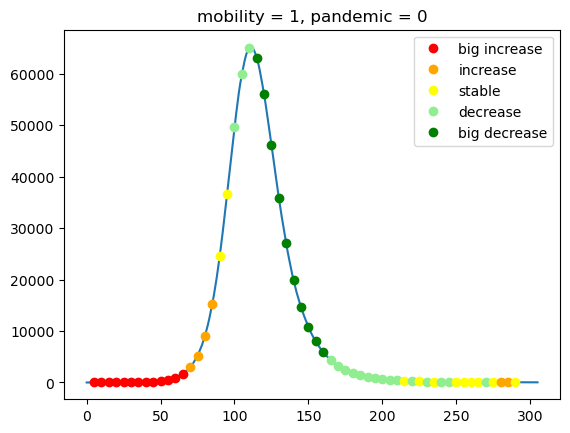

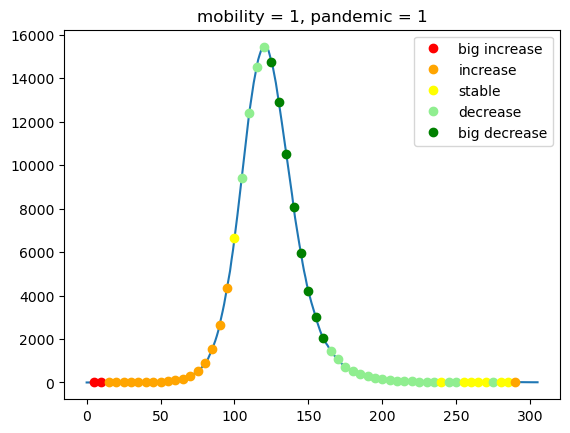

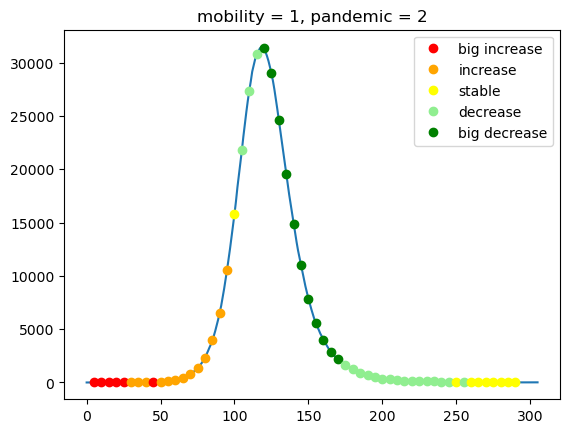

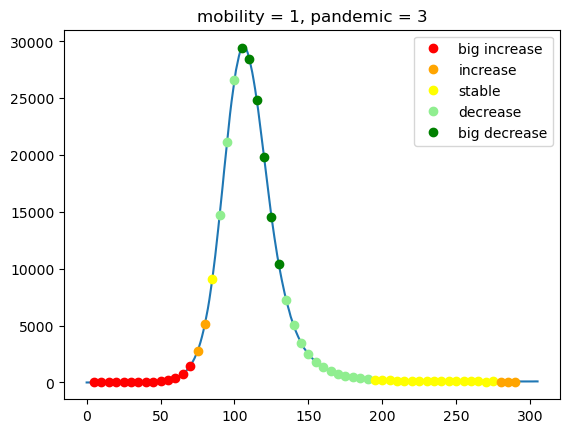

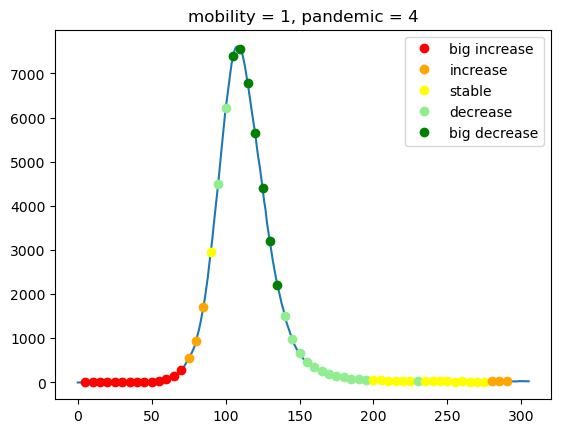

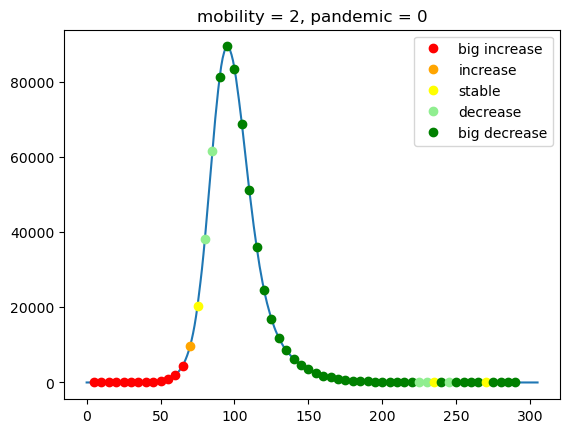

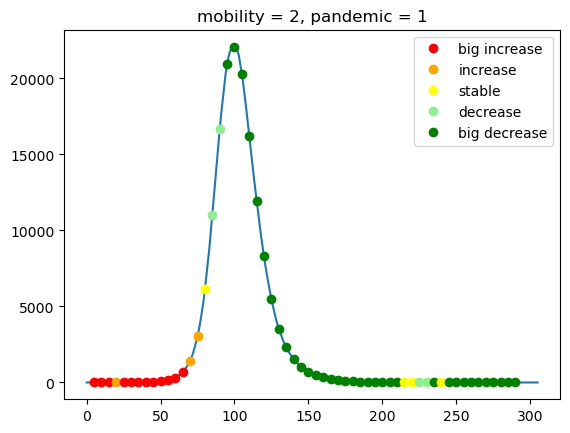

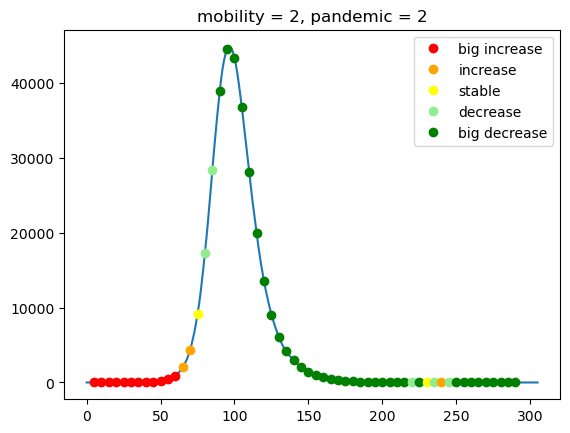

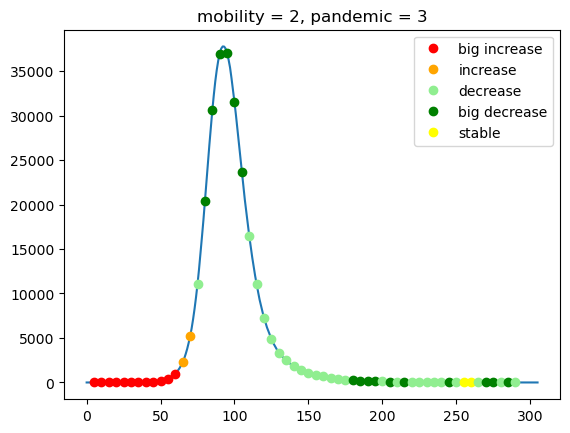

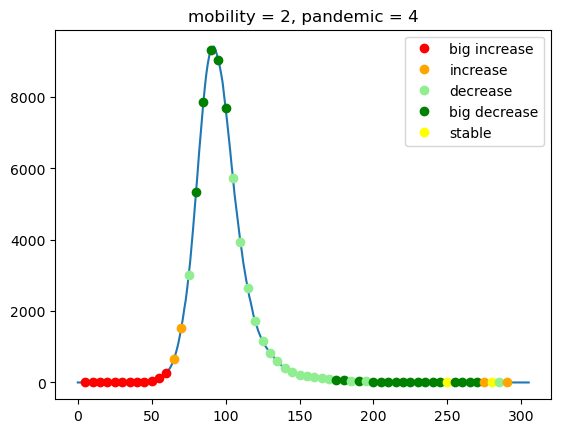

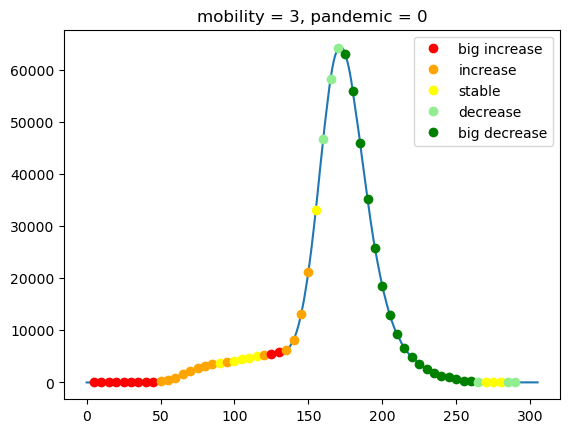

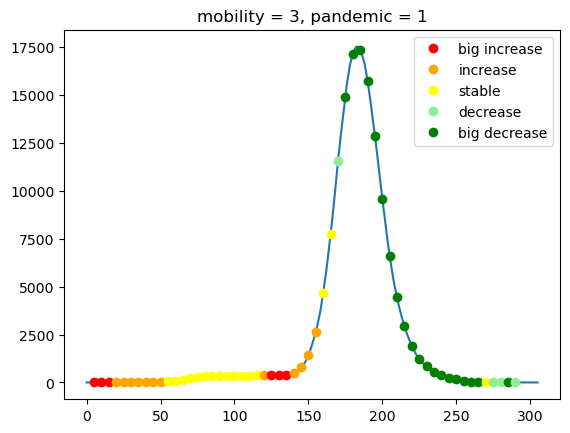

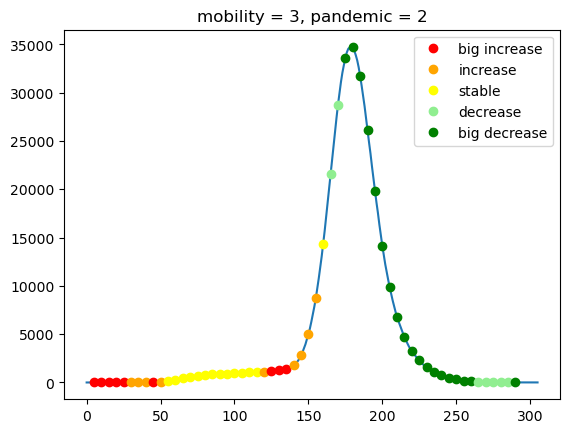

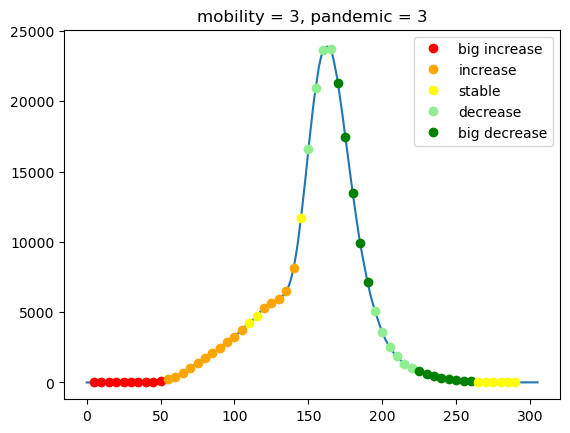

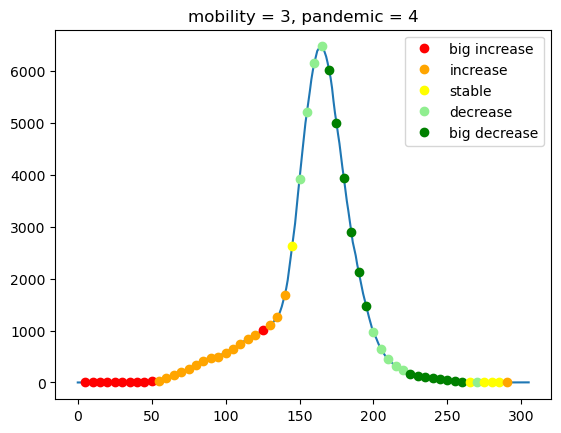

stable = 180
decrease = 248
increase = 284
big decrease = 275
big increase = 173
inflexion = 0


In [26]:
xs=[5*i for i in range(1, 59)]

countstable=0
countdecrease=0
countincrease=0
countbigdecrease=0
countbigincrease=0
countinflexion=0

for mob in range(4): 
    for pand in range(5): 
        label_seen = {}

        df= pd.read_csv('./all_pandemics/pandemic_'+str(mob)+'_'+str(pand)+'.csv')
        df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
        n_hospitalized = np.array(df.loc['n_hospitalized'])
        r_eff=np.array(df.loc['r_eff'])
        plt.plot(n_hospitalized)
        for x in xs : 
            # if classify(x, n_hospitalized) == 'stable' : 
            if classify_bis(x, r_eff) == 'stable' :
                countstable+=1
            # if classify(x, n_hospitalized) == 'decrease' : 
            if classify_bis(x, r_eff) == 'decrease' :
                countdecrease+=1
            # if classify(x, n_hospitalized) == 'increase' :
            if classify_bis(x, r_eff) == 'increase' : 
                countincrease+=1
            # if classify(x, n_hospitalized) == 'big decrease' : 
            if classify_bis(x, r_eff) == 'big decrease' :
                countbigdecrease+=1
            # if classify(x, n_hospitalized) == 'big increase' : 
            if classify_bis(x, r_eff) == 'big increase' :
                countbigincrease+=1
            # if classify(x, n_hospitalized) == 'inflexion' : 
            if classify_bis(x, r_eff) == 'inflexion' :
                countinflexion+=1
            # label = classify(x, n_hospitalized)
            label = classify_bis(x, r_eff)
            if label not in label_seen:
                plt.plot(x, n_hospitalized[x], 'o', color=dicocolor[label], label=label)
                label_seen[label] = True
            else:
                plt.plot(x, n_hospitalized[x], 'o', color=dicocolor[label])
        plt.title('mobility = '+str(mob)+', pandemic = '+str(pand))
        plt.legend()
        plt.show()

    
print('stable = ' +str(countstable))
print('decrease = ' +str(countdecrease))
print('increase = ' +str(countincrease))
print('big decrease = ' +str(countbigdecrease))
print('big increase = ' +str(countbigincrease))
print('inflexion = ' +str(countinflexion))


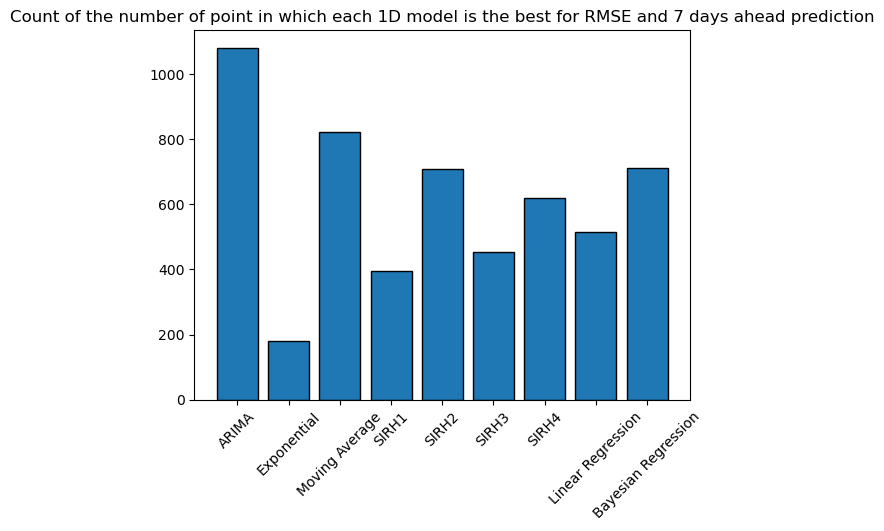

In [27]:

rmse_7_1D=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if 'RMSE' in name and '7' in name and '1D' in name]

counts=[0 for i in range(len(models1Dnames))]


for name in rmse_7_1D: 
    dicoresults=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
    for point in dicoresults.keys(): 
        counts[np.argmin(dicoresults[point])]+=1

# histogramme des résultats 
plt.bar(models1Dnames, counts, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Count of the number of point in which each 1D model is the best for RMSE and 7 days ahead prediction')
plt.show()


# rmse_14_1D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'RMSE' in name and '14' in name and '1D' in name]

# counts=[0 for i in range(len(models1Dnames))]


# for name in rmse_14_1D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1

# # histogramme des résultats 
# plt.bar(models1Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 1D model is the best for RMSE and 14 days ahead prediction')
# plt.show()


# wis_7_1D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'WIS' in name and '7' in name and '1D' in name]
# counts=[0 for i in range(len(models1Dnames))]
# for name in wis_7_1D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1


# plt.bar(models1Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 1D model is the best for WIS and 7 days ahead prediction')
# plt.show()

# wis_14_1D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'WIS' in name and '14' in name and '1D' in name]
# counts=[0 for i in range(len(models1Dnames))]
# for name in wis_14_1D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1


# plt.bar(models1Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 1D model is the best for WIS and 14 days ahead prediction')
# plt.show()



# rmse_7_3D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'RMSE' in name and '7' in name and '3D' in name]
# counts=[0 for i in range(len(models3Dnames))]
# for name in rmse_7_3D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1

# plt.bar(models3Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 3D model is the best for RMSE and 7 days ahead prediction')
# plt.show()


# rmse_14_3D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'RMSE' in name and '14' in name and '3D' in name]
# counts=[0 for i in range(len(models3Dnames))]
# for name in rmse_14_3D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1

# plt.bar(models3Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 3D model is the best for RMSE and 14 days ahead prediction')
# plt.show()


# wis_7_3D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'WIS' in name and '7' in name and '3D' in name]
# counts=[0 for i in range(len(models3Dnames))]
# for name in wis_7_3D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1

# plt.bar(models3Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 3D model is the best for WIS and 7 days ahead prediction')
# plt.show()


# wis_14_3D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'WIS' in name and '14' in name and '3D' in name]
# counts=[0 for i in range(len(models3Dnames))]
# for name in wis_14_3D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1

# plt.bar(models3Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 3D model is the best for WIS and 14 days ahead prediction')
# plt.show()


In [28]:
prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_7_days_on_pandemic_0_0.csv')
prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
prediction.index=[20*i for i in range(1, 15)]
prediction.drop('Exponential', axis=1, inplace=True)
prediction.drop('Exponential Multi', axis=1, inplace=True)
prediction.drop('Real values', axis=1, inplace=True)
prediction.loc[20].mean()

4.714170108003656

In [29]:
reach = 7 
mob = 0 
pand = 0 
prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
prediction.index=[20*i for i in range(1, 15)]
# prediction.drop('Exponential', axis=1, inplace=True)
# prediction.drop('Exponential Multi', axis=1, inplace=True)
prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)

# real_values= prediction['Real values']
prediction_all=prediction
prediction=prediction_bis

prediction_all

ARIMA    Exponential  Moving Average         SIRH1         SIRH2  \
20       1.333150   1.306084e+01        1.571429      9.827810      8.803629   
40      21.171660   8.910218e+01       33.714286     99.661023     20.798143   
60     117.895315  -1.538406e+15      100.000000     54.749639    105.679948   
80     243.873279   3.400776e+24      192.857143    113.847490    210.948970   
100    475.096136   2.414255e+32      397.714286    287.538600    461.237094   
120   1622.019546   7.576325e+35     1044.714286   1067.903821   1297.751090   
140   3973.043675  -4.537768e+50     2825.571429   3295.658866   3557.078504   
160   6853.691433  -1.947235e+59     5535.142857   5656.357900   6364.627471   
180  10026.704037  -2.831161e+67     8438.571429   7888.889101   9215.669998   
200  17592.593012   1.925866e+77    13419.000000   8237.941360  14914.994220   
220  26631.228551  -1.619831e+85    23094.142857  23094.142857  25268.325531   
240  22571.160088  -9.508508e+93    25645.571429  25645.571429  25608.337139   
260  13515.336024  3.874698e+102    17975.428571  17975.428571  15342.290789   
280   5355.128185  1.538774e+111     8786.000000   8786.000000   6733.877599   

            SIRH3         SIRH4  Linear Regression  Bayesian Regression  \
20       8.041876      7.892291           1.571429             2.004281   
40      31.471588     25.320916         233.950403           -13.670664   
60      94.942743    123.409355         263.986714           122.335549   
80     217.282122    236.772141         272.274413           272.441030   
100    373.698402    557.602643         561.571618           567.245932   
120   1108.614391   1550.775275        1838.795236          1871.396268   
140   3225.002198   4246.744736        4260.198763          4256.288816   
160   5774.823107   6702.287715        7010.955305          7082.867531   
180   8254.002225   9552.248510       10263.872875         10201.986588   
200  12372.471380  15756.856993       17939.565724         17900.820926   
220  21947.794834  25882.589024       26433.195683         26496.763321   
240  24491.915405  26759.589737       22323.344235         22416.435828   
260  13918.559446  15129.540331       14565.983804         14516.955086   
280   6564.941706   6736.243286        5665.301114          5664.053421   

              VAR  Exponential Multi  Moving Average Multi   SIRH Multi1  \
20       4.668383       1.571429e+00              1.571429      4.432150   
40      54.080831       4.728754e+01             33.714286     51.381132   
60     128.350007       1.098307e+02            100.000000    125.911428   
80     264.962311       2.315097e+02            192.857143    279.655080   
100    633.674161       5.710016e+02            397.714286    685.673605   
120   1725.616731       2.048899e+03           1044.714286   1578.907208   
140   4190.049746       4.329011e+03           2825.571429   3486.457806   
160   7077.657732       7.559936e+03           5535.142857   5710.766327   
180  10539.913288      -9.335441e+13           8438.571429   8784.508491   
200  17626.187980       3.297475e+21          13419.000000  13419.000000   
220  26557.182014       2.435546e+04          23094.142857  23094.142857   
240  23561.443008       4.423885e+24          25645.571429   8297.037473   
260  13761.129611       4.643509e+36          17975.428571   5269.978448   
280   5918.557501      -3.322768e+69           8786.000000   2337.626107   

      SIRH Multi2  Real values  
20       4.852185          5.0  
40      42.313275         64.0  
60     116.701097        138.0  
80     245.303962        278.0  
100    397.714286        590.0  
120   1617.986632       1726.0  
140   4037.393657       3972.0  
160   6979.057608       6988.0  
180  10443.500212      10416.0  
200  16871.445643      18219.0  
220  26446.003235      25971.0  
240  25283.049261      22501.0  
260  14576.602037      13261.0  
280   6379.243390       5560.0

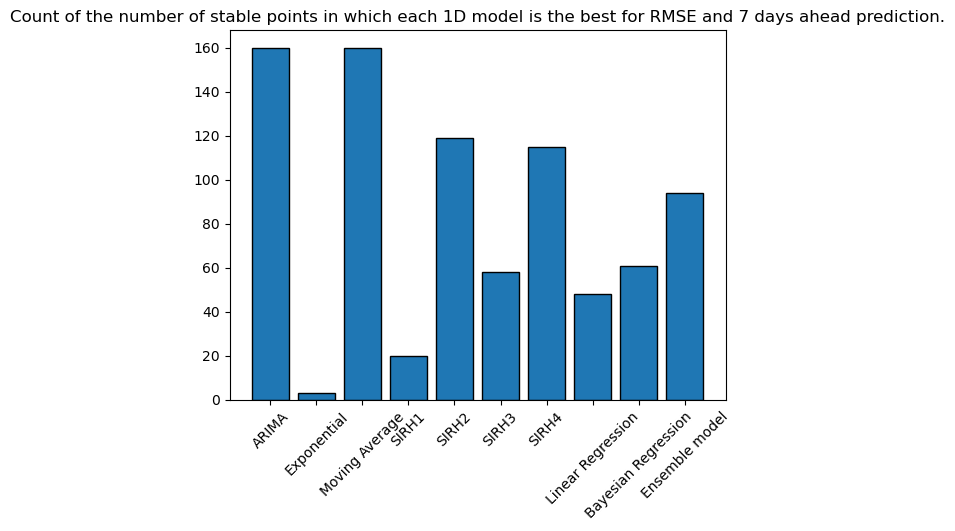

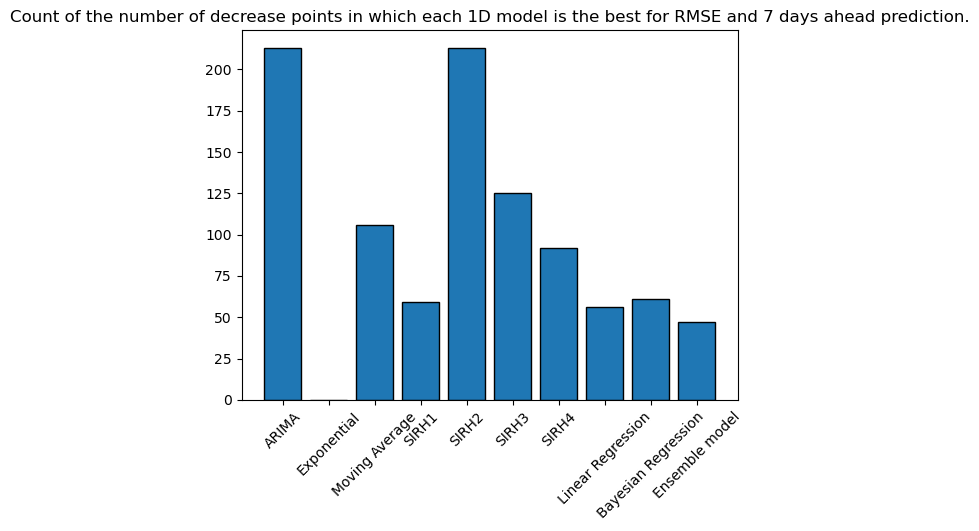

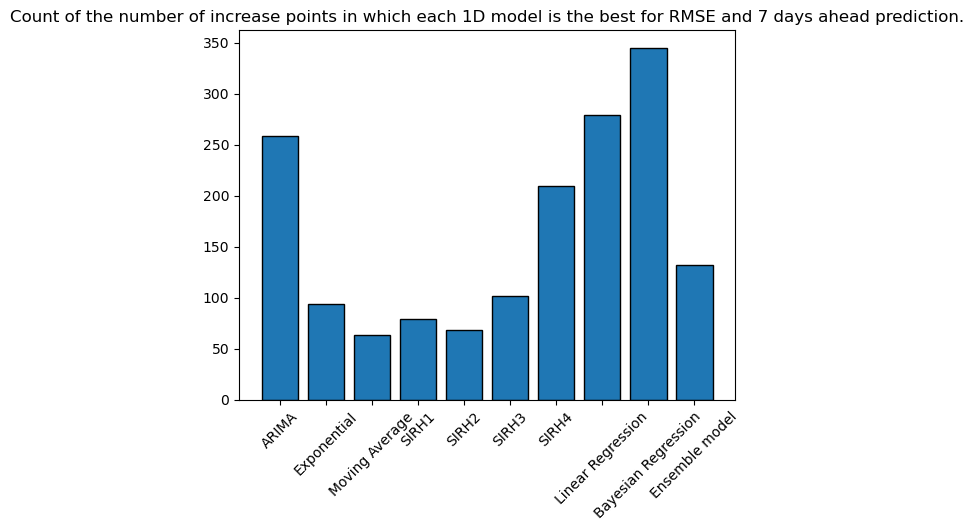

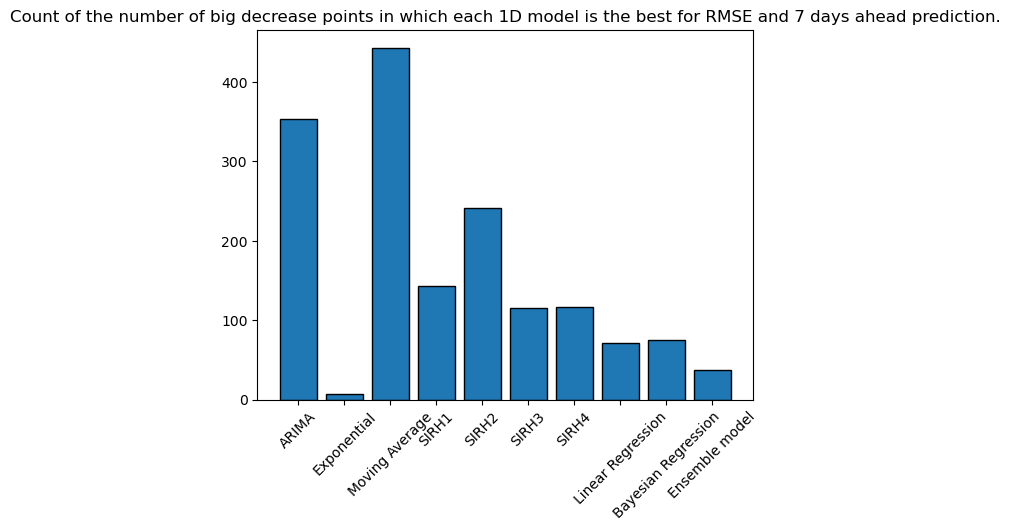

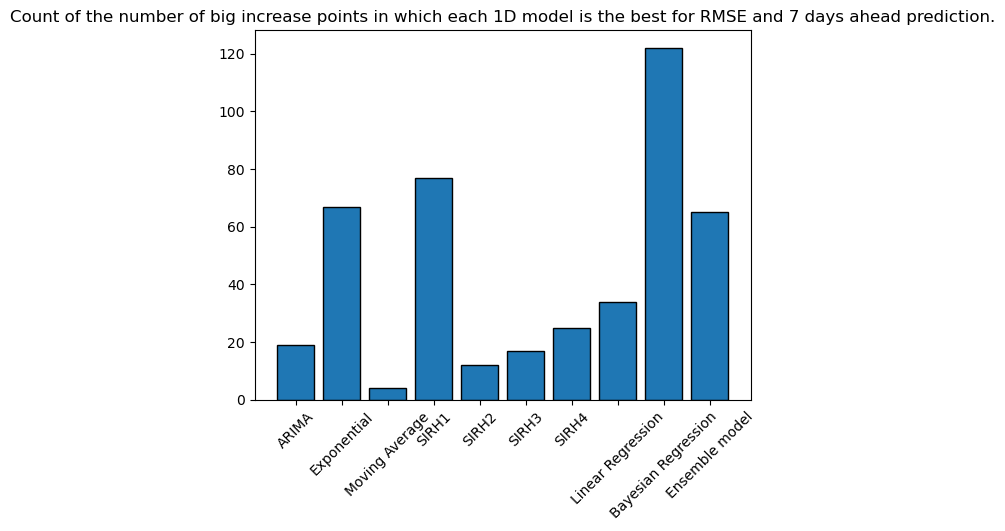

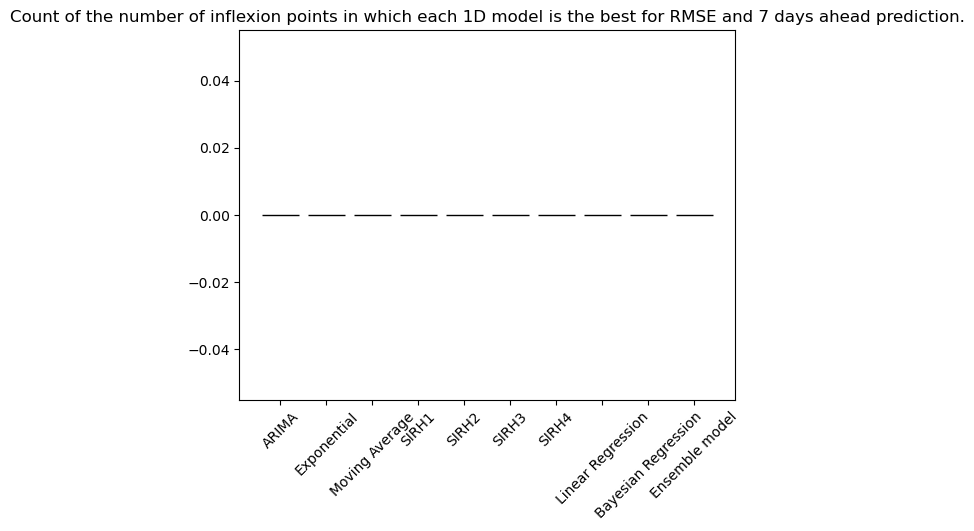

In [30]:
model_type='1D'
loss='RMSE'
reach='7'

for label_point in ['stable', 'decrease', 'increase', 'big decrease', 'big increase', 'inflexion']:
    if model_type == '3D':
        list_of_models=models3Dnames
    else:
        list_of_models=models1Dnames
    counts=[0 for i in range(len(list_of_models) +1)]
    results_list=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if loss in name and reach in name and model_type in name]
    for name in results_list :
        mob=int(name.split('_')[-5])
        pand=int(name.split('_')[-4])
        prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
        prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
        prediction.index=[20*i for i in range(1, 15)]
        prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)
        prediction_all=prediction
        prediction=prediction_bis
        dicoresults=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
        df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
        df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
        n_hospitalized = np.array(df.loc['n_hospitalized'])
        r_eff=np.array(df.loc['r_eff'])
        indexs_points=[[20*i] for i in range(1, 15) ] 
        for point in indexs_points: 
            # if classify(point[0], n_hospitalized) == label_point :
            if classify_bis(point[0], r_eff) == label_point :
                ensemble_value=prediction.loc[point[0]].mean() 
                best_model=(list_of_models[np.argmin(dicoresults[str(point)])])
                pred_best_mod=prediction_all[best_model].loc[point[0]]
                real_value=prediction_all['Real values'].loc[point[0]]
                ensemble_perf=np.abs(ensemble_value-real_value)
                best_mod_perf=np.abs(pred_best_mod-real_value)
                if ensemble_perf < best_mod_perf :
                    counts[-1]+=1
                else :
                    counts[np.argmin(dicoresults[str(point)])]+=1
    
    plt.bar(list_of_models + ['Ensemble model'], counts, edgecolor='black')
    plt.xticks(rotation=45)
    plt.title('Count of the number of '+label_point+' points in which each '+model_type+' model is the best for '+loss+' and '+reach+' days ahead prediction.')
    plt.show()


CLASSEMENTS SSSSSSSSSSSSSSSSSS

a plot = a model. In each plot we have the distribution of the rankings of the model on all different type of points 

In [ ]:

model_type='1D'
loss='RMSE'
reach='7'
# type_of_points=['all','big increase', 'increase' , 'stable', 'inflexion', 'decrease', 'big decrease']
type_of_points=['all','big increase', 'increase' , 'stable', 'decrease', 'big decrease']

for model_type in ['1D', '3D']:
    for loss in ['RMSE', 'WIS'] : 
        for reach in ['7', '14'] : 
            all_figs=[]
            all_axes=[]
            for i in range(len(models1Dnames)+len(models3Dnames)):
                # fig, axs = plt.subplots(7, figsize=(8, 12)) 
                fig, axs = plt.subplots(6, figsize=(8, 12)) 
                all_figs.append(fig)
                all_axes.append(axs)
            for index_label, label_point in enumerate( type_of_points):
                all_results=[]

                list_of_models= models1Dnames+models3Dnames
                all_ranks=np.zeros((len(list_of_models), len(list_of_models)))
                results_list=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if loss in name and '1D' in name and 'reach_='+str(reach) in name   ] # results of the models

                for name in results_list :
                    mob=int(name.split('_')[-5])
                    pand=int(name.split('_')[-4])
                    dicoresults1=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
                    dicoresults2=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name.replace('1D', '3D')))
                    dicoresults=concat_dico(dicoresults1, dicoresults2)
                    df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
                    df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
                    df.drop(['Unnamed: 0'], axis=1, inplace=True)
                    n_hospitalized = np.array(df.loc['n_hospitalized'])
                    r_eff=np.array(df.loc['r_eff'])
                    indexs_points=[[20*i] for i in range(1, 15) ] 
                    prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
                    prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
                    prediction.index=[20*i for i in range(1, 15)]
                    prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)
                    prediction_all=prediction
                    prediction=prediction_bis
                    for point in indexs_points: 
                        if label_point=='all': 
                            # ensemble_value=prediction.loc[point[0]].mean()
                            real_value=prediction_all['Real values'].loc[point[0]]
                            # ensemble_perf=np.sqrt((ensemble_value-real_value)**2)
                            perfs=dicoresults[str(point)]
                            # perfs.append(ensemble_perf)
                            rankings=get_classement(perfs)
                            for i in range(len(rankings)): 
                                rank_model_i=rankings[i]
                                all_ranks[i][rank_model_i]+=1

                        # elif classify(point[0], n_hospitalized) == label_point :
                        elif classify_bis(point[0], r_eff) == label_point :
                            # ensemble_value=prediction.loc[point[0]].mean()
                            real_value=prediction_all['Real values'].loc[point[0]]
                            # ensemble_perf=np.sqrt((ensemble_value-real_value)**2)
                            perfs=dicoresults[str(point)]
                            # perfs.append(ensemble_perf)
                            rankings=get_classement(perfs)
                            for i in range(len(rankings)): 
                                rank_model_i=rankings[i]
                                all_ranks[i][rank_model_i]+=1
                            


                expected_ranks=[np.sum((np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])))*np.array([i for i in range( 14)])) for i in range(len(rankings))] 


                    



                for i in range(len(models1Dnames)+len(models3Dnames)):   
                    all_results.append(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])))
                    
                    all_axes[i][index_label].bar([j for j in range(len(rankings))], np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])), edgecolor='black', width = 0.5)
                    tick=min(round(np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))), 1) , round(np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))), 1)) 
                    all_axes[i][index_label].set_yticks([ tick])
                    all_axes[i][index_label].set_ylim(bottom = 0 , top = max(tick , (np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])) )))*1.2)
                    all_axes[i][index_label].set_ylabel(label_point, labelpad=30)
                    all_axes[i][index_label].yaxis.label.set_rotation(45)
                    if index_label != len(type_of_points)-1:
                        all_axes[i][index_label].set_xticks([])
                    else : 
                        all_axes[i][index_label].set_xticks([j for j in range(len(rankings))])
                        all_axes[i][index_label].set_xlabel('Rank'  )
                    all_figs[i].suptitle('Distribution of the ranks of '+list_of_models[i]+' for different type of points  for '+loss+' and '+reach+' days ahead prediction.')
                # sns.heatmap(np.array(all_results), ax = heatmaps_axs[index_label], cmap='coolwarm')
            plt.show()
            for fig in all_figs:
                # fig.show()
                plt.close(fig)



Distribution of ranking / model for all types of points. On a graph, we plot the distribution of ranking of all models for a specific type of point (a graph = a type of point)

<>:43: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:56: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:43: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:56: SyntaxWarning: assertion is always true, perhaps remove parentheses?
C:\Users\grego\AppData\Local\Temp\ipykernel_284\210658105.py:43: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11]))
C:\Users\grego\AppData\Local\Temp\ipykernel_284\210658105.py:56: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11]))


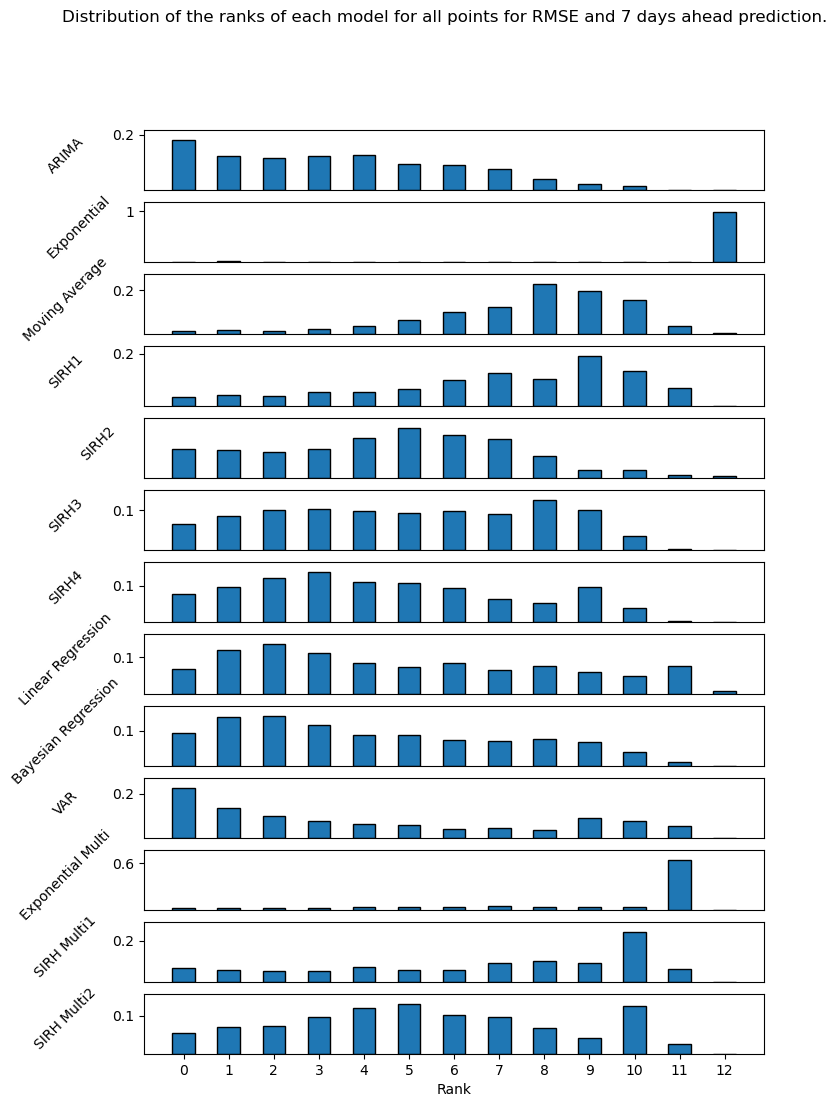

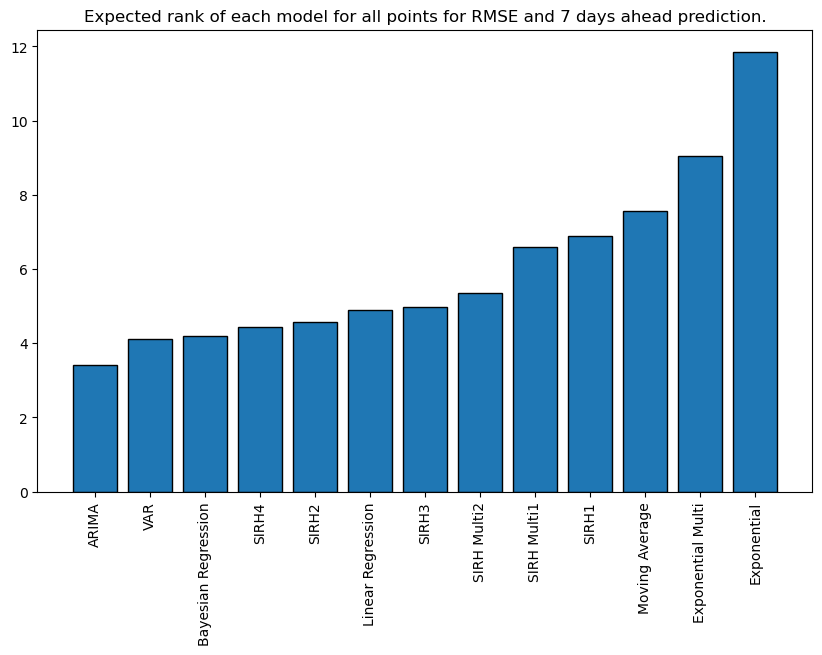

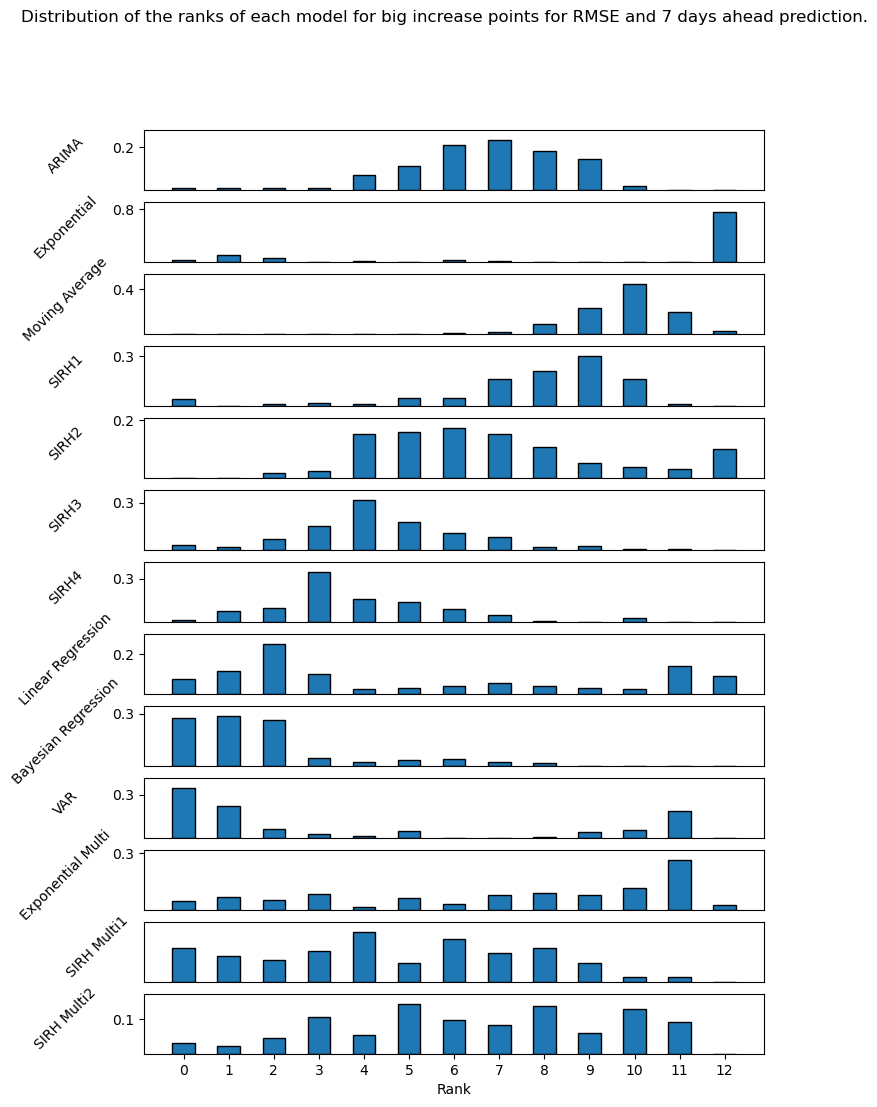

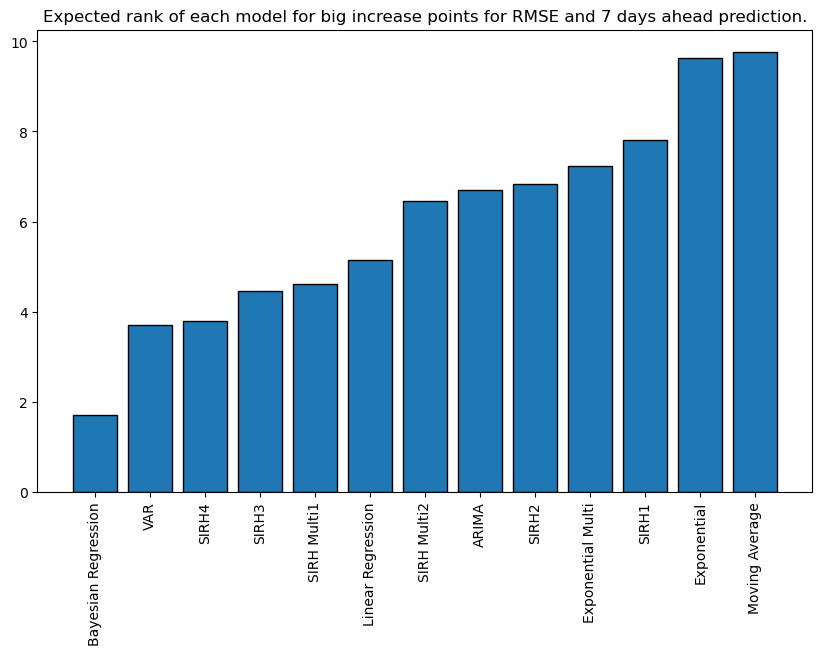

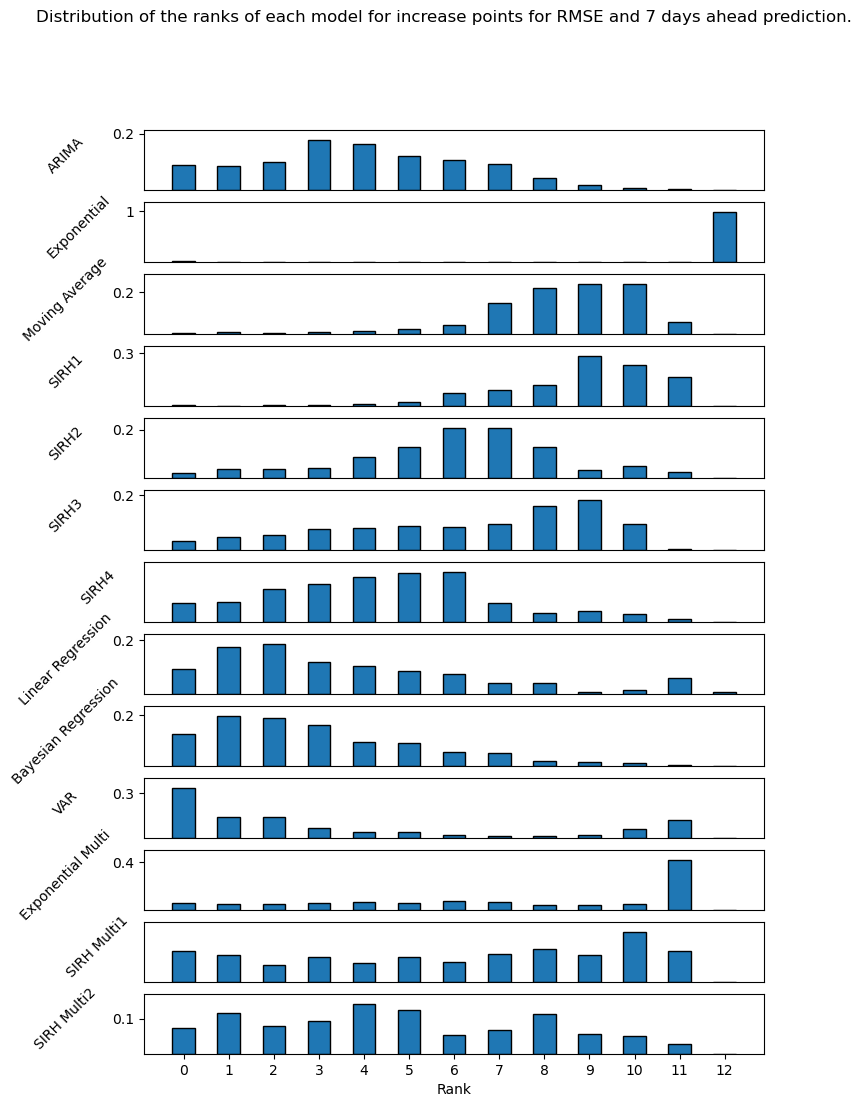

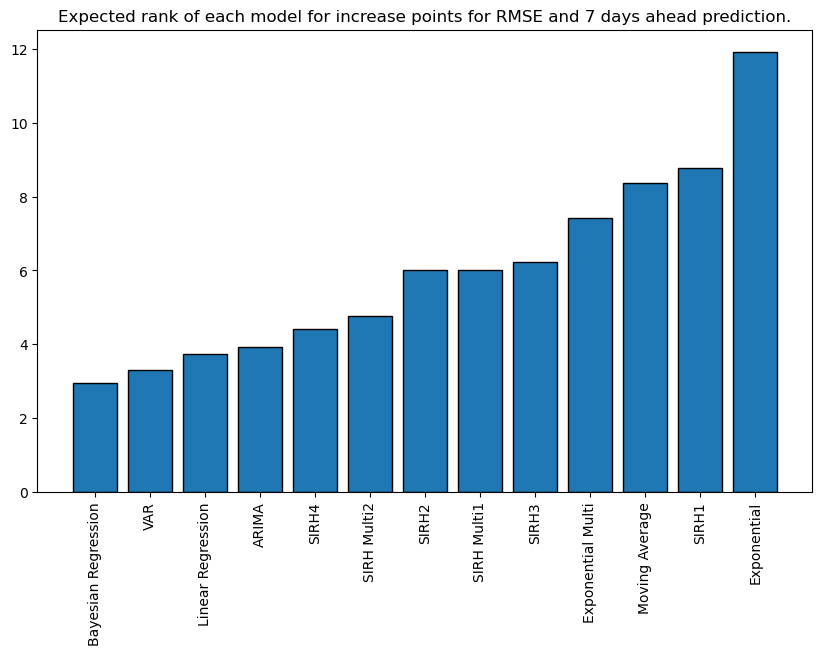

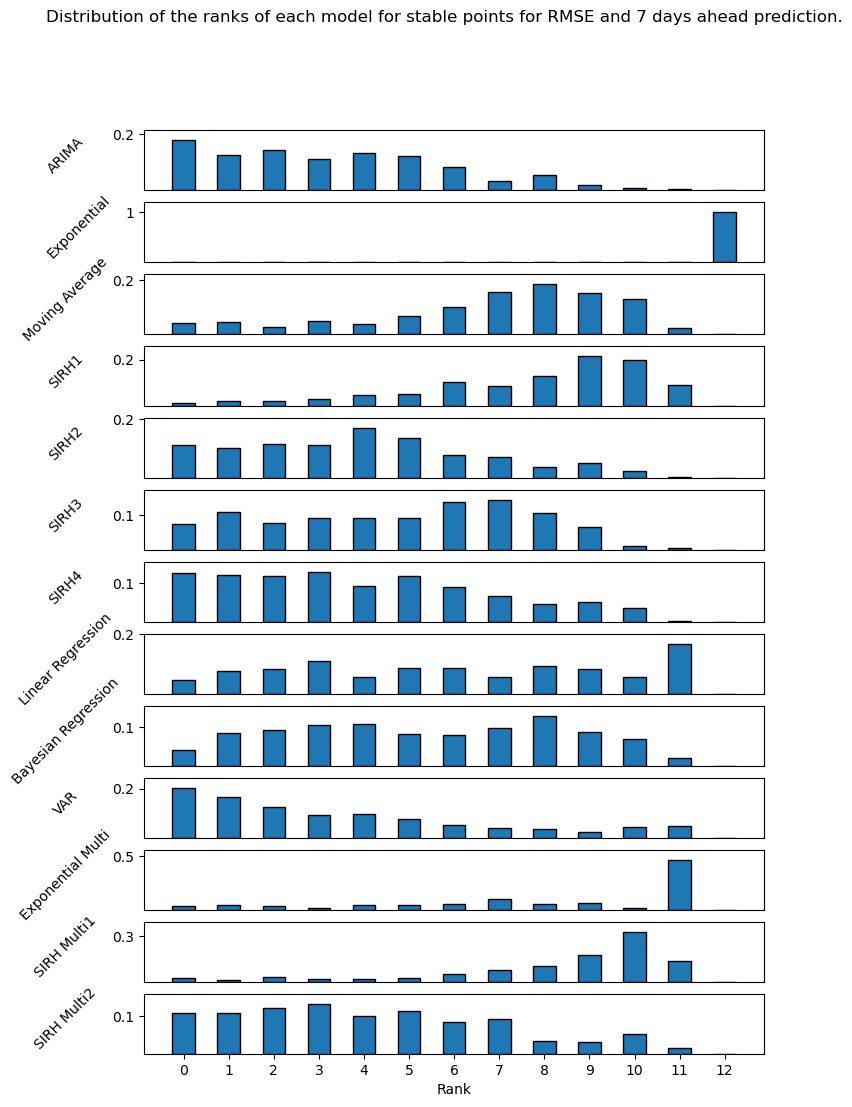

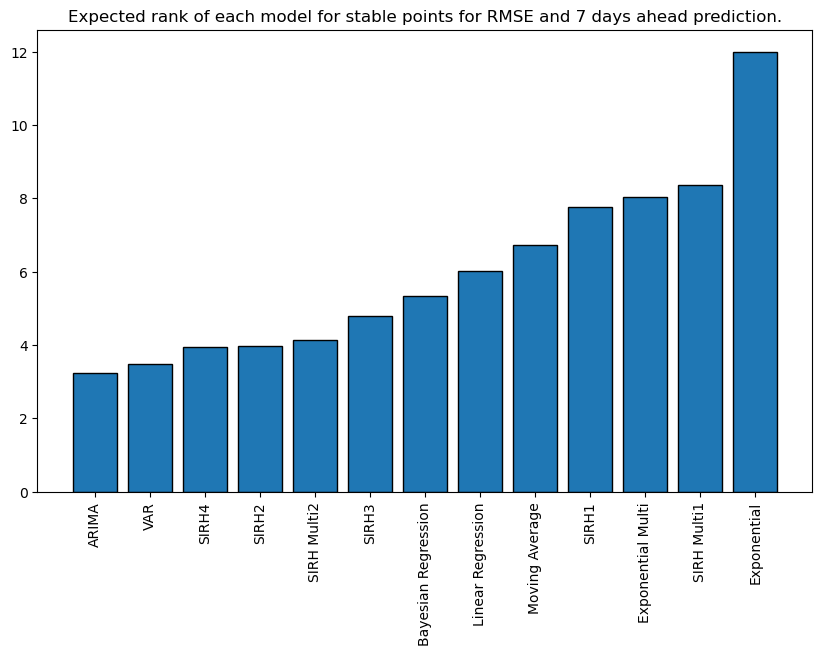

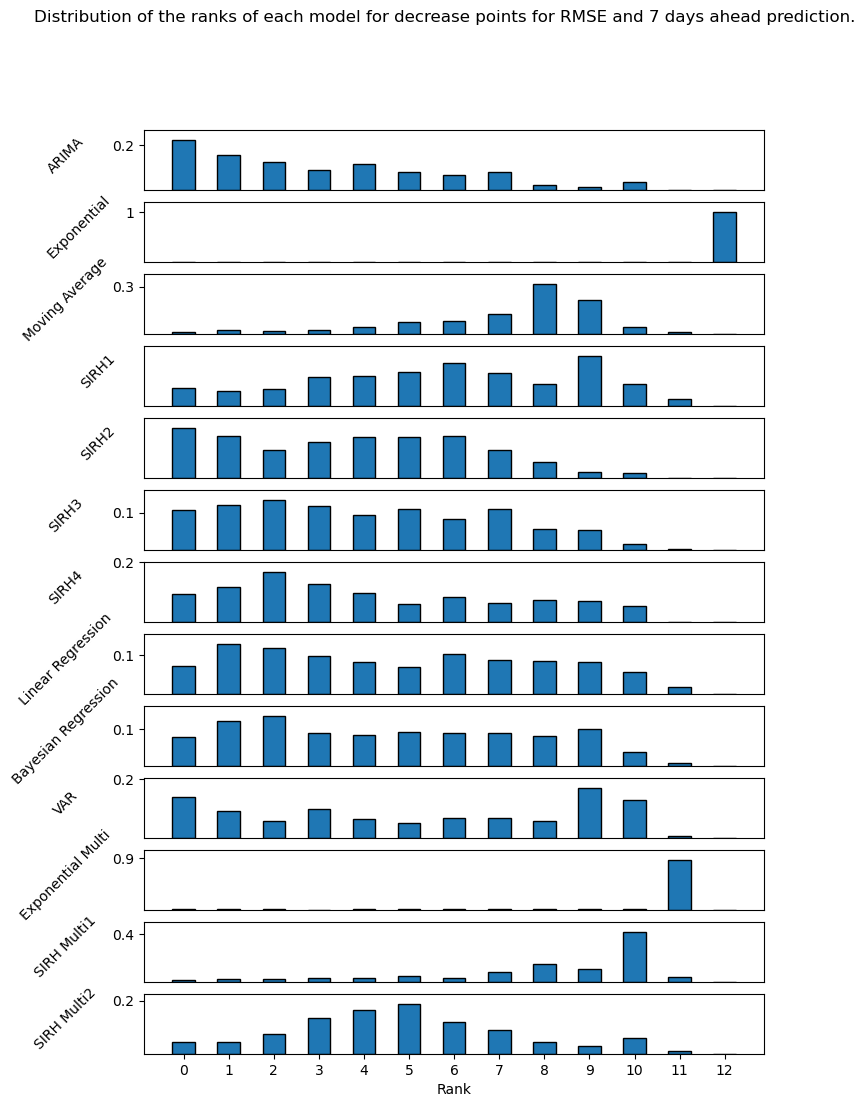

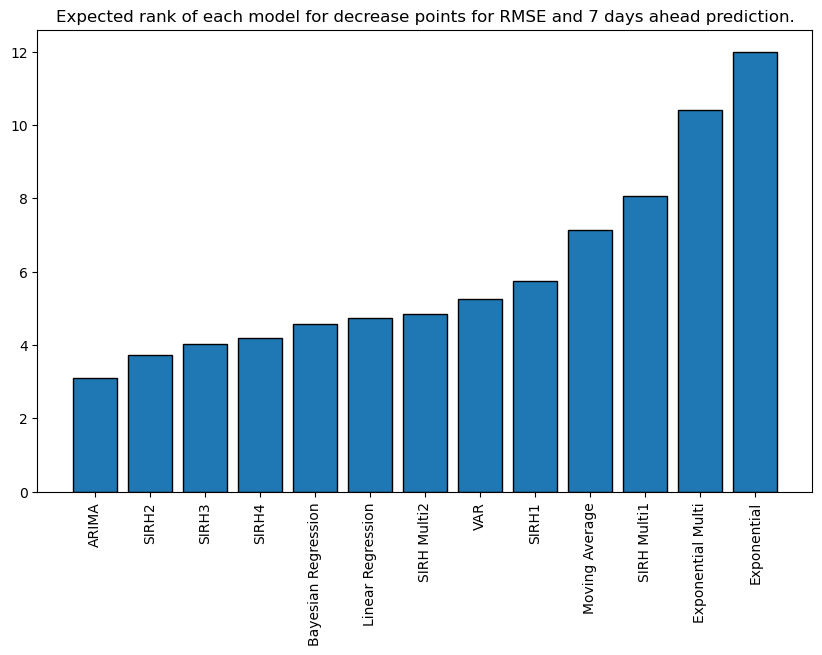

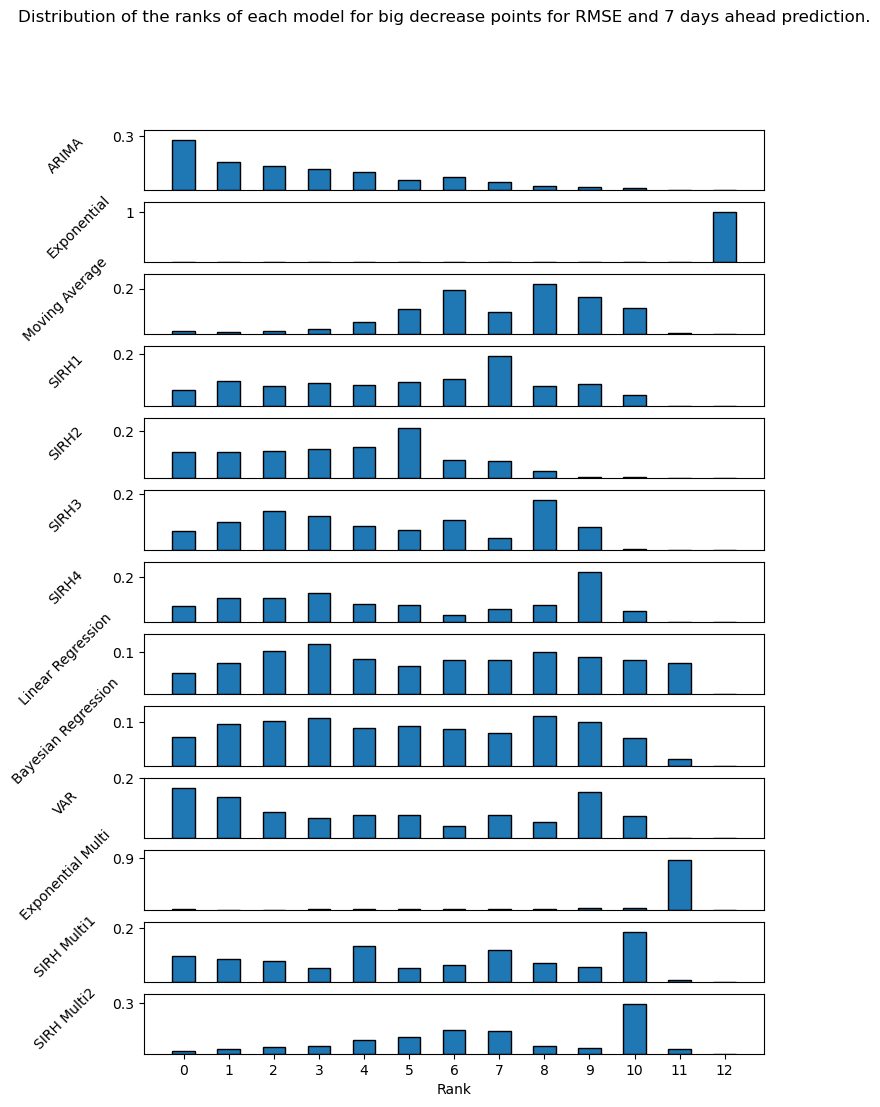

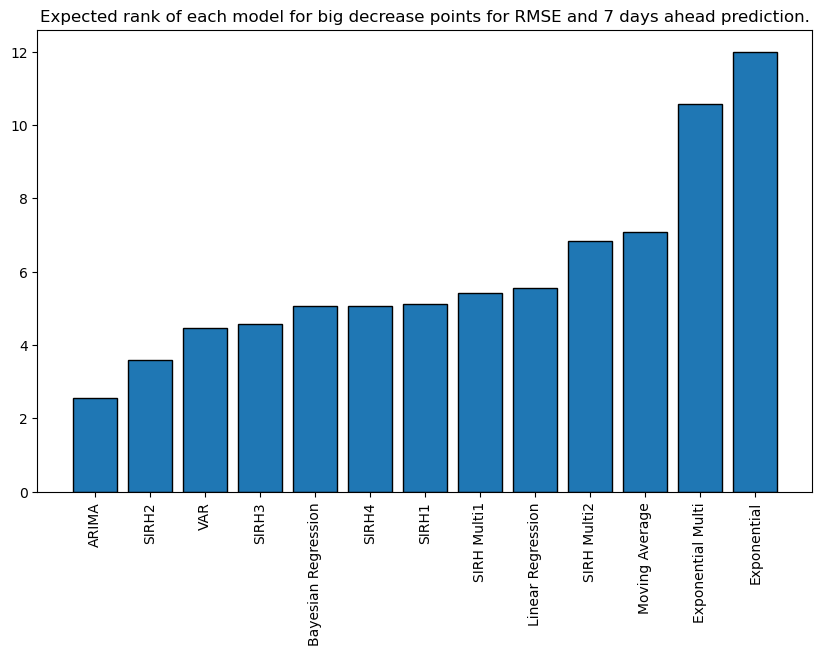

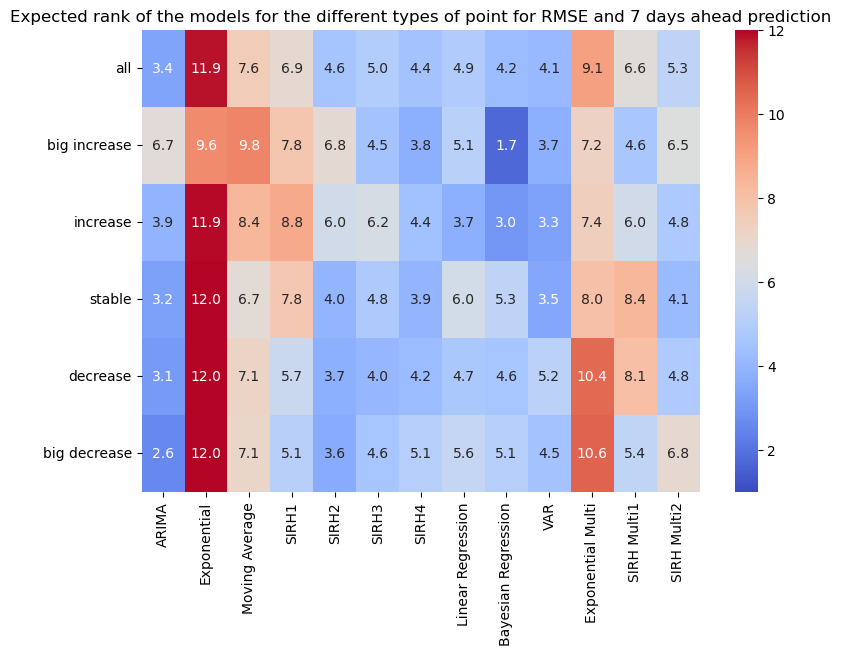

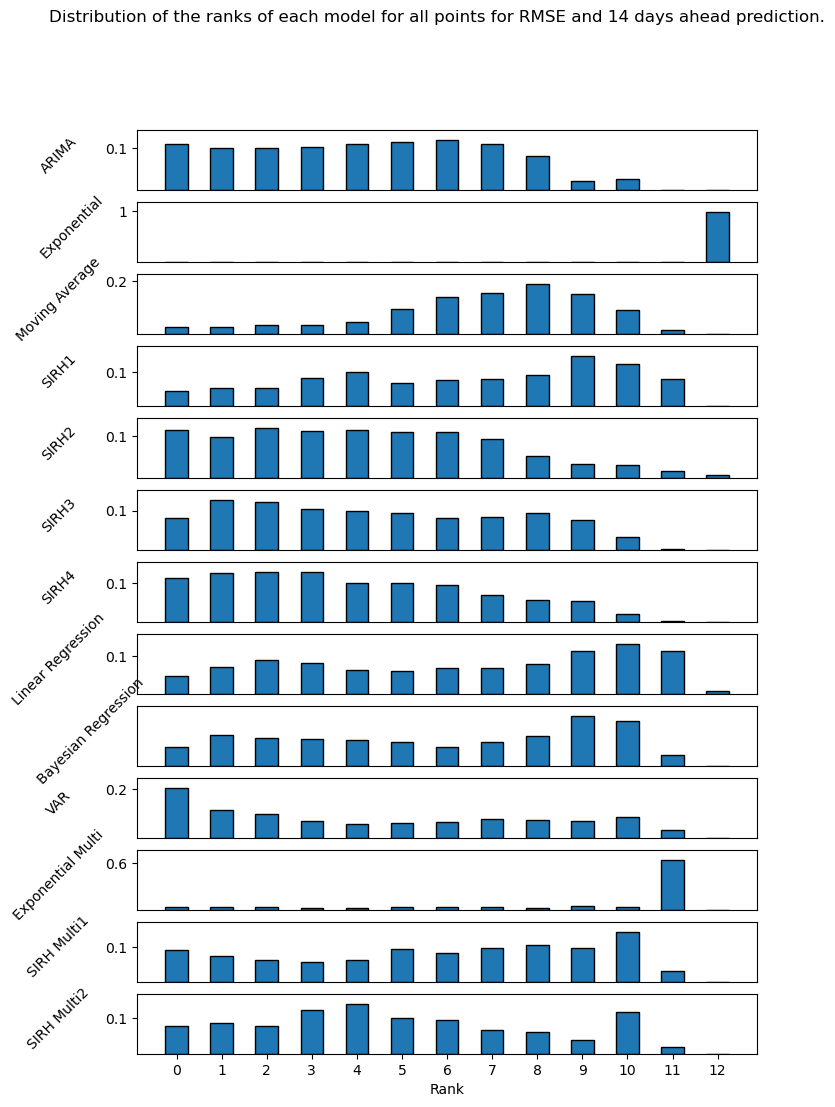

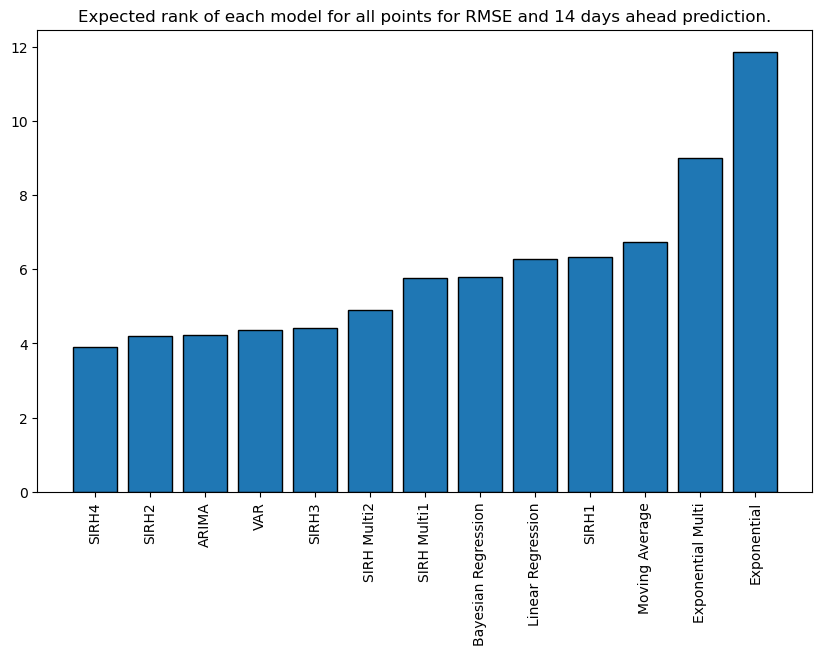

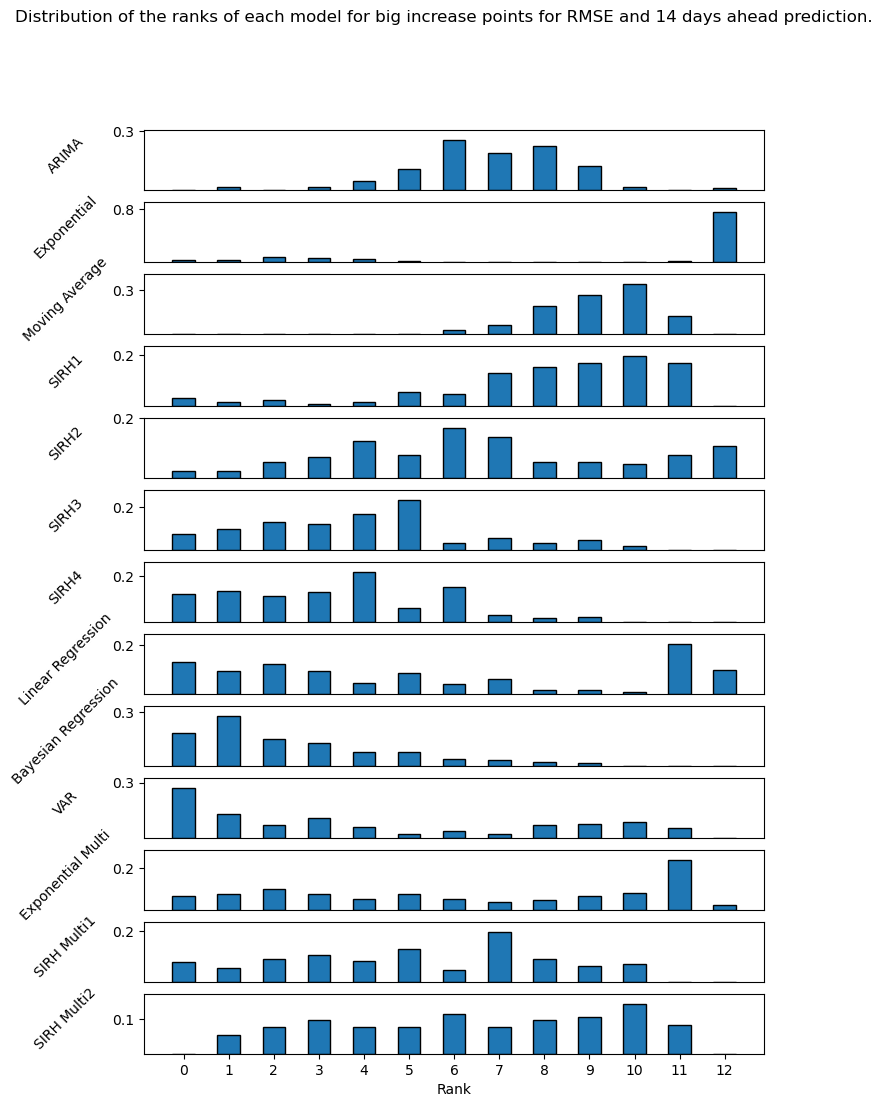

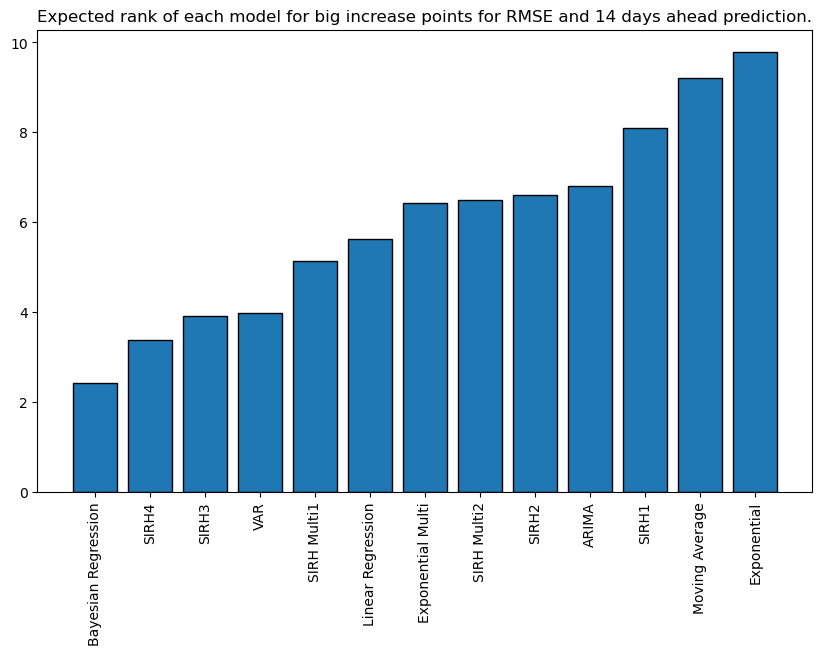

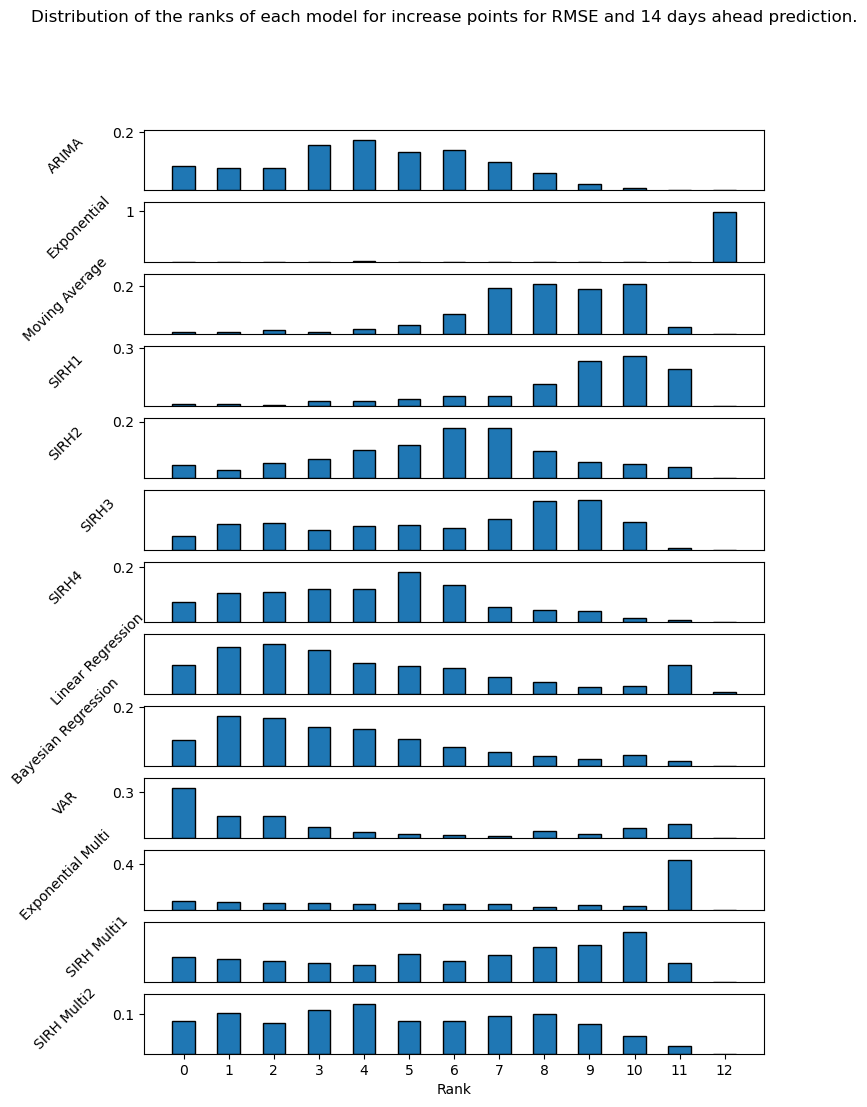

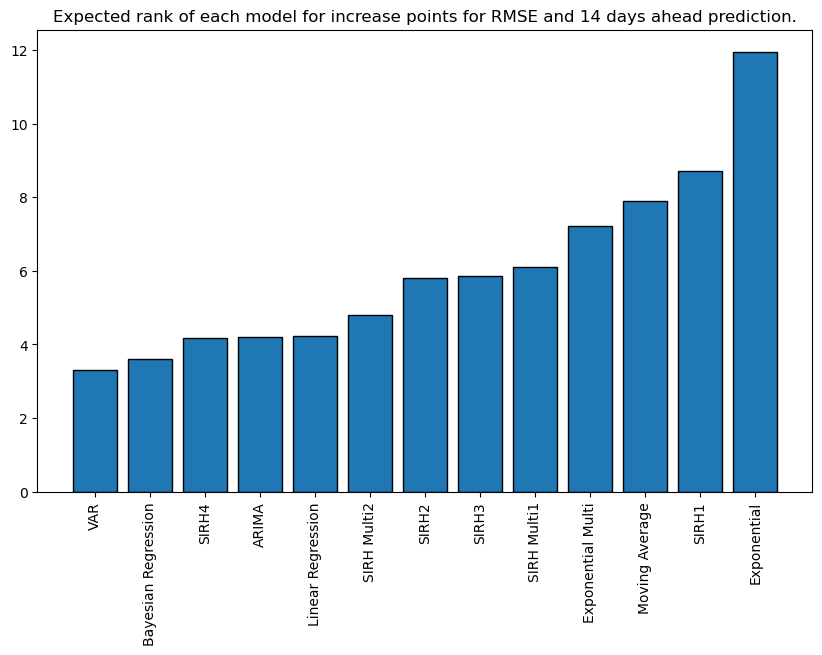

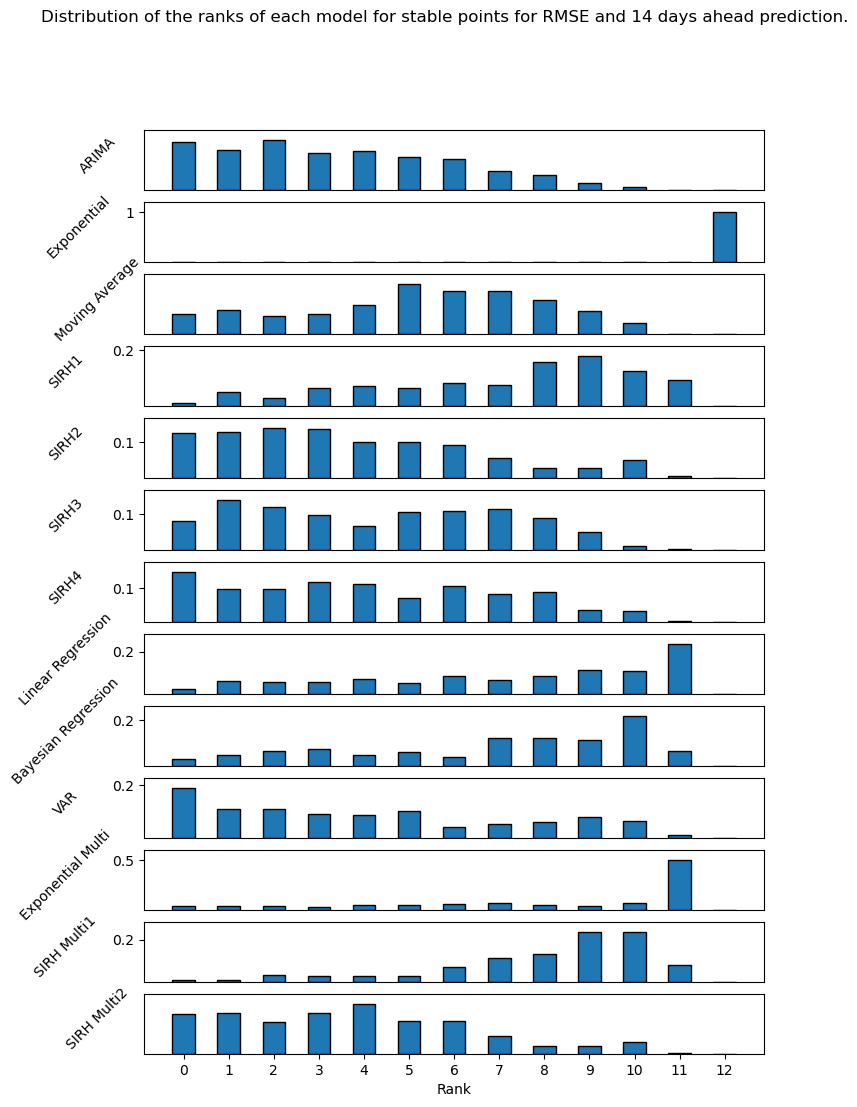

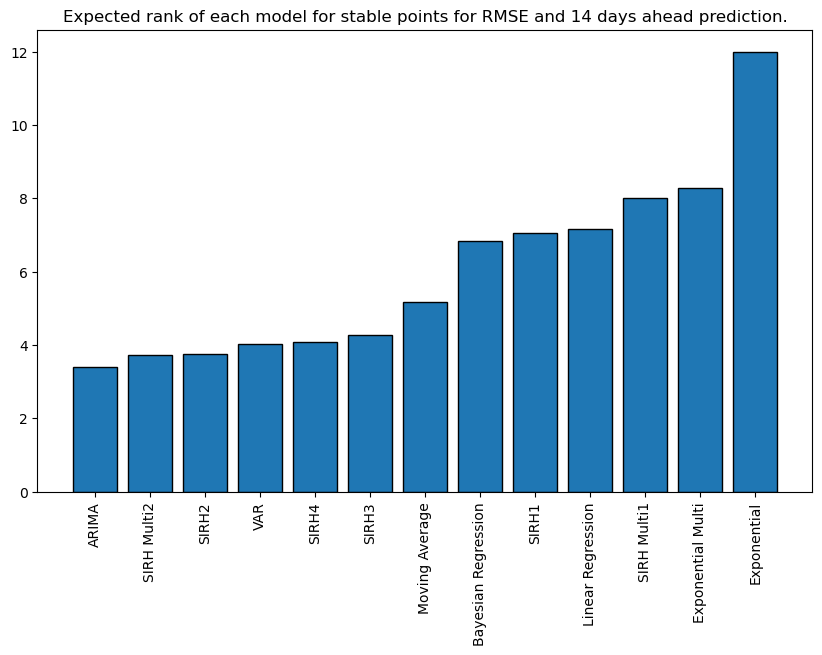

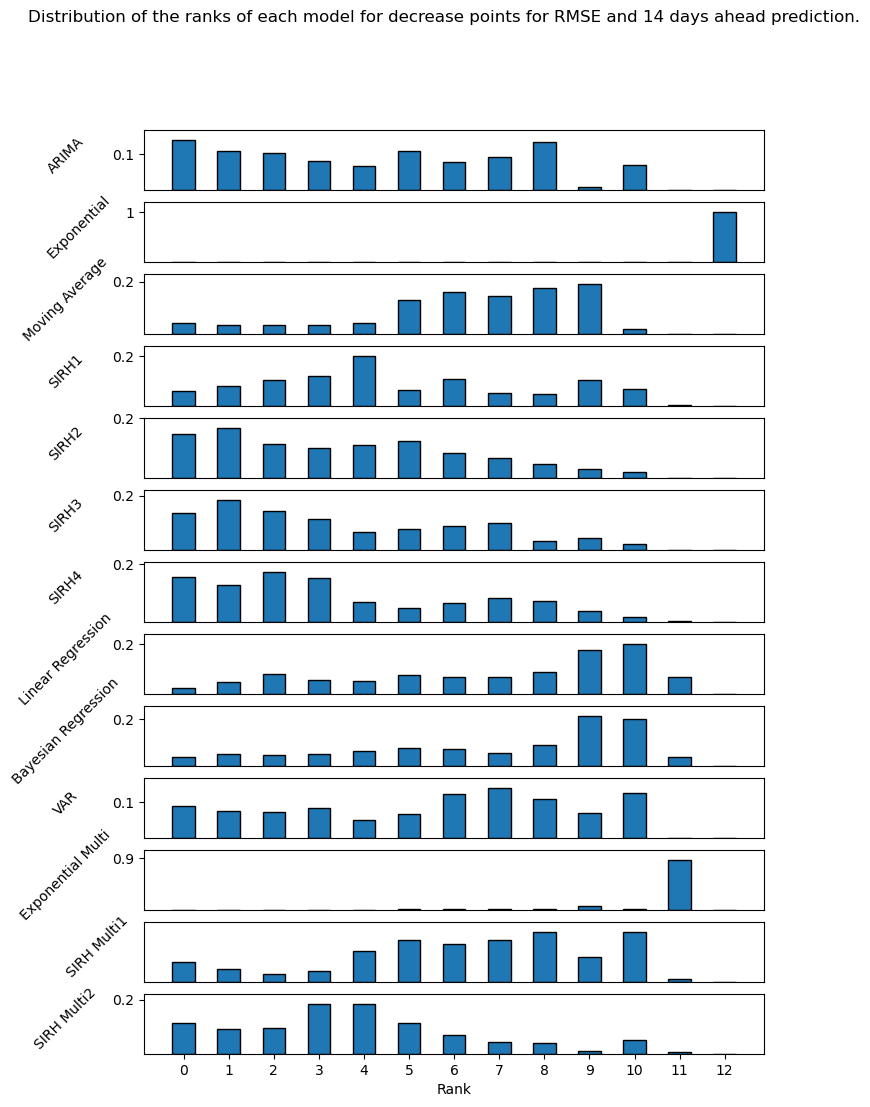

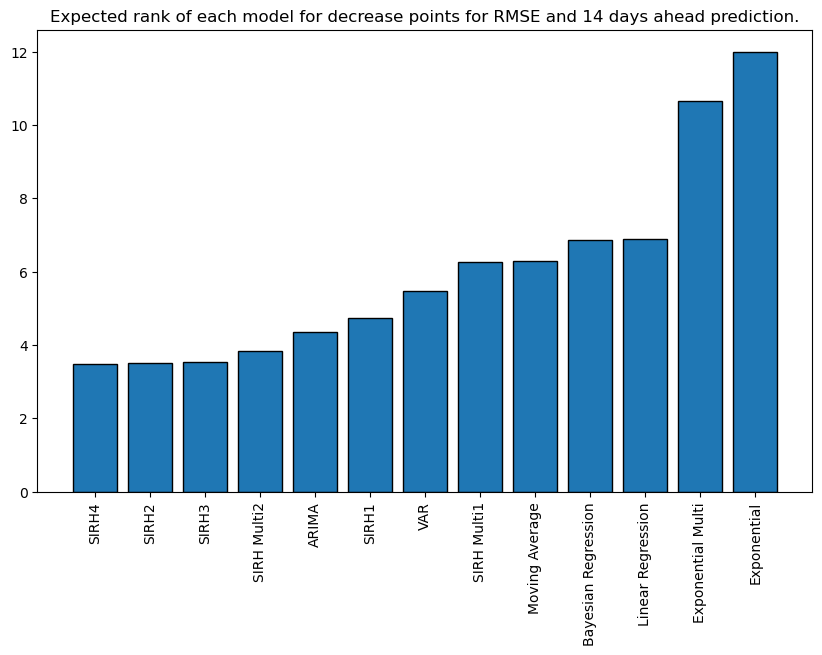

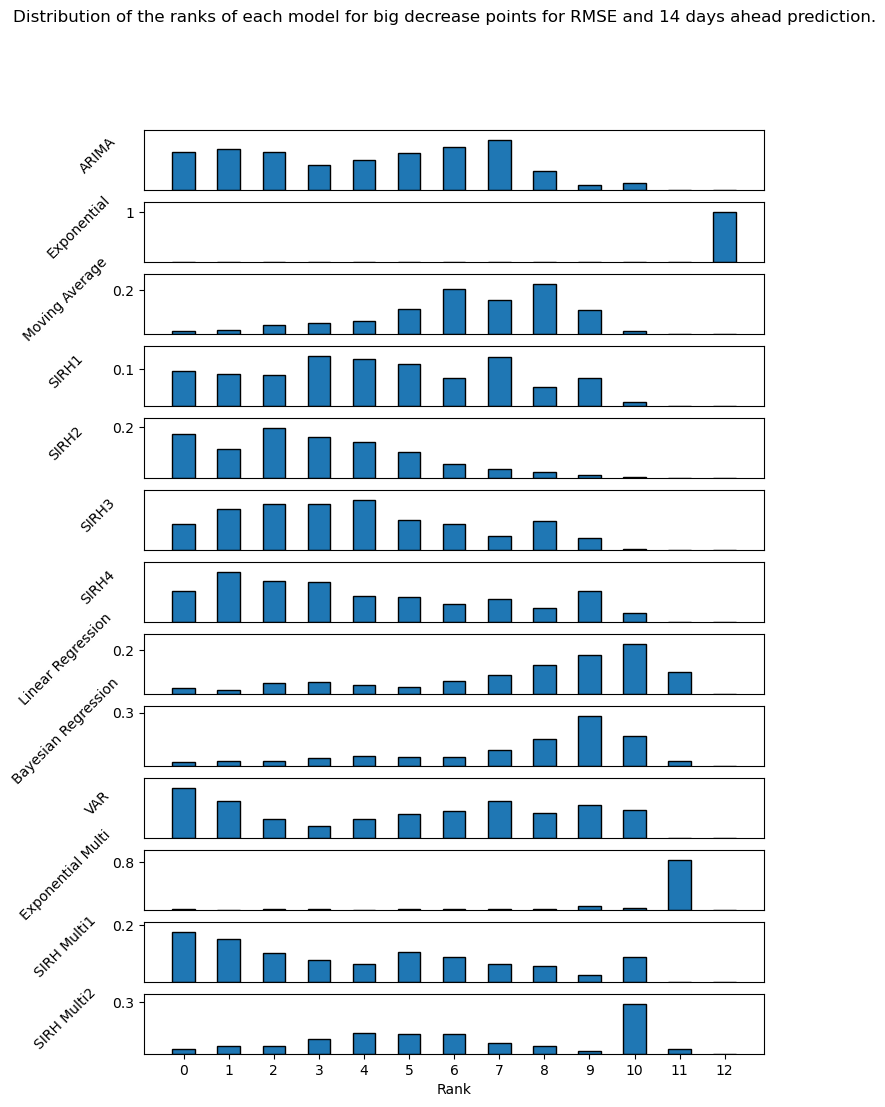

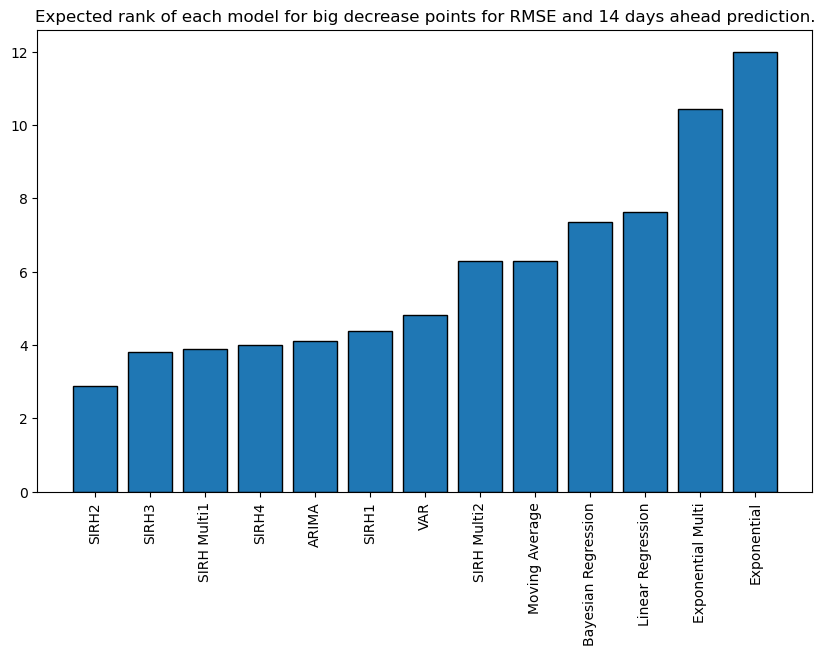

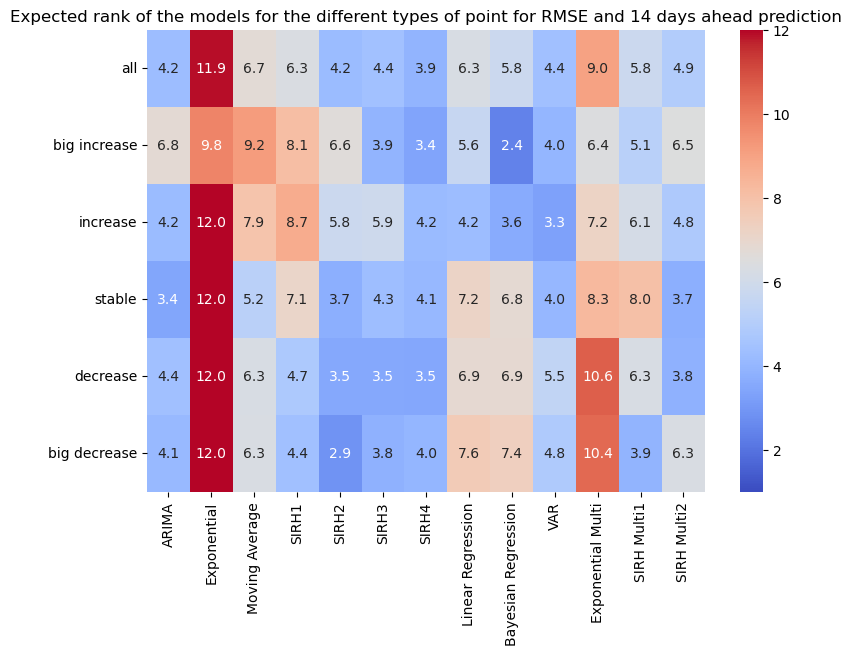

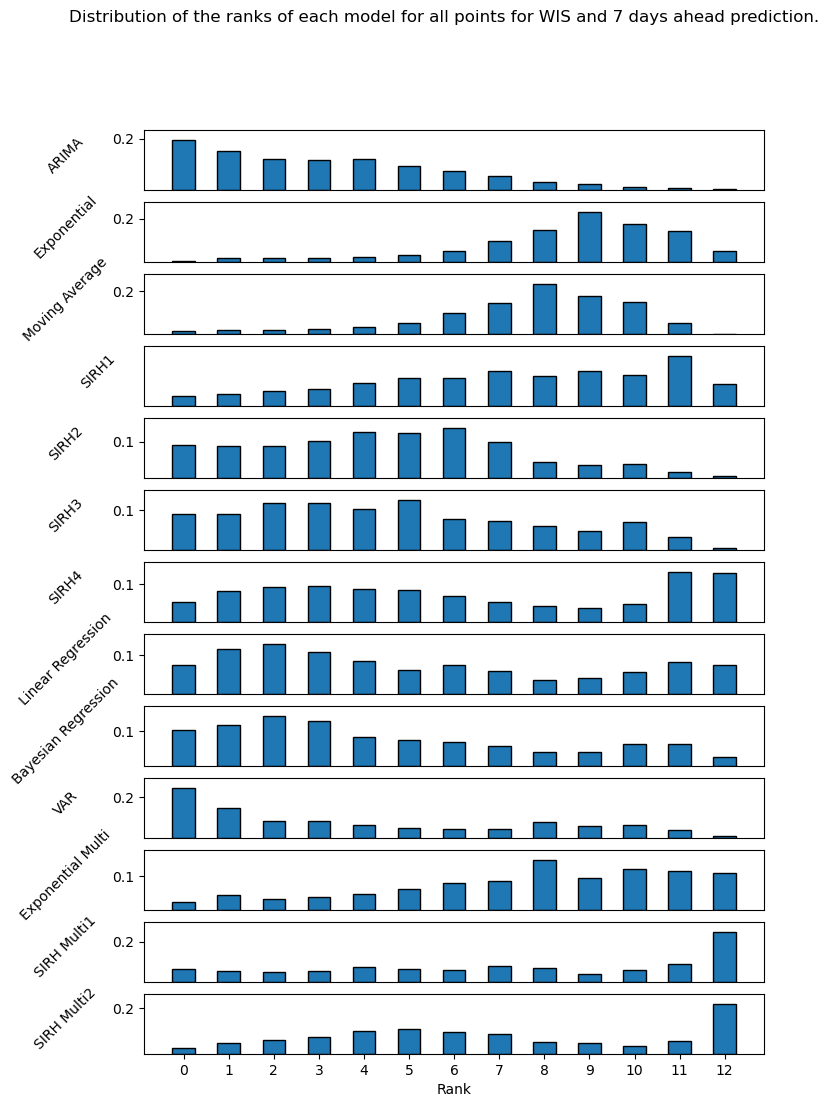

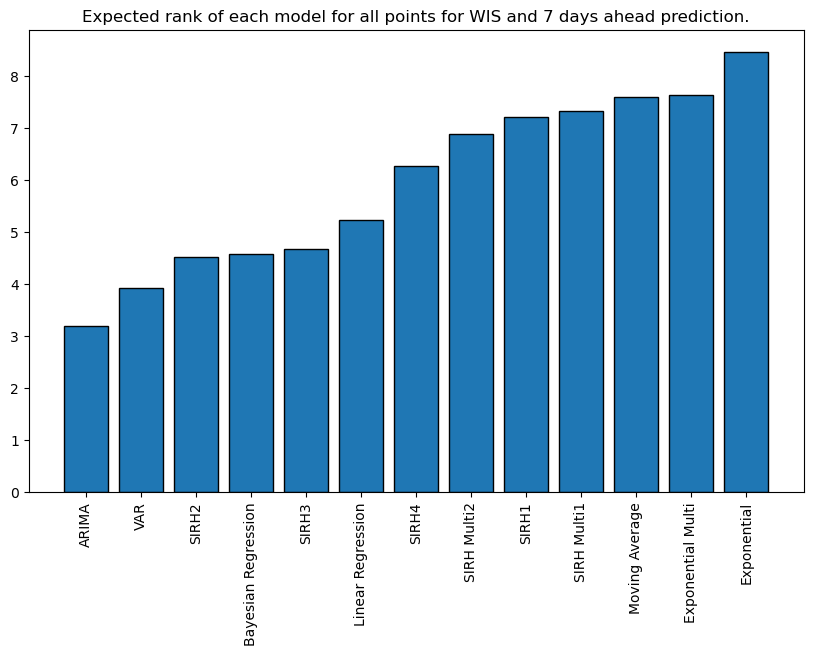

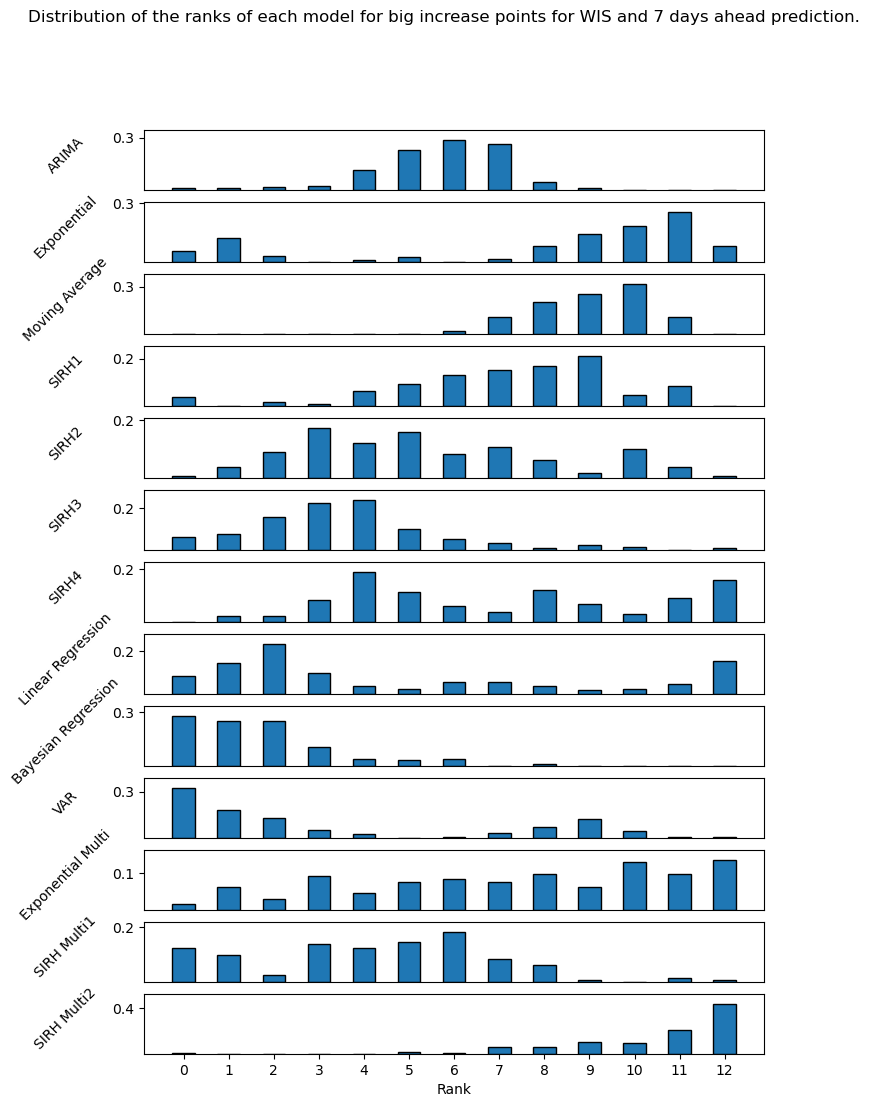

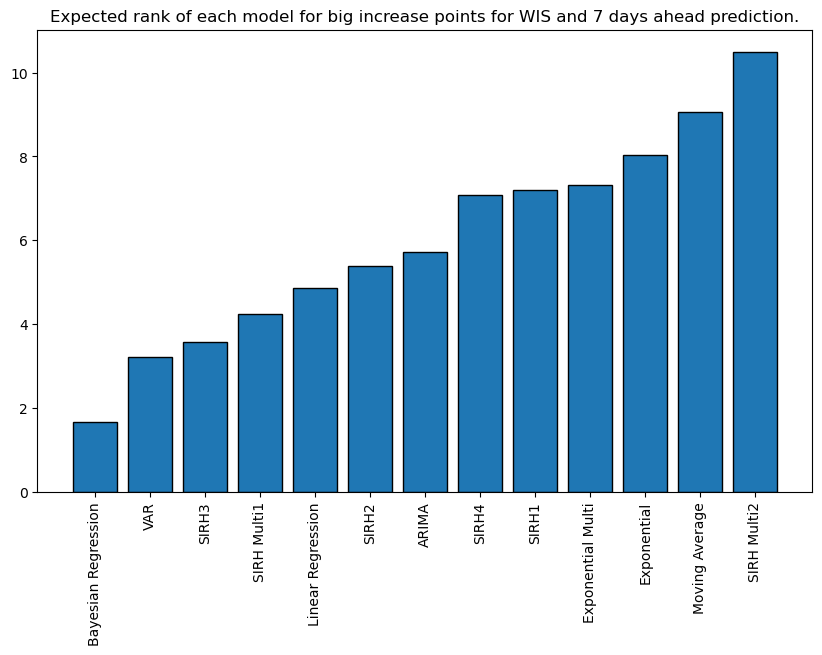

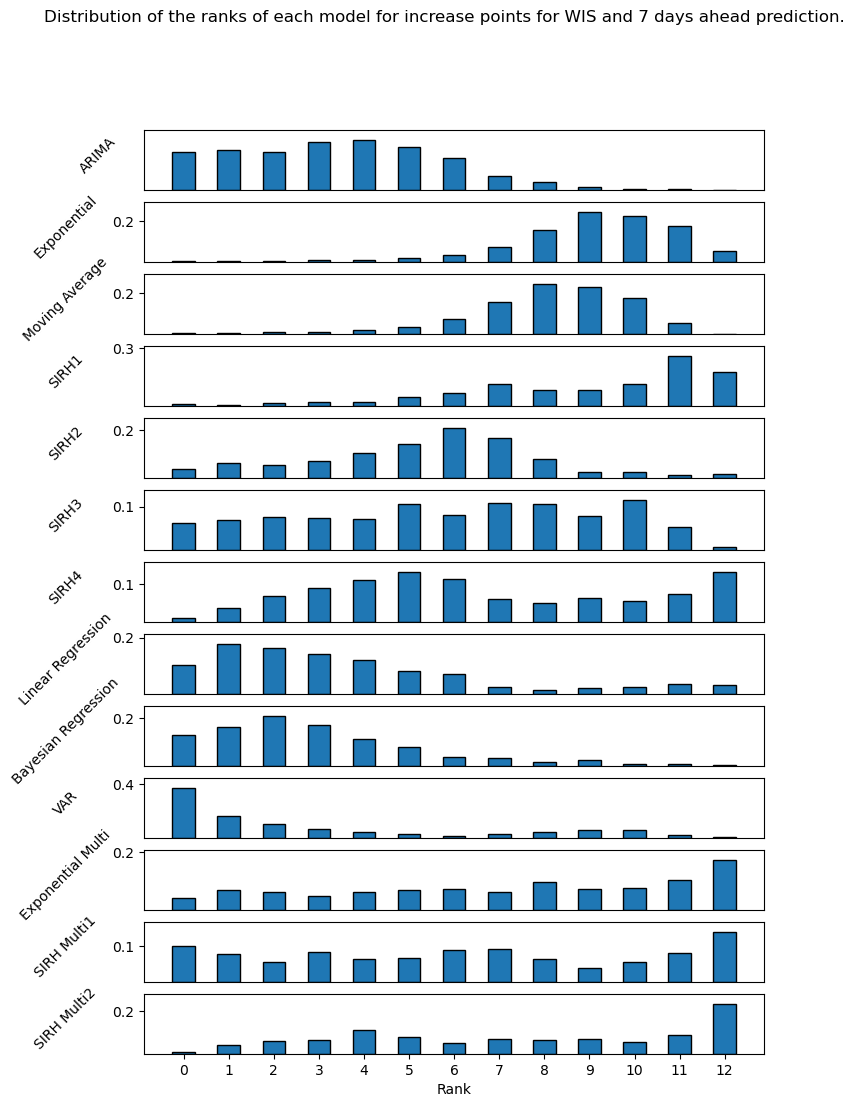

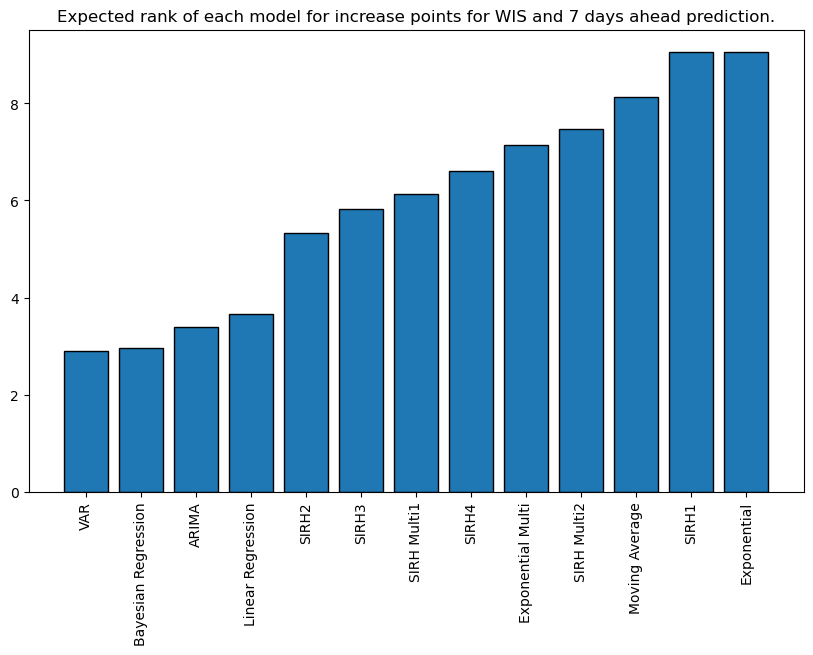

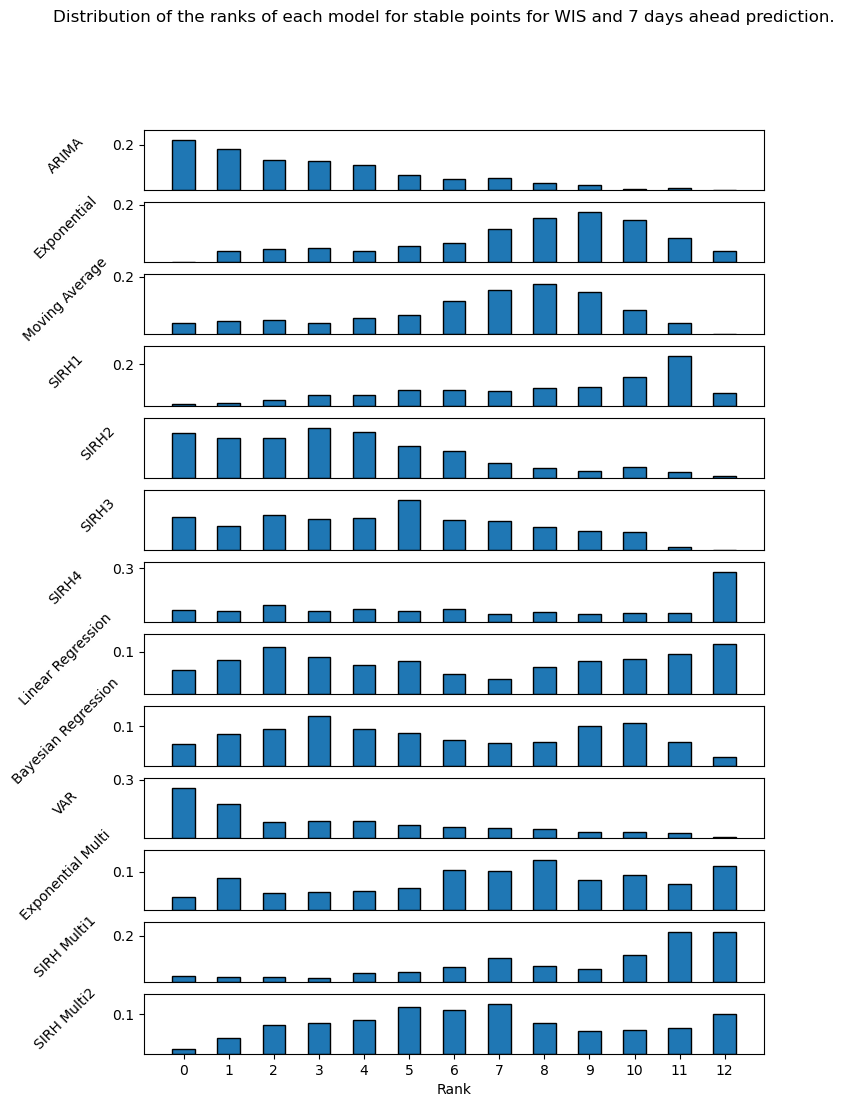

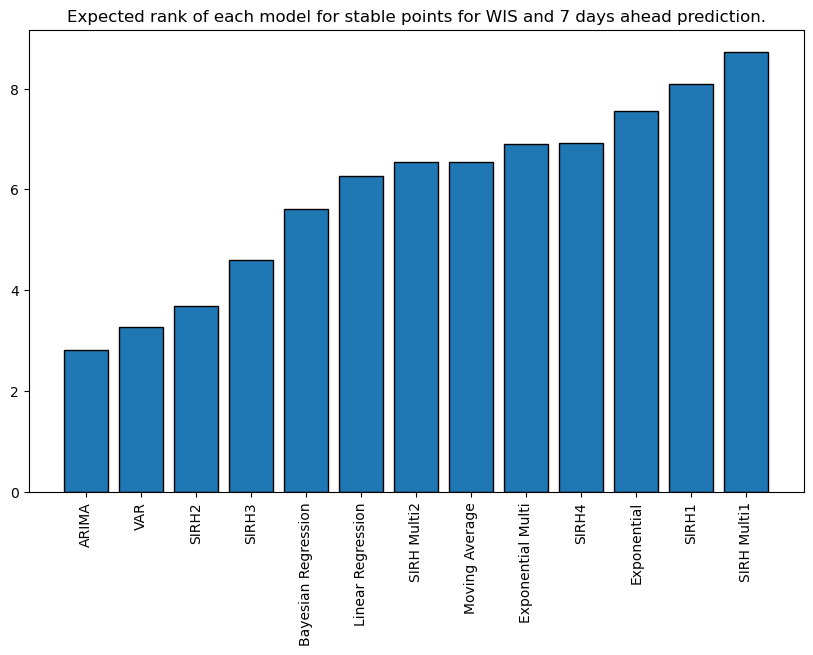

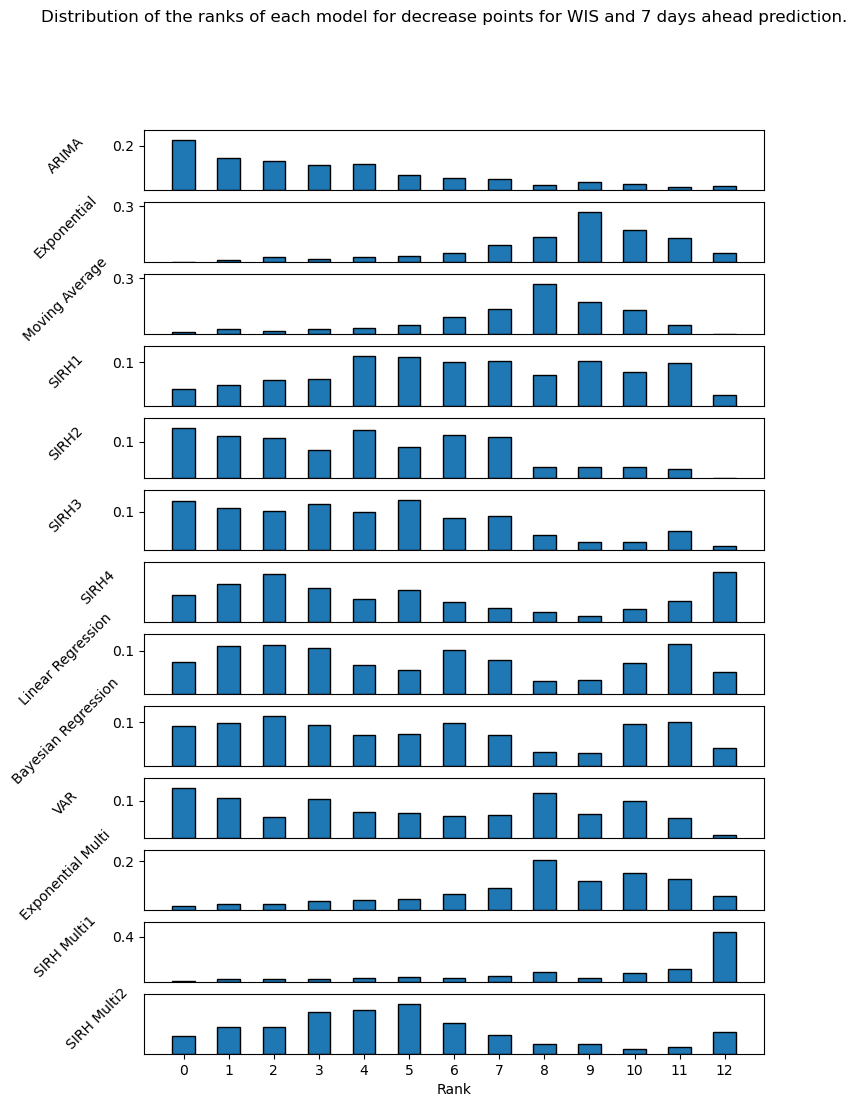

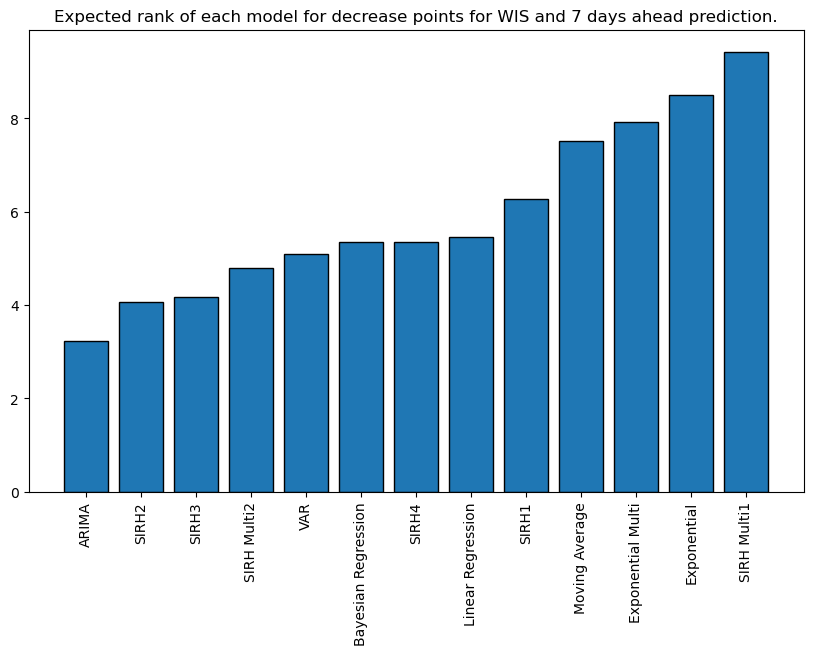

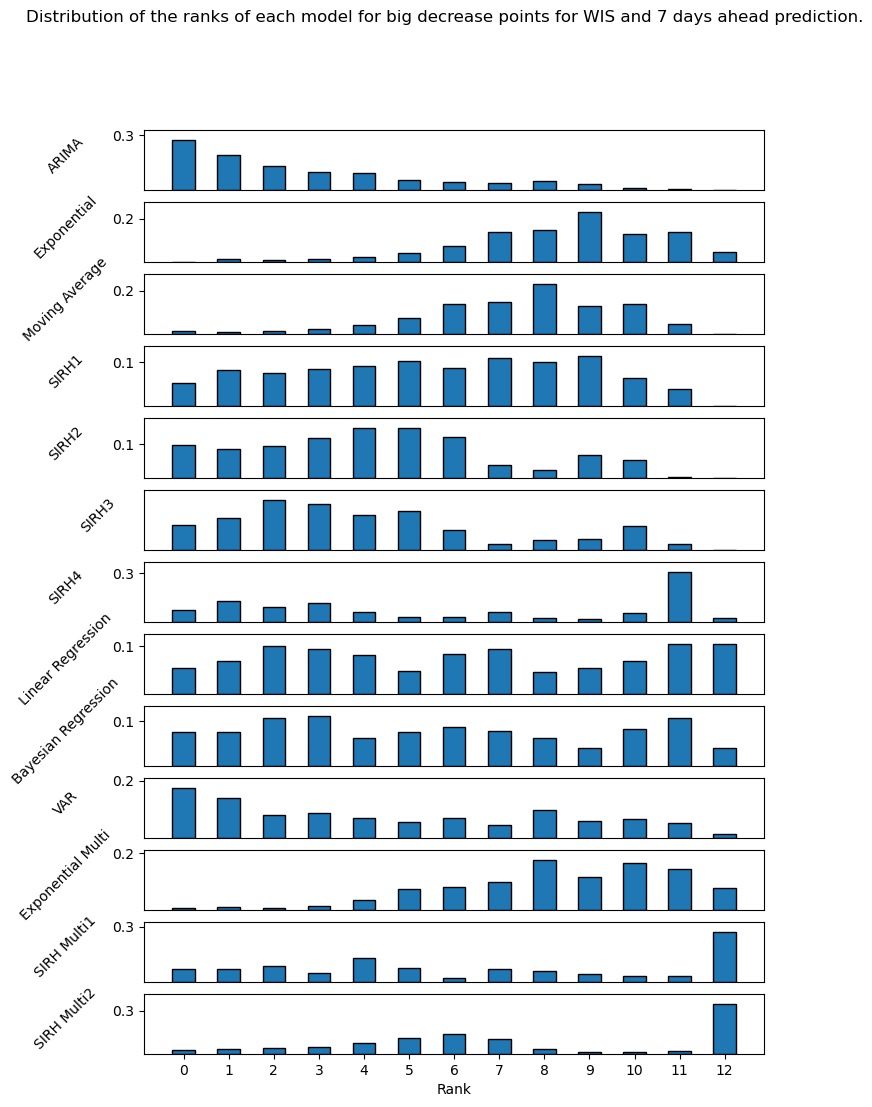

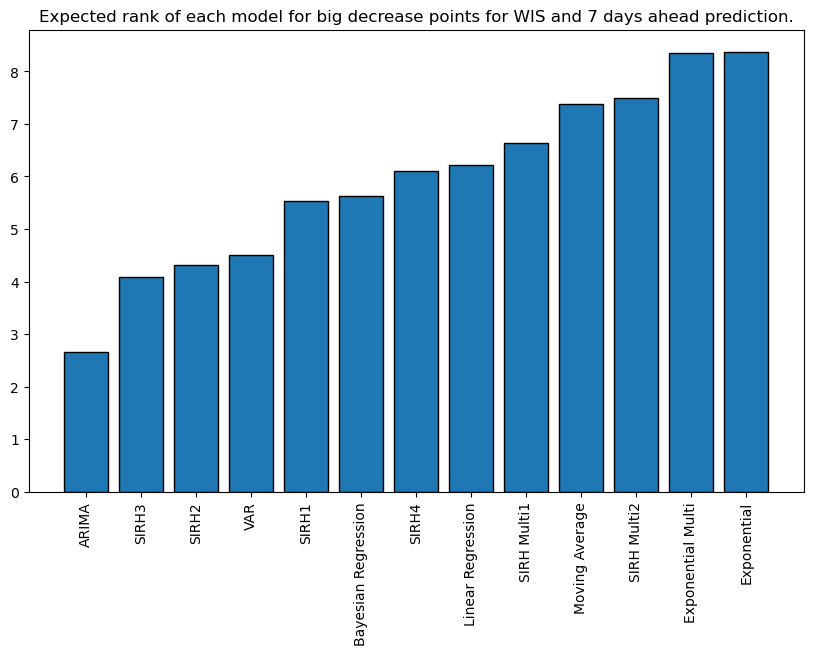

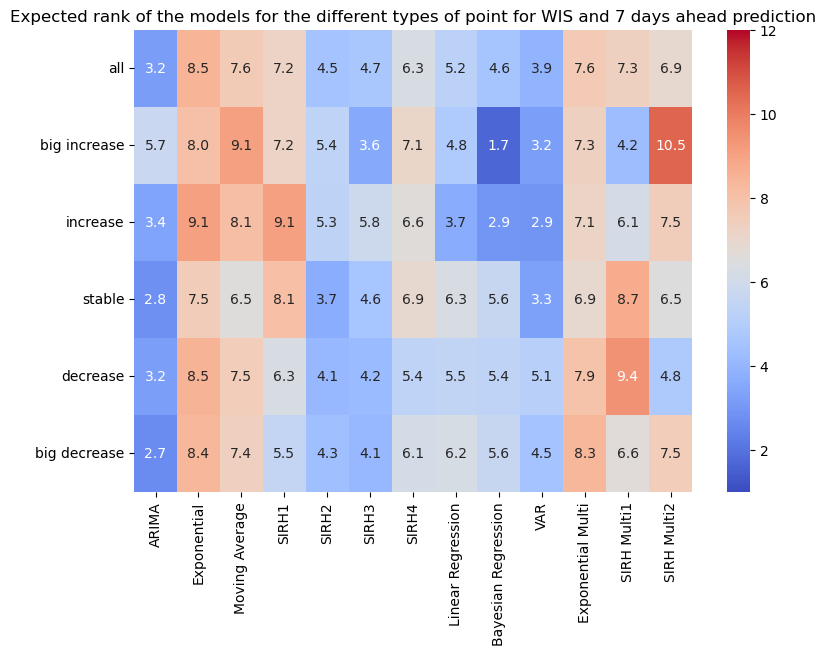

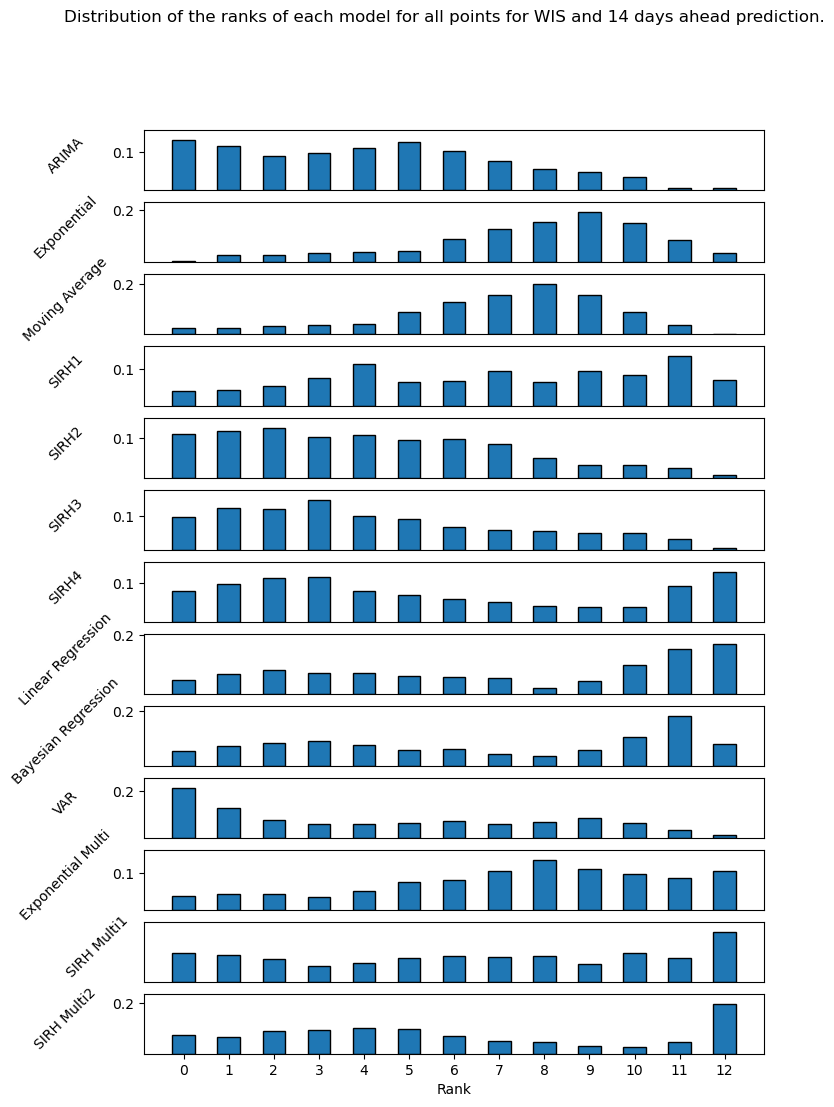

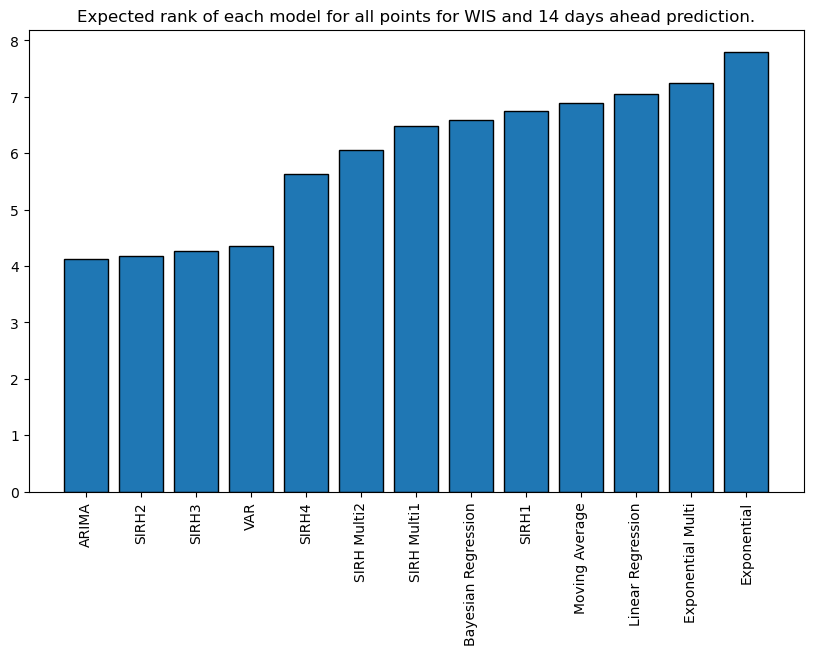

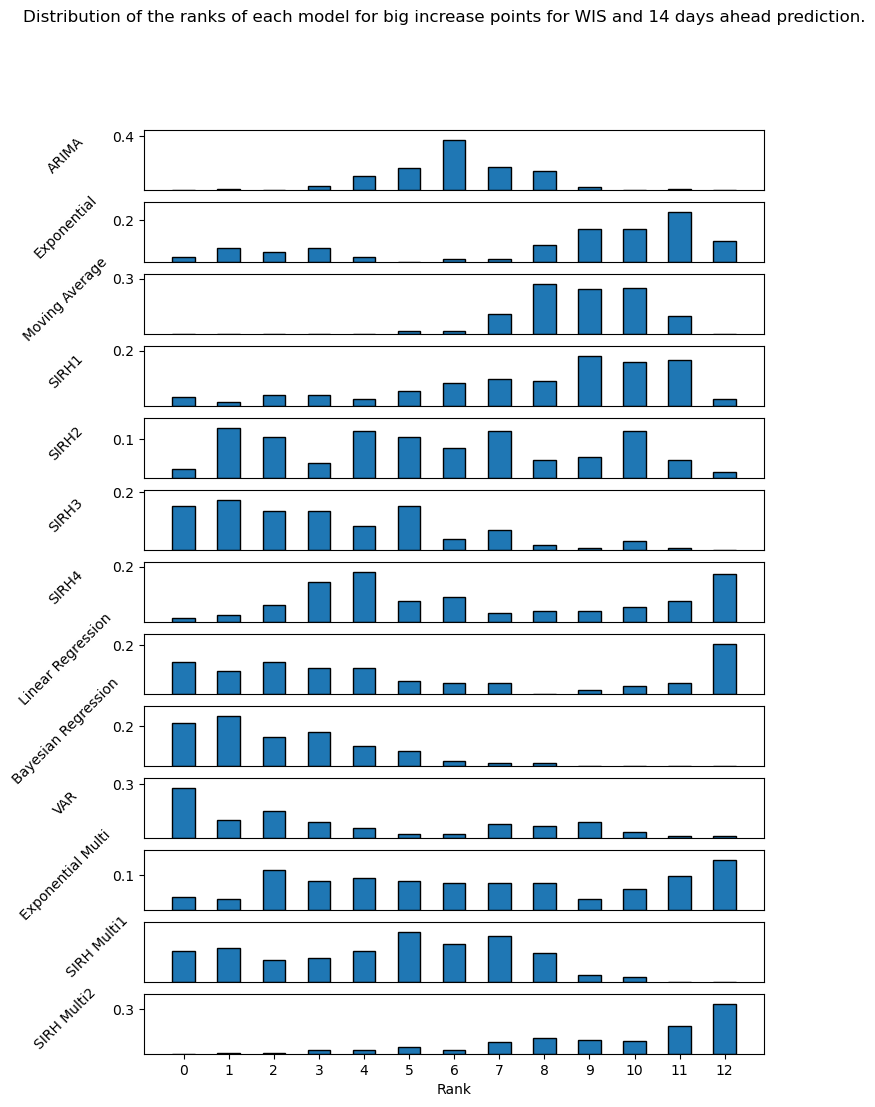

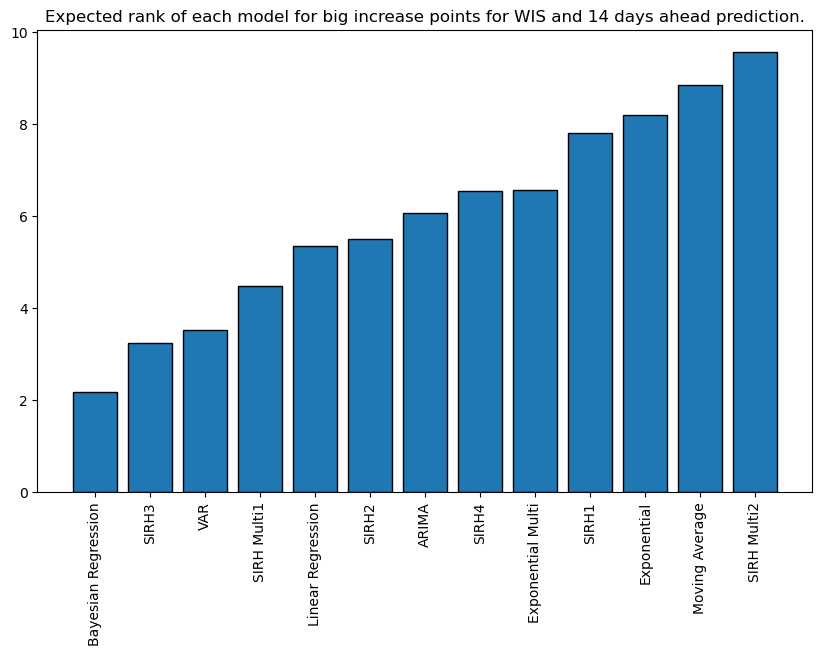

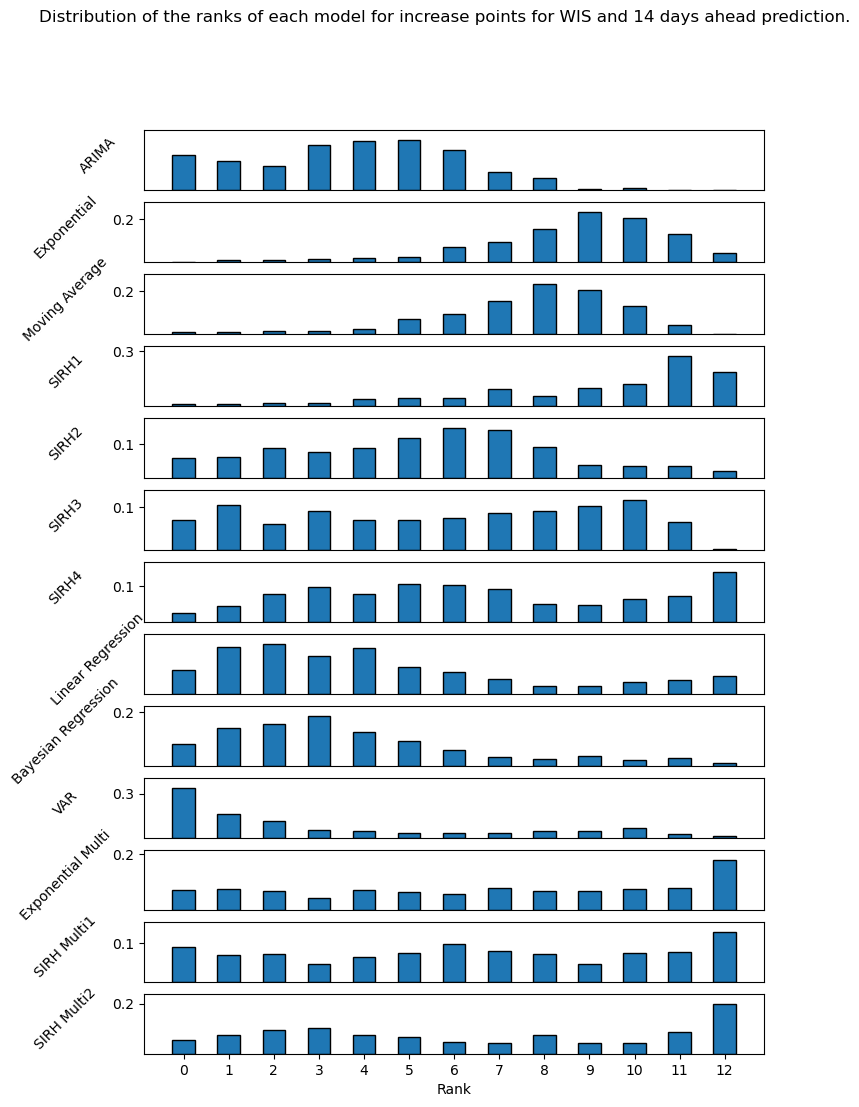

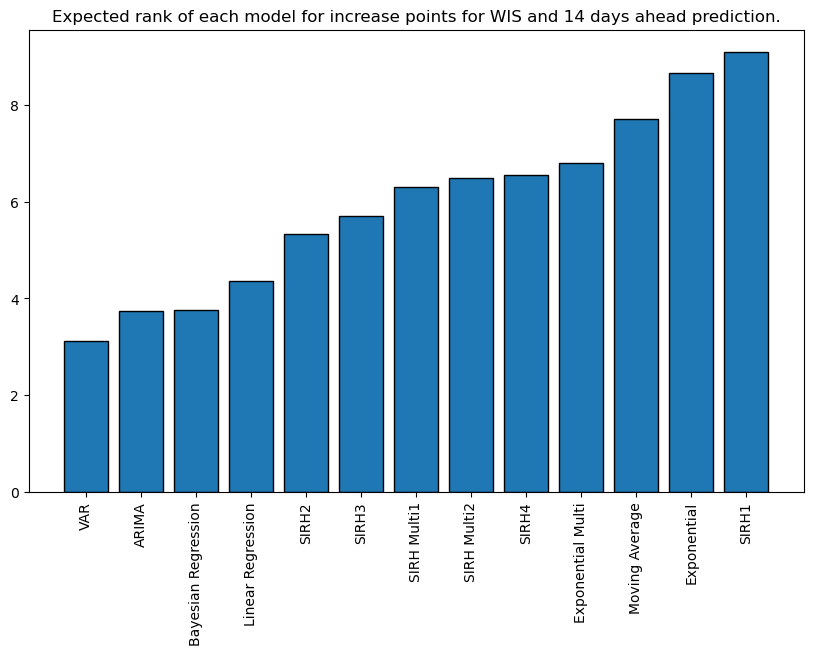

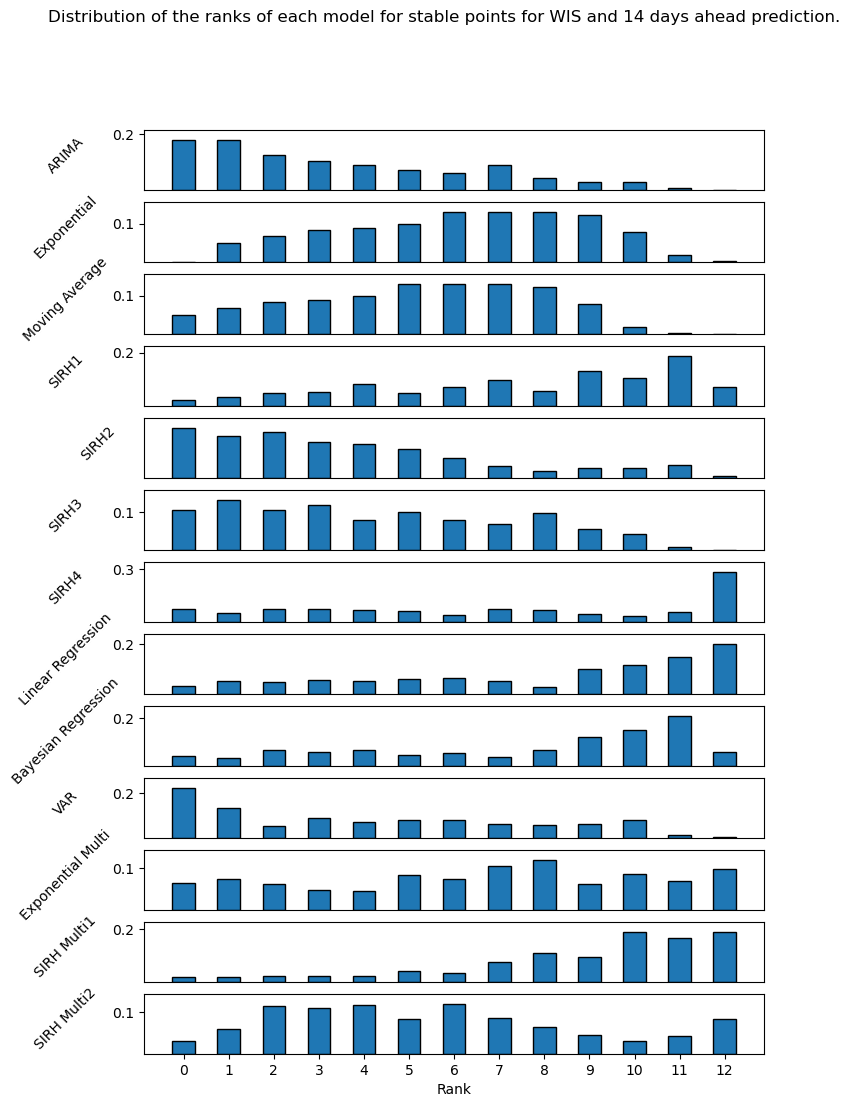

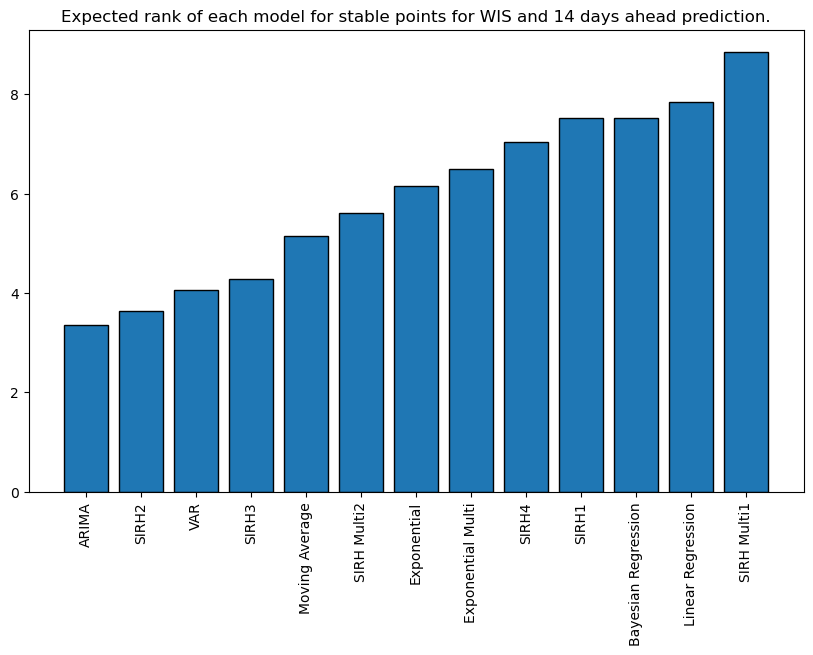

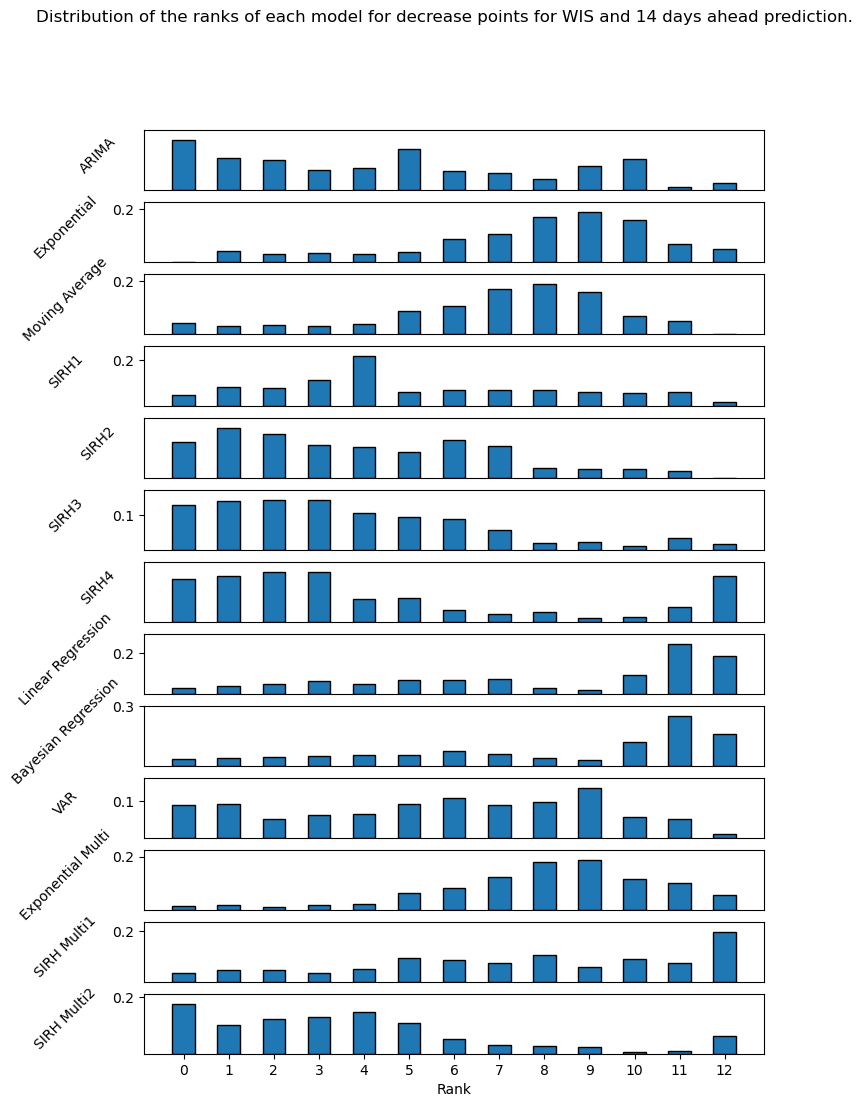

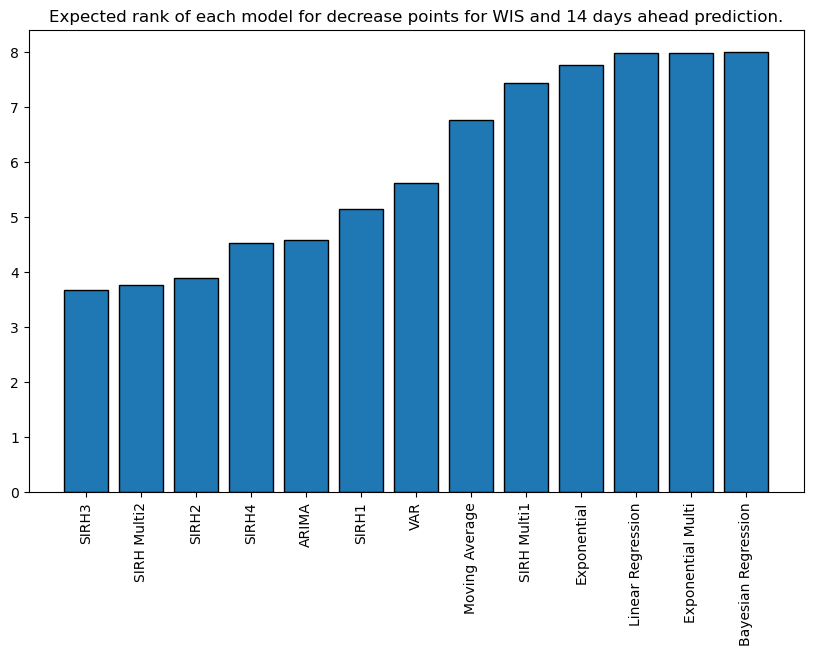

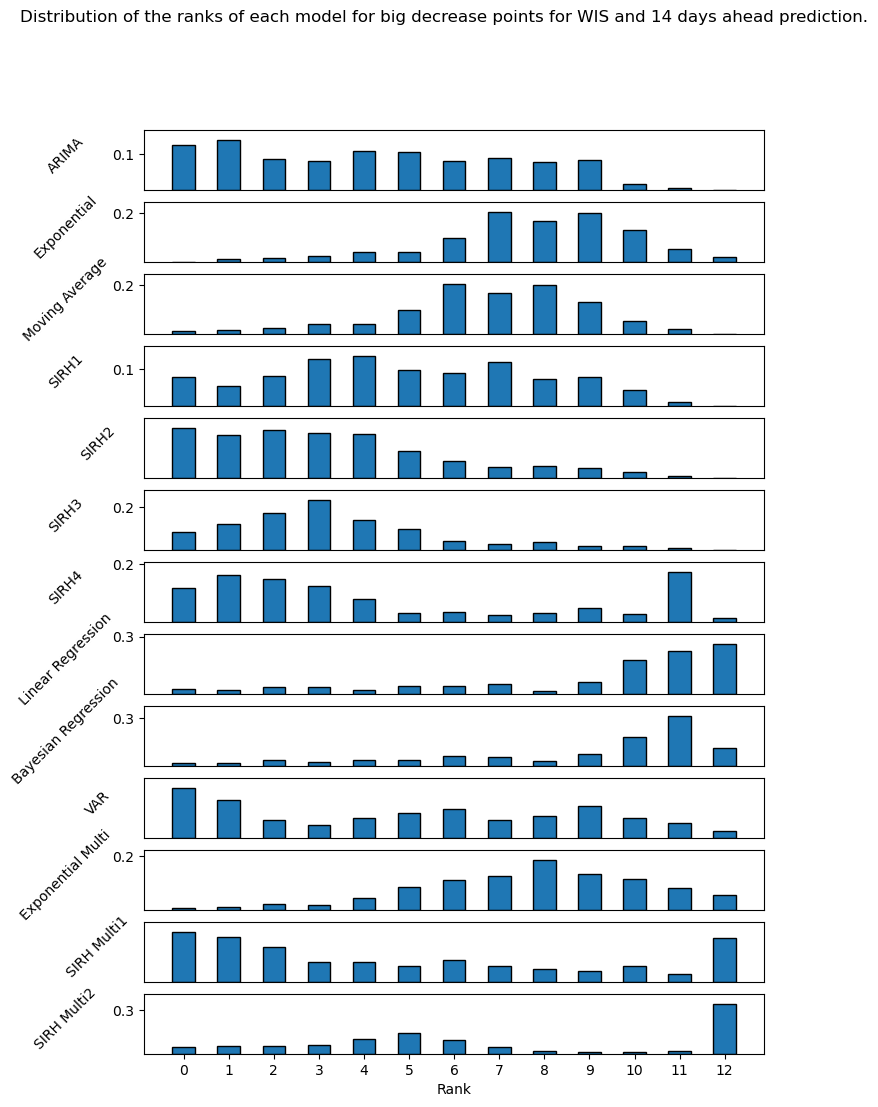

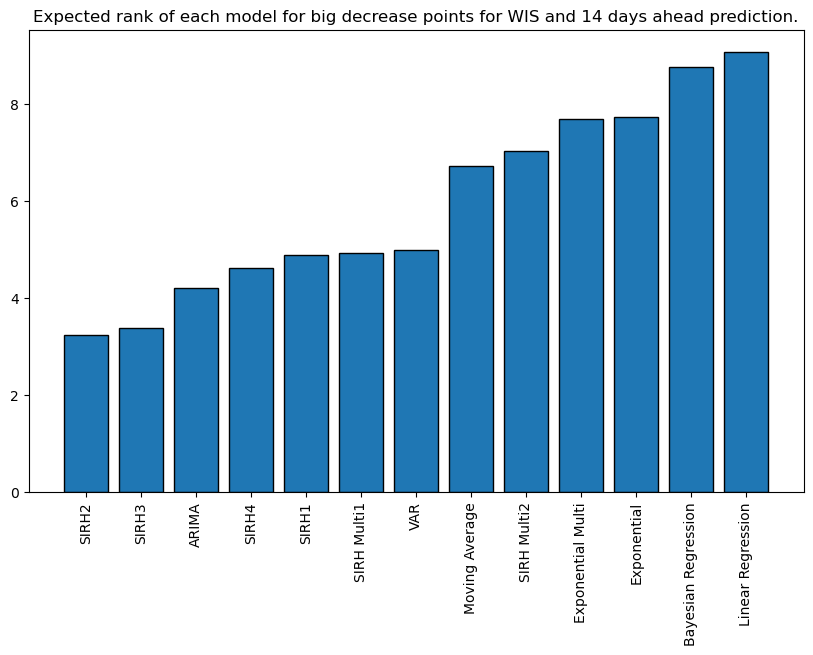

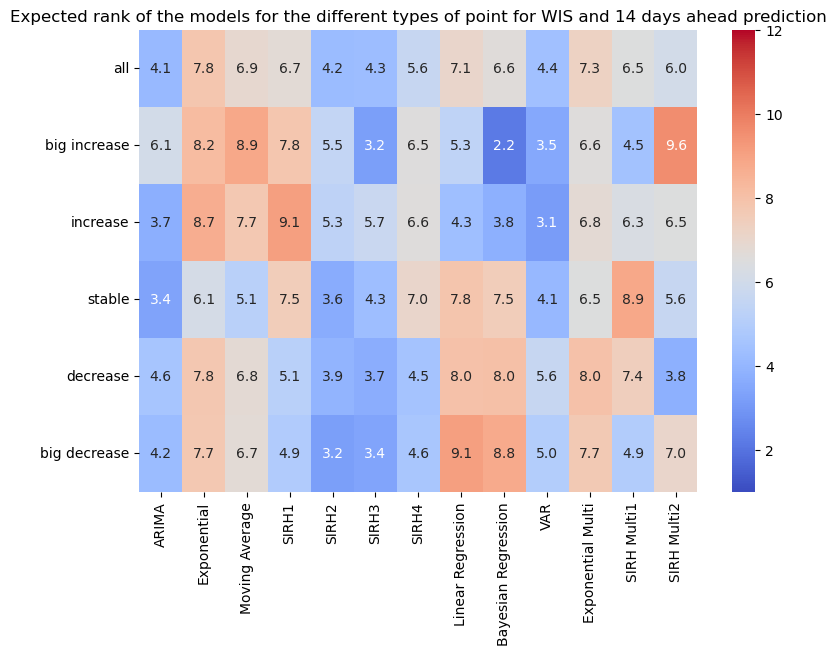

In [61]:
model_type='1D'
loss='RMSE'
reach='7'
list_of_models= models1Dnames+models3Dnames
list_of_models.remove('Moving Average Multi')
# type_of_points=['all','big increase', 'increase' , 'stable', 'inflexion', 'decrease', 'big decrease']
type_of_points=['all','big increase', 'increase' , 'stable',  'decrease', 'big decrease']

for loss in ['RMSE', 'WIS']: 
    for reach in ['7', '14']:
        df_expected_ranks=pd.DataFrame(columns= list_of_models, index = type_of_points )



        for label_point in type_of_points:

            all_ranks=np.zeros((len(list_of_models), len(list_of_models)))
            results_list=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if loss in name and '1D' in name and 'reach_='+str(reach) in name   ] # results of the models
            for name in results_list :
                mob=int(name.split('_')[-5])
                pand=int(name.split('_')[-4])
                dicoresults1=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
                dicoresults2=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name.replace('1D', '3D')))
                dicoresults=concat_dico(dicoresults1, dicoresults2)
                df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
                df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
                df.drop(['Unnamed: 0'], axis=1, inplace=True)
                n_hospitalized = np.array(df.loc['n_hospitalized'])
                r_eff=np.array(df.loc['r_eff'])
                indexs_points=[[20*i] for i in range(1, 15) ] 
                prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
                prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
                prediction.index=[20*i for i in range(1, 15)]
                prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)
                prediction_all=prediction
                prediction=prediction_bis
                for point in indexs_points: 
                    if n_hospitalized[point[0]] >= 100 :
                        if label_point=='all': 
                            real_value=prediction_all['Real values'].loc[point[0]]
                            perfs=dicoresults[str(point)]
                            assert(len(perfs)==14)
                            assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
                            perfs.pop(11) # remove the moving average multi
                            assert(len(perfs)==13)
                            rankings=get_classement(perfs)
                            for i in range(len(rankings)): 
                                rank_model_i=rankings[i]
                                all_ranks[i][rank_model_i]+=1

                        # elif classify(point[0], n_hospitalized) == label_point :
                        elif classify_bis(point[0], r_eff) == label_point :
                            real_value=prediction_all['Real values'].loc[point[0]]
                            perfs=dicoresults[str(point)]
                            assert(len(perfs)==14)
                            assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
                            perfs.pop(11) # remove the moving average multi
                            assert(len(perfs)==13)
                            rankings=get_classement(perfs)
                            for i in range(len(rankings)): 
                                rank_model_i=rankings[i]
                                all_ranks[i][rank_model_i]+=1
                        


            fig, axs = plt.subplots(len(list_of_models), figsize=(8, 12))     
            expected_ranks=[np.sum((np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])))*np.array([i for i in range( len(rankings))])) for i in range(len(rankings))]   
             
            for i in range(len(rankings)):   
                axs[i].bar([j for j in range(len(rankings))], np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])), edgecolor='black', width = 0.5)
                axs[i].set_yticks([ round(np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))), 1) ])
                axs[i].set_ylim(bottom = 0 , top = (np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))))*1.2)
                axs[i].set_ylabel(list_of_models[i], labelpad=30)
                axs[i].yaxis.label.set_rotation(45)
                if i != len(rankings)-1:
                    axs[i].set_xticks([])
                else : 
                    axs[i].set_xticks([j for j in range(len(rankings))])
                    axs[i].set_xlabel('Rank'  )
                fig.suptitle('Distribution of the ranks of each model for '+label_point+' points for '+loss+' and '+reach+' days ahead prediction.')

            plt.show()
            plt.figure(figsize=(10, 6))
            exp_copy=expected_ranks.copy()
            expected_ranks.sort()
            df_expected_ranks.loc[label_point]=exp_copy
            plt.bar(sort_list(list_of_models, exp_copy), expected_ranks, edgecolor='black')
            plt.xticks(rotation=90)
            plt.title('Expected rank of each model for '+label_point+' points for '+loss+' and '+reach+' days ahead prediction.')
            plt.show()
        
        plt.figure(figsize=(9,6))
        sns.heatmap(df_expected_ranks.astype(float), cmap='coolwarm', annot=True, fmt=".1f", vmin=1, vmax=12)
        xticks = list_of_models
        yticks = type_of_points
        plt.xticks(ticks=[i+0.5 for i in range(len(xticks))], labels=xticks, rotation=90)
        plt.yticks(ticks=[i+0.5 for i in range(len(yticks))], labels=yticks, rotation=0)
        plt.title('Expected rank of the models for the different types of point for '+str(loss)+' and '+str(reach)+' days ahead prediction')
        plt.show()

Ensemble model only possible for RMSE

R2 :  0.9783304926115515
Coefficients :  [ 5.31519586e-01 -1.63786870e-01  2.93756991e-02  9.86440599e-02
  1.01110326e-01  5.97865524e-02  1.59776310e-06  4.88526632e-02
  2.36113194e-01  9.45288153e-03 -1.68941860e-03]
Intercept :  117.80515360259278


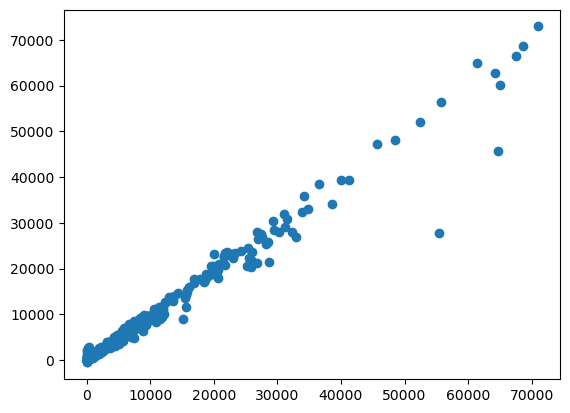

0.949380272399797


In [40]:
concatenated_train_7=pd.DataFrame(columns =[name for name in  models1Dnames + models3Dnames + ['Real values'] if 'xponential' not in name and 'Moving Average Multi' not in name ])
concatenated_test_7=pd.DataFrame(columns =[name for name in  models1Dnames + models3Dnames + ['Real values'] if 'xponential' not in name and 'Moving Average Multi' not in name])
names_7 = [name for name in os.listdir('./results/predictions_of_the_models_corrected/') if '7_days' in name]
names_train_7=[]
names_test_7=[]
np.random.seed(0)
for name in names_7 : 

    prediction=pd.read_csv('./results/predictions_of_the_models_corrected/'+name)
    prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
    prediction.drop(['Exponential'], axis=1, inplace=True)
    prediction.drop(['Exponential Multi'], axis=1, inplace=True)
    prediction.drop(['Moving Average Multi'], axis=1, inplace=True)
    # prediction.drop(['VAR'], axis=1, inplace=True)
    
    prediction.index=[20 * i for i in range(1, 15)]
    if np.random.rand() < 0.8 : 
        names_train_7.append(name)
        concatenated_train_7=concat_df(concatenated_train_7, prediction)
    else :
        names_test_7.append(name)
        concatenated_test_7=concat_df(concatenated_test_7, prediction)
matrix_train_7=np.array(concatenated_train_7)
matrix_test_7=np.array(concatenated_test_7)



# regression lineaire pour prédire la dernière colonne de matric avec les autres : 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# rl : 
X_train_7=matrix_train_7[:,:-1]
y_train_7=matrix_train_7[:,-1]
X_test_7=matrix_test_7[:,:-1]
y_test_7=matrix_test_7[:,-1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=432)
regressor_7_days=LinearRegression()
regressor_7_days.fit(X_train_7, y_train_7)
y_pred_7=regressor_7_days.predict(X_test_7)
print('R2 : ', r2_score(y_test_7, y_pred_7))
print('Coefficients : ', regressor_7_days.coef_)
print('Intercept : ', regressor_7_days.intercept_)
plt.plot(y_test_7, y_pred_7, 'o')
plt.show()
print(np.sum(regressor_7_days.coef_))
coefs_7_days=regressor_7_days.coef_

R2 :  0.6686613001512309
Coefficients :  [ 4.74445398e-01 -2.20141653e-01  6.52919336e-02  1.38725837e-01
  2.77343309e-01 -4.95733602e-02  1.50750523e-11  4.87718628e-03
  2.12874871e-01  2.31123741e-02 -2.86079817e-03]
Intercept :  273.63382947266473


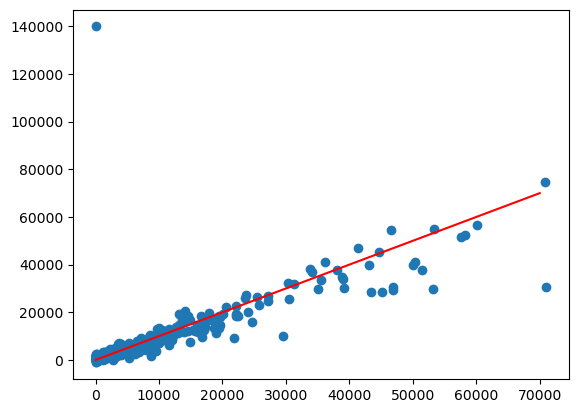

0.9240950973011052


In [41]:
# idem for 14 : 
concatenated_train_14=pd.DataFrame(columns =[name for name in  models1Dnames + models3Dnames + ['Real values'] if 'xponential' not in name and 'Moving Average Multi' not in name ])
concatenated_test_14=pd.DataFrame(columns =[name for name in  models1Dnames + models3Dnames + ['Real values'] if 'xponential' not in name and 'Moving Average Multi' not in name ])
names_14 = [name for name in os.listdir('./results/predictions_of_the_models_corrected/') if '14_days' in name]
names_train_14=[]
names_test_14=[]
np.random.seed(0)

for name in names_14 : 

    prediction=pd.read_csv('./results/predictions_of_the_models_corrected/'+name)
    prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
    prediction.drop(['Exponential'], axis=1, inplace=True)
    prediction.drop(['Exponential Multi'], axis=1, inplace=True)
    prediction.drop(['Moving Average Multi'], axis=1, inplace=True)
    # prediction.drop(['VAR'], axis=1, inplace=True)
    
    prediction.index=[20 * i for i in range(1, 15)]
    if np.random.rand() < 0.8 : 
        names_train_14.append(name)
        concatenated_train_14=concat_df(concatenated_train_14, prediction)
    else :
        names_test_14.append(name)
        concatenated_test_14=concat_df(concatenated_test_14, prediction)
matrix_train_14=np.array(concatenated_train_14)
matrix_test_14=np.array(concatenated_test_14)



# regression lineaire pour prédire la dernière colonne de matric avec les autres : 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# rl : 
X_train_14=matrix_train_14[:,:-1]
y_train_14=matrix_train_14[:,-1]
X_test_14=matrix_test_14[:,:-1]
y_test_14=matrix_test_14[:,-1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=432)
regressor_14_days=LinearRegression()
regressor_14_days.fit(X_train_14, y_train_14)
y_pred_14=regressor_14_days.predict(X_test_14)
print('R2 : ', r2_score(y_test_14, y_pred_14))
print('Coefficients : ', regressor_14_days.coef_)
print('Intercept : ', regressor_14_days.intercept_)
plt.plot(y_test_14, y_pred_14, 'o')
plt.plot([i for i in range(70000)], 'r')
plt.show()
print(np.sum(regressor_14_days.coef_))
coefs_14_days=regressor_14_days.coef_

Text(0.5, 1.0, 'Coefficients of the ensemble models')

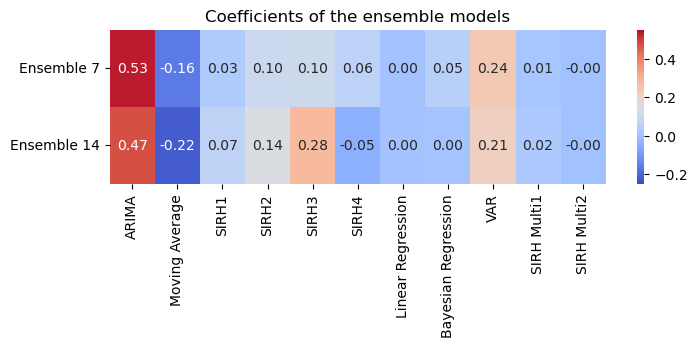

In [42]:
models=models1Dnames+models3Dnames
models.remove('Exponential')
models.remove('Exponential Multi')
models.remove('Moving Average Multi')

df=pd.DataFrame(columns=models)
df.loc['7']=coefs_7_days
df.loc['14']=coefs_14_days
plt.figure(figsize=(8, 2))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".2f", vmin = -0.25, vmax=0.55)
# centrer  les couleurs en zéro : zero = blanc  :
plt.yticks(ticks = [0.5, 1.5], labels=['Ensemble 7', 'Ensemble 14'], rotation=0)
 

plt.title('Coefficients of the ensemble models')


In [43]:
def is_in_test_set_7(name): 
    for elt in names_test_7 : 
        if str(name.split('_')[-5] ) + '_' + str(name.split('_')[-4]) in elt : 
            return True
    return False 


def is_in_test_set_14(name):
    for elt in names_test_14 : 
        if str(name.split('_')[-5] ) + '_' + str(name.split('_')[-4]) in elt : 
            return True
    return False


<>:52: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:69: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:52: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:69: SyntaxWarning: assertion is always true, perhaps remove parentheses?
C:\Users\grego\AppData\Local\Temp\ipykernel_284\1726819675.py:52: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11]))
C:\Users\grego\AppData\Local\Temp\ipykernel_284\1726819675.py:69: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11]))


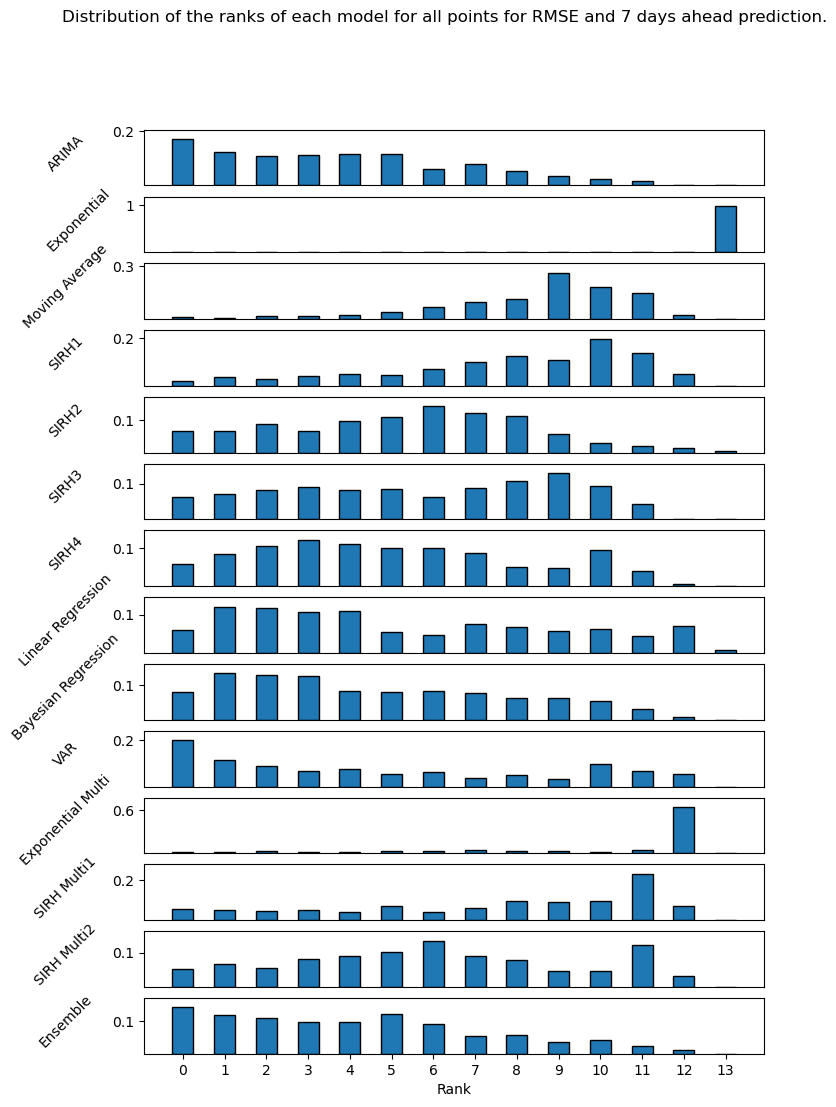

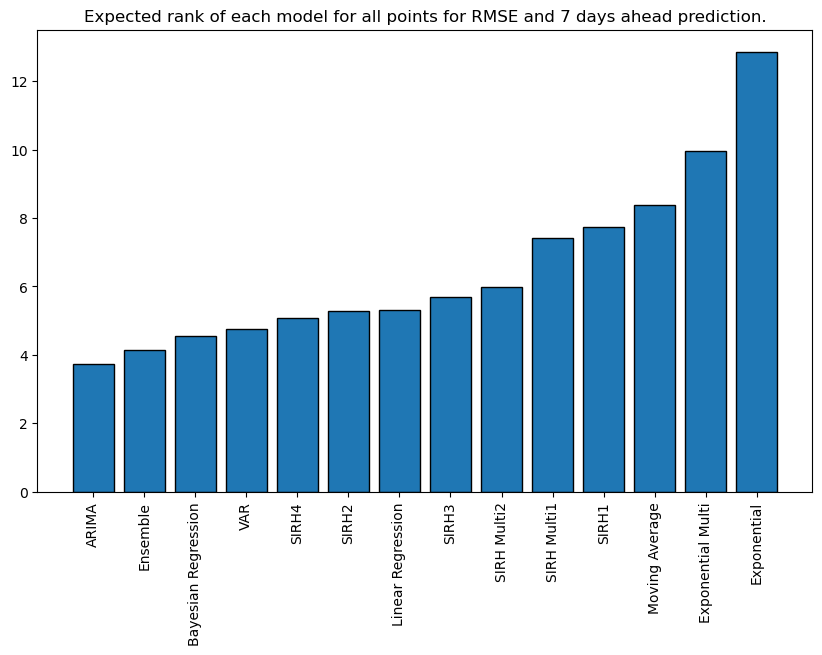

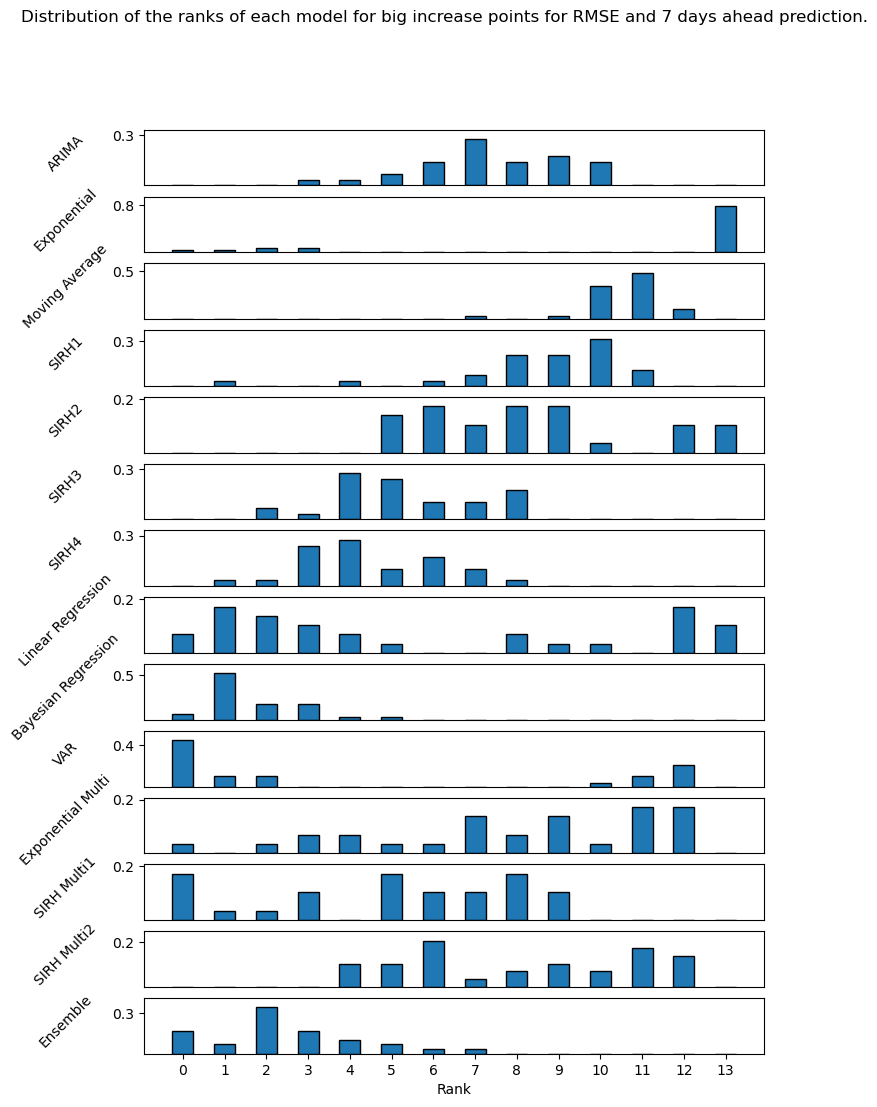

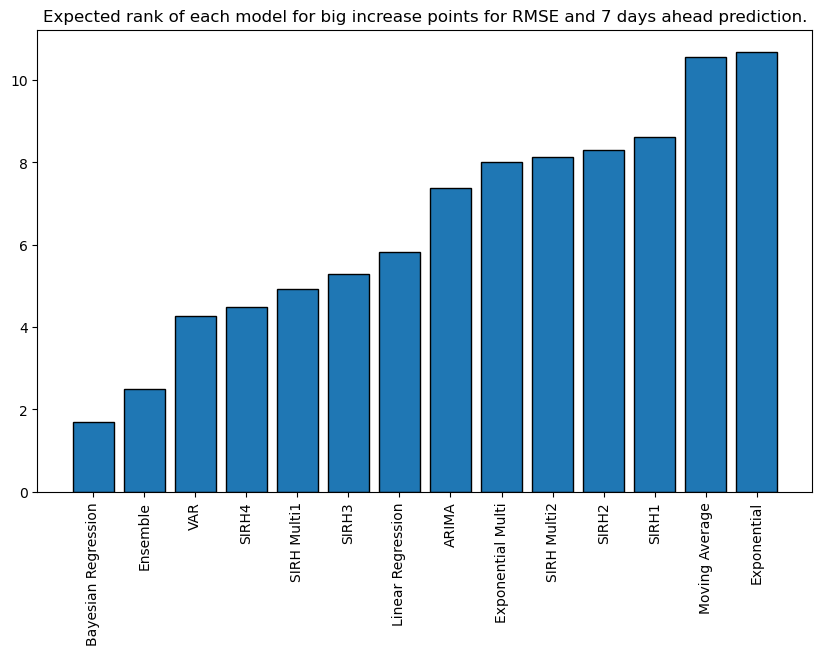

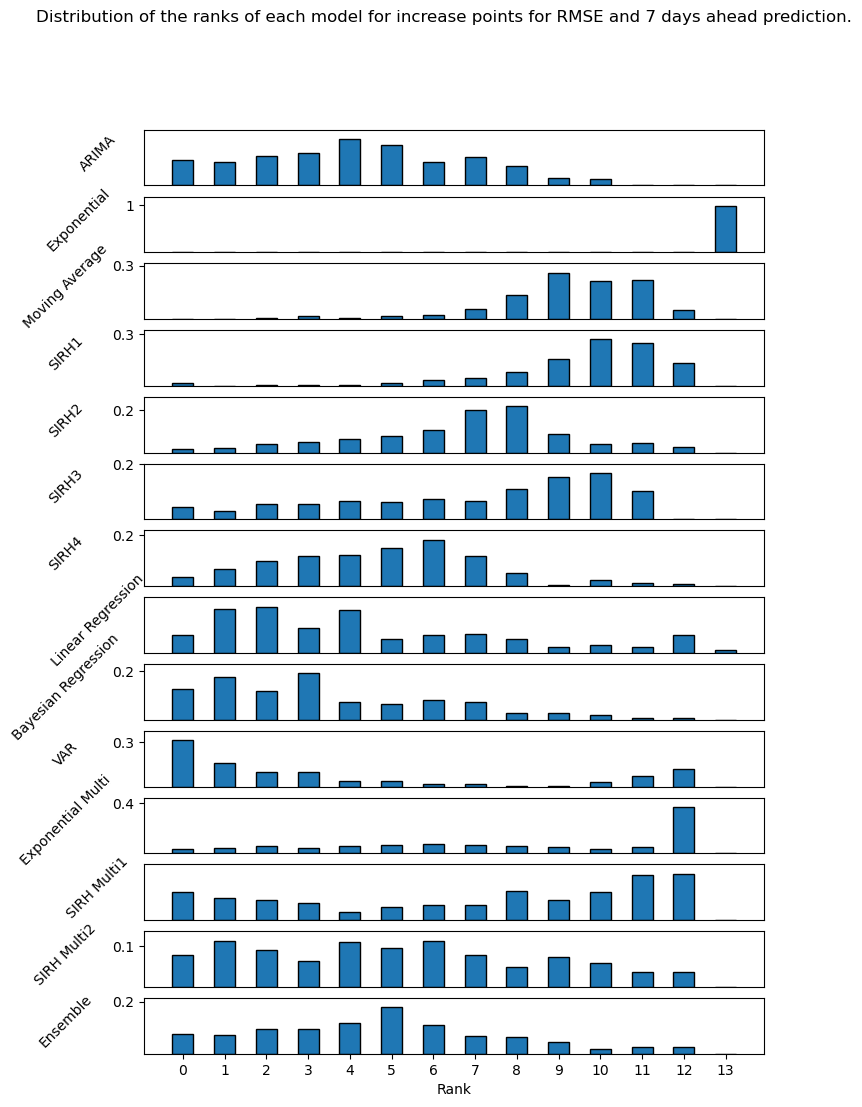

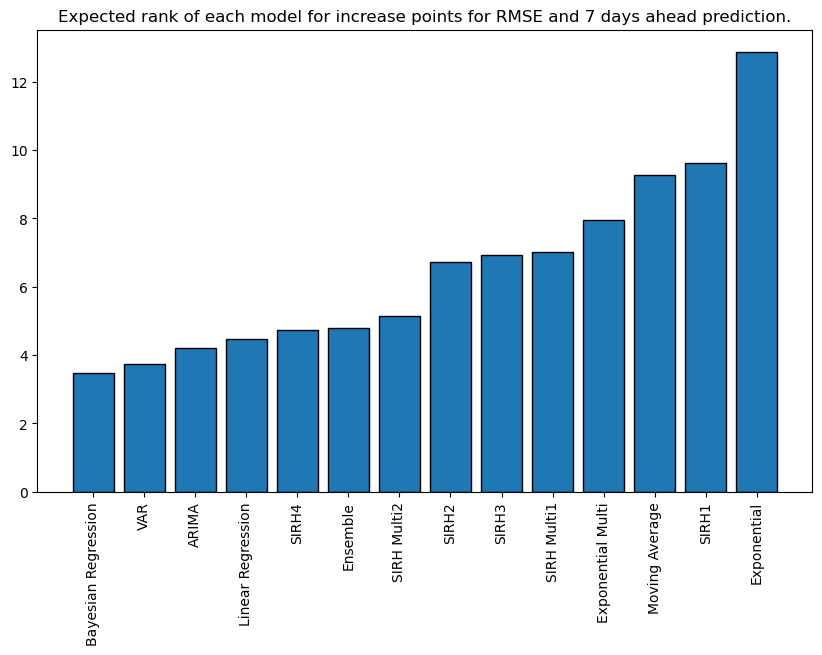

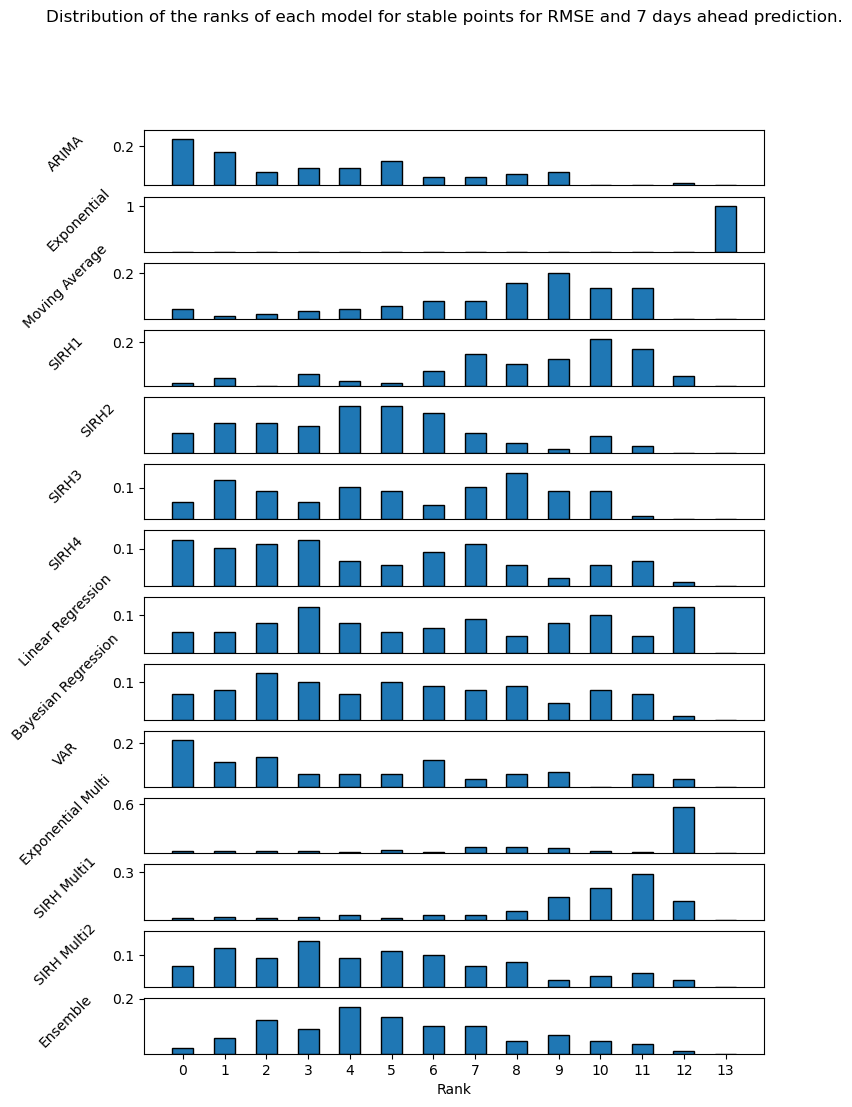

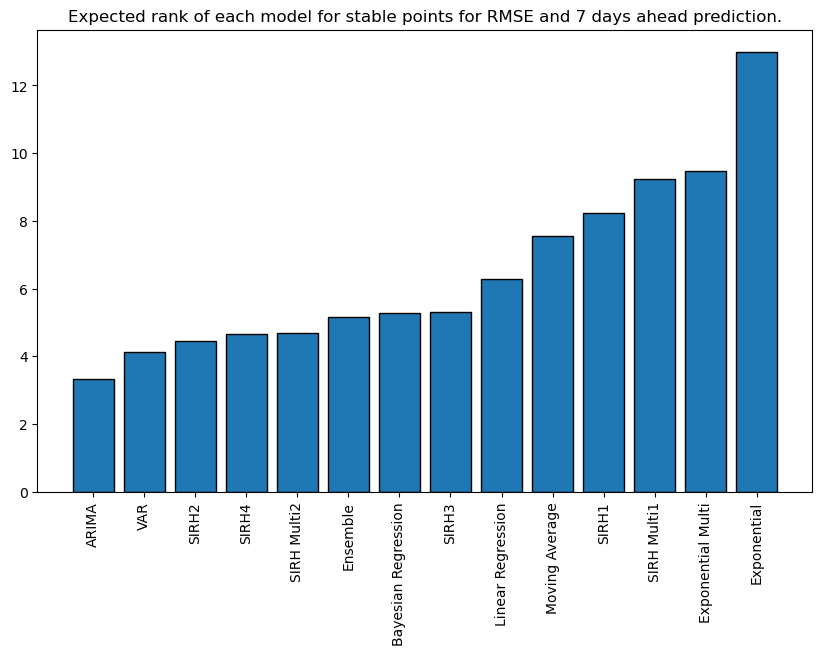

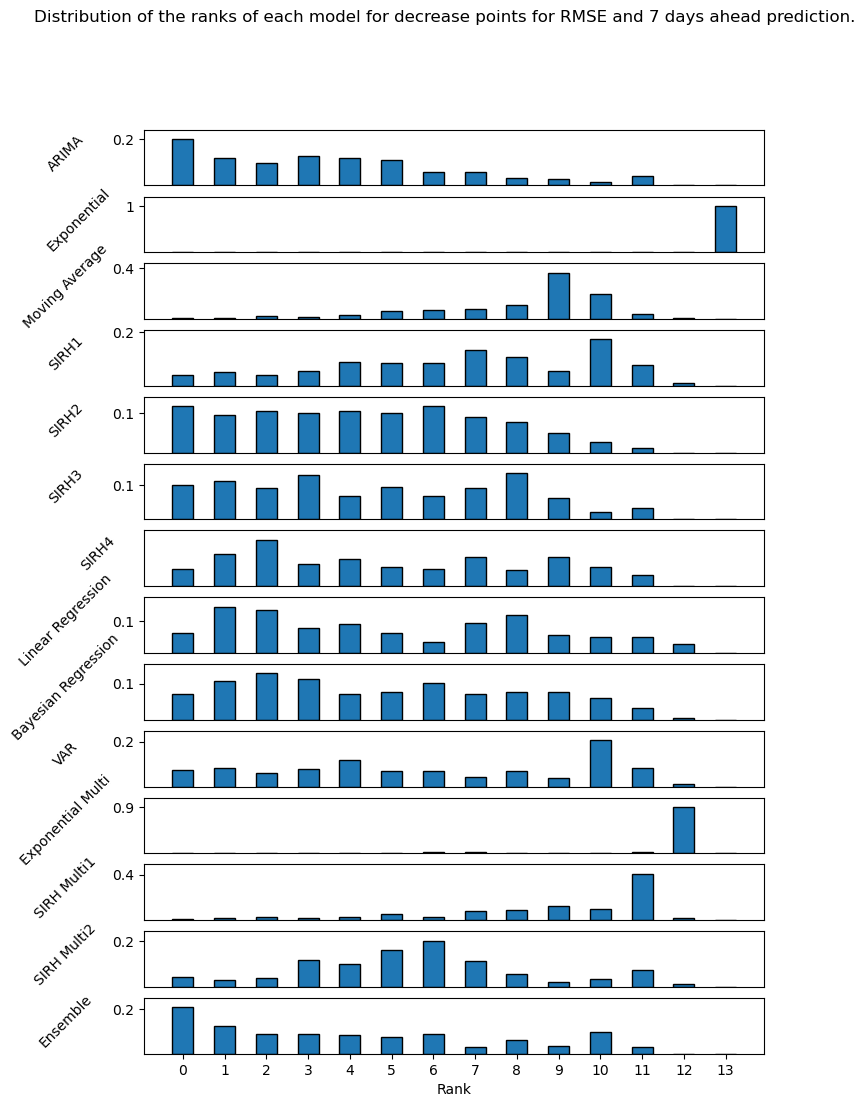

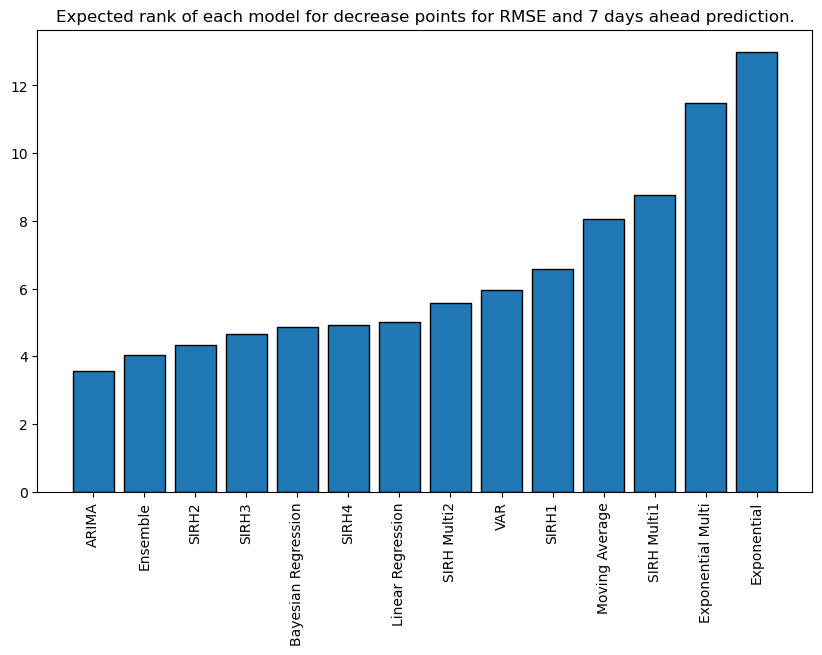

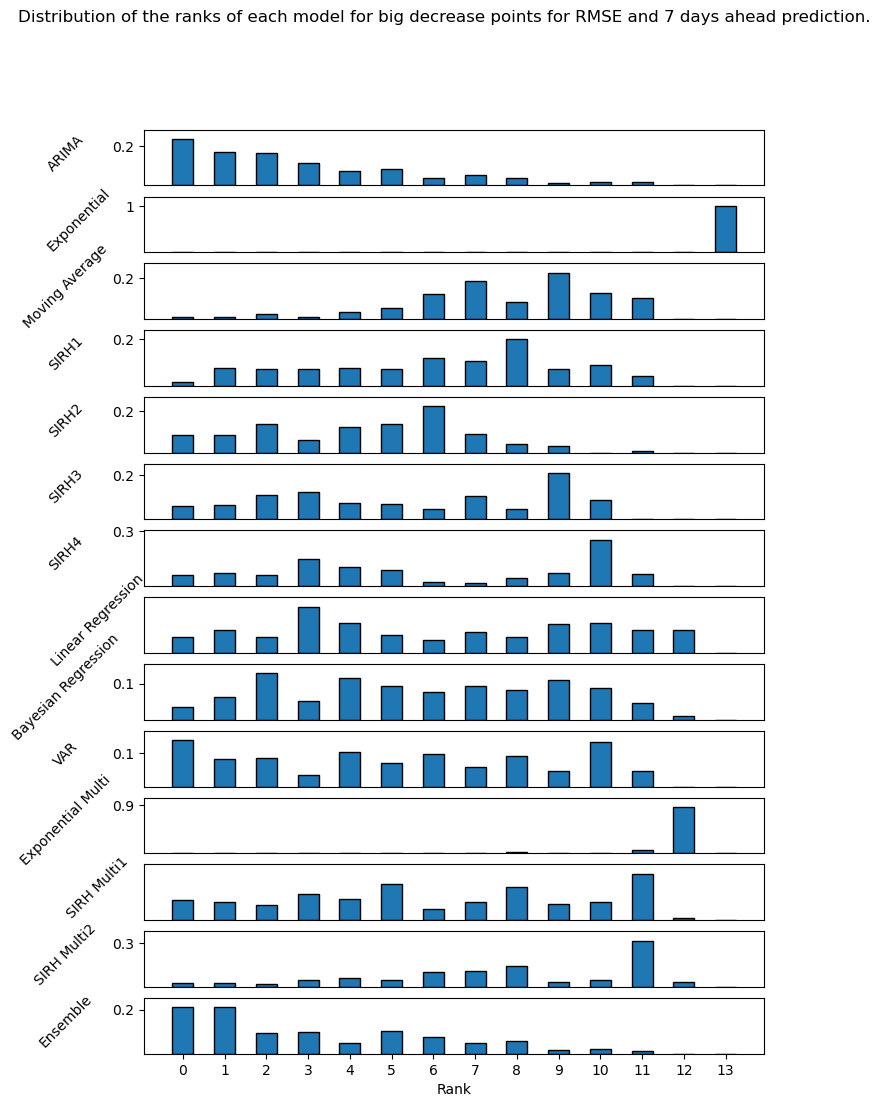

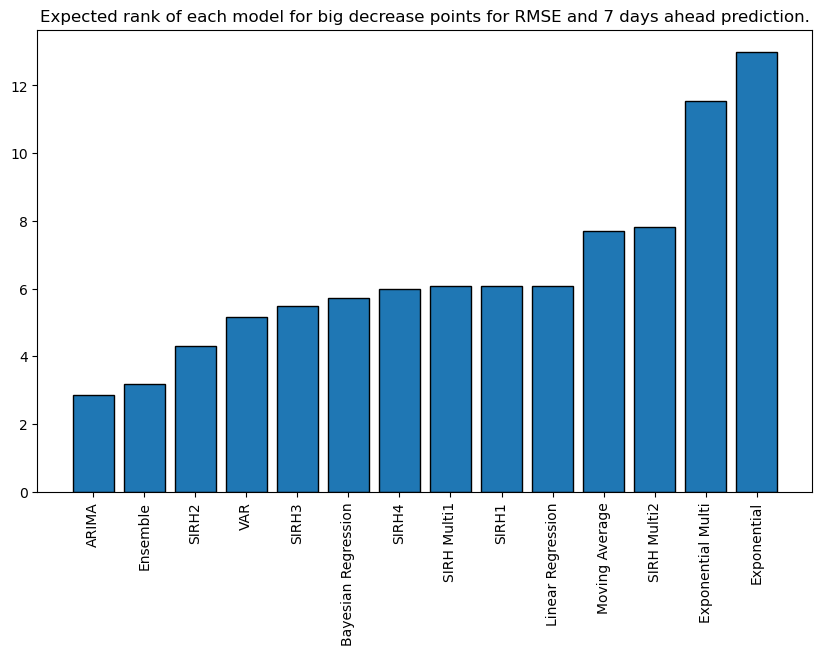

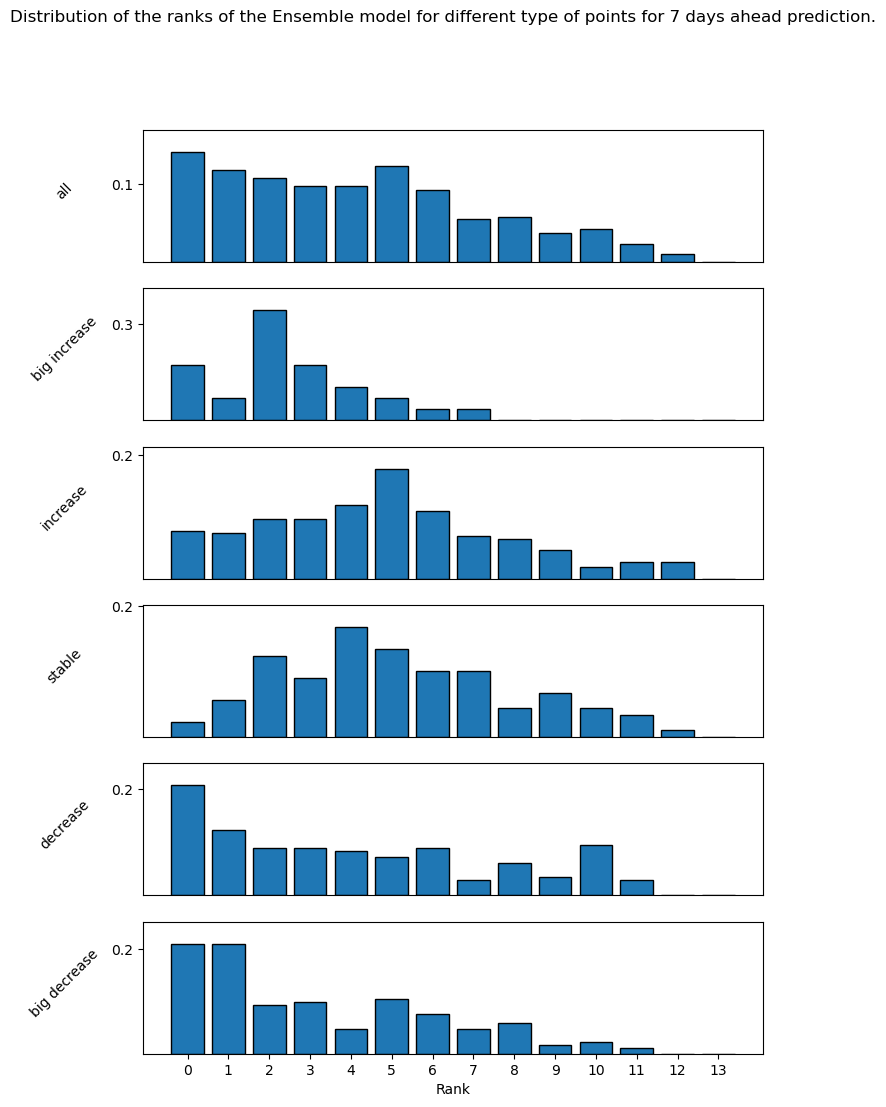

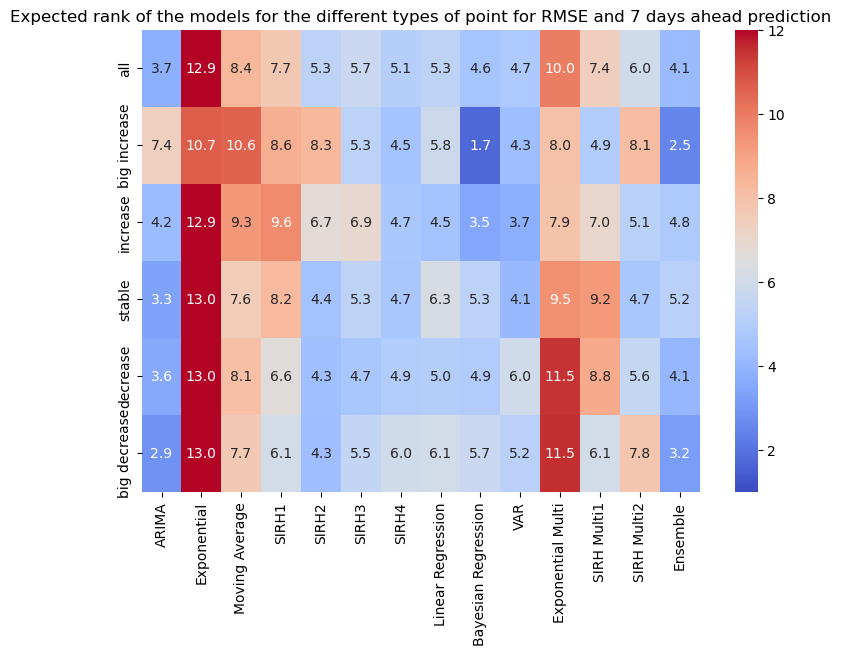

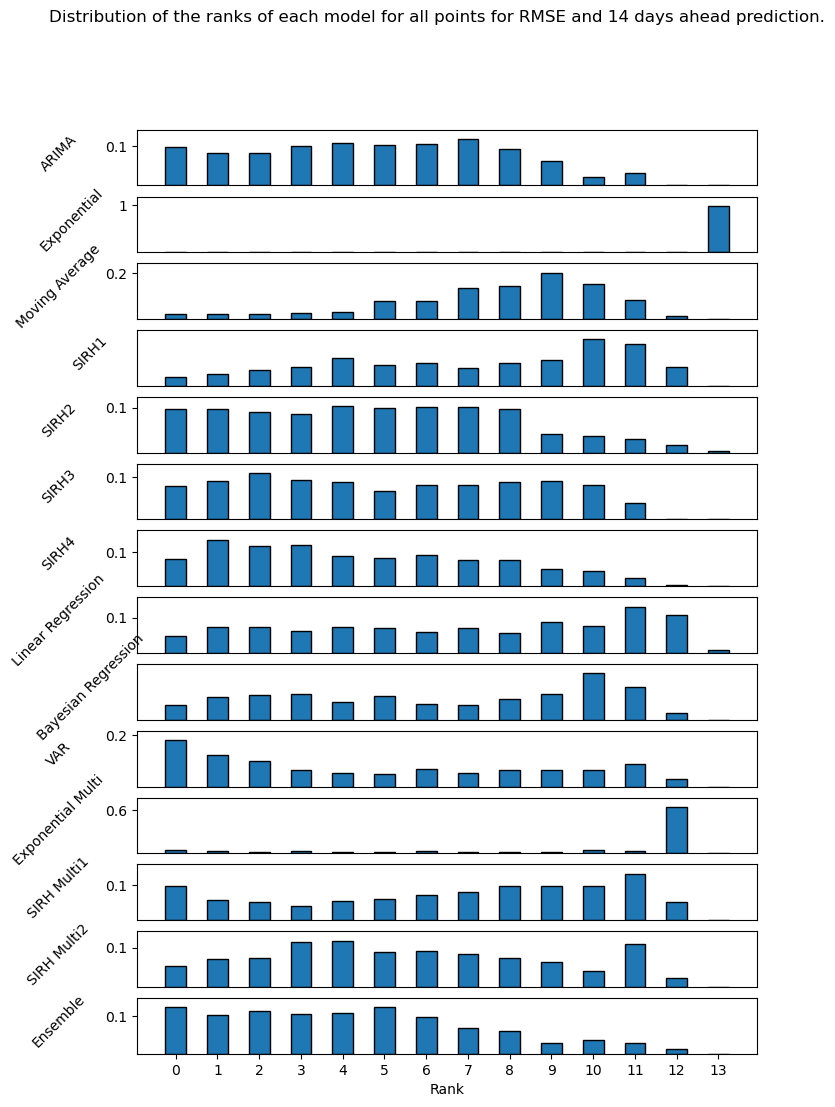

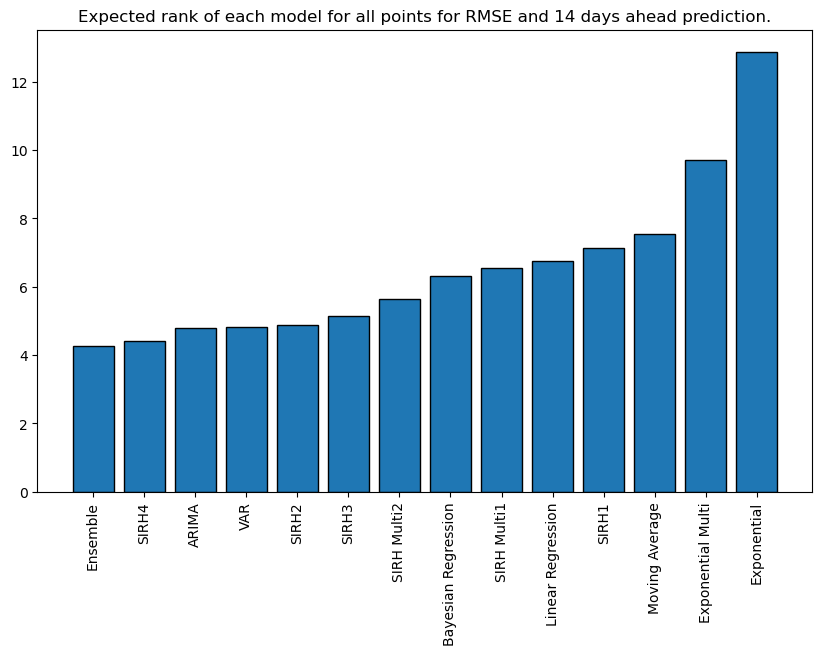

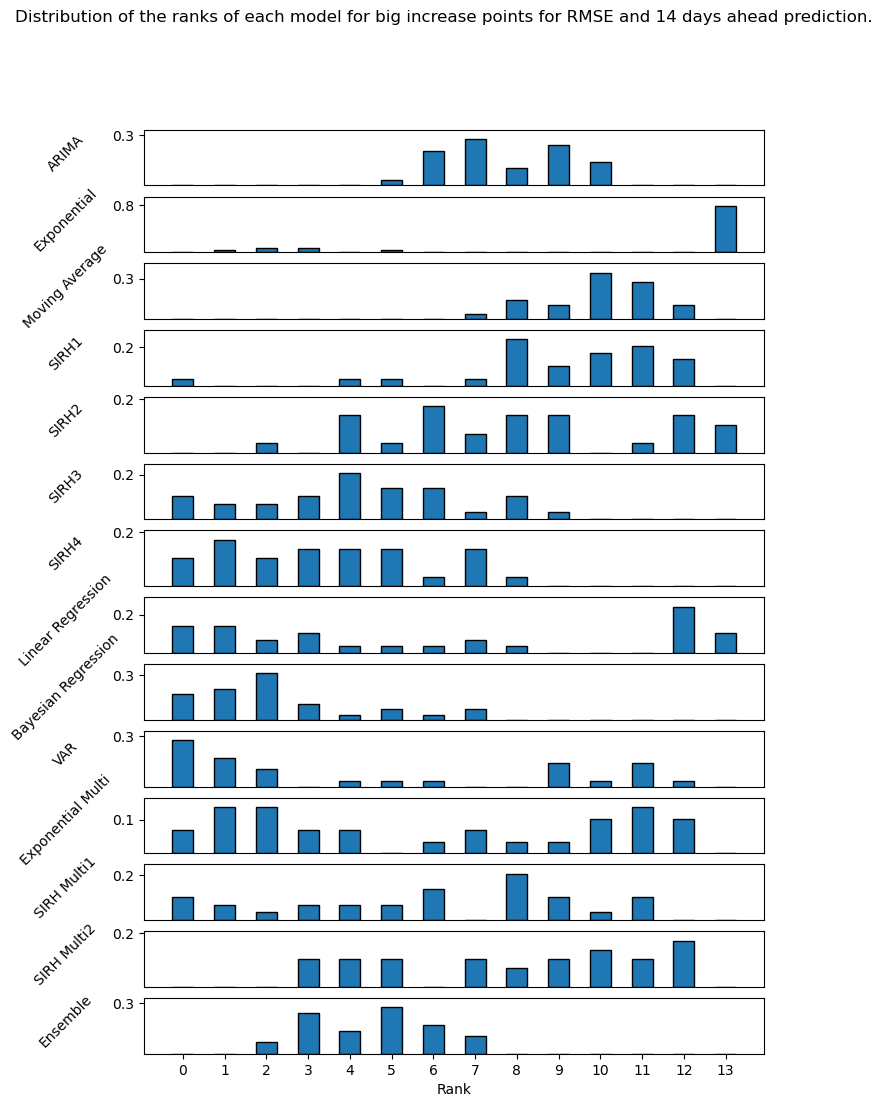

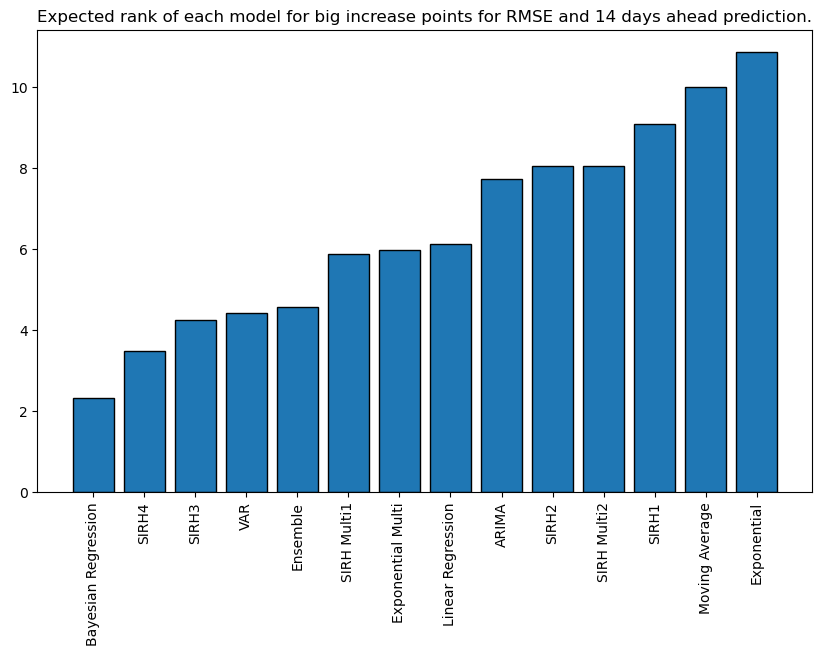

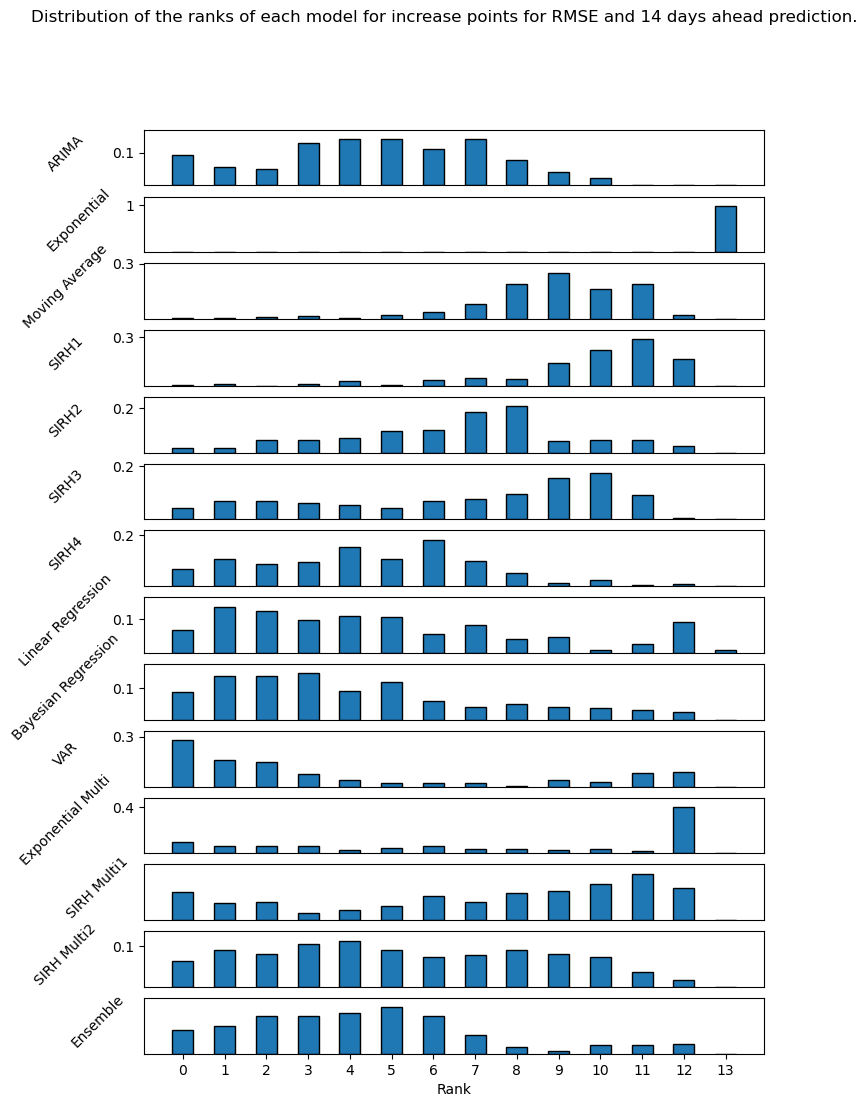

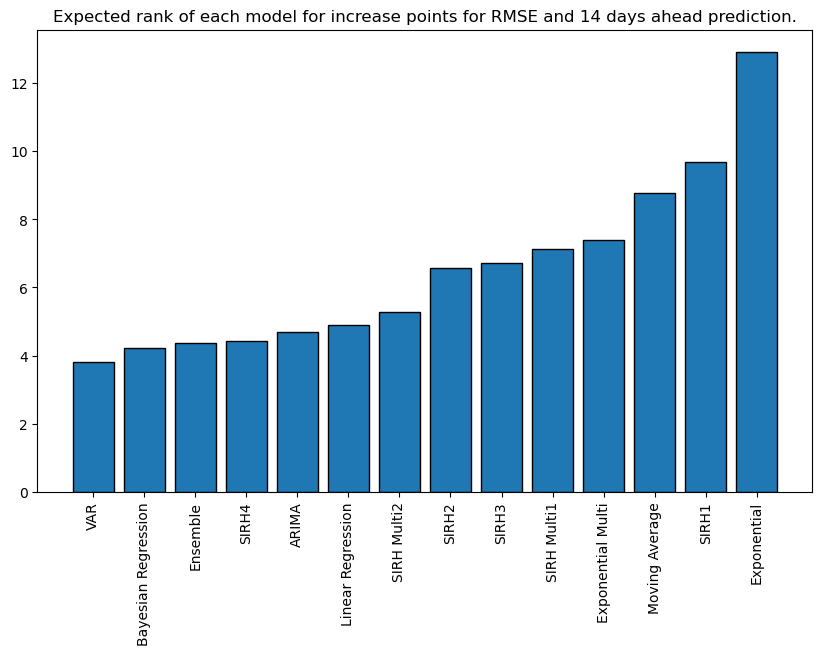

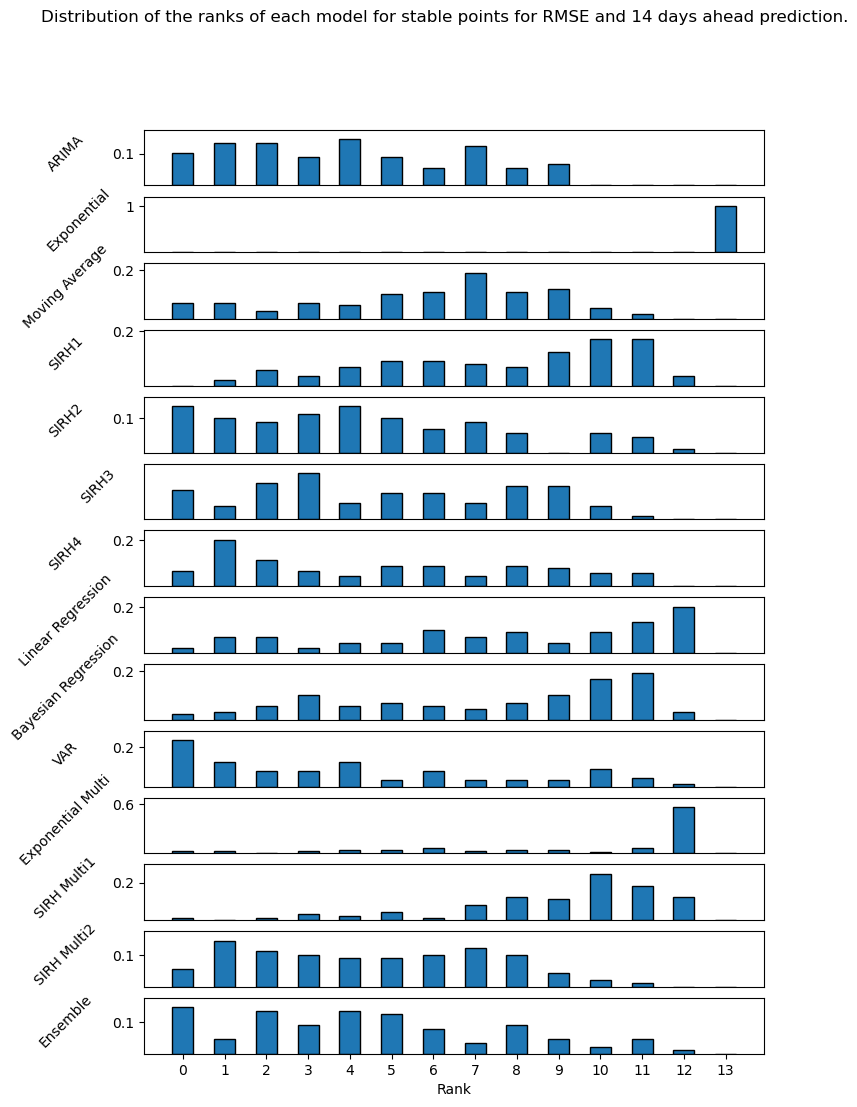

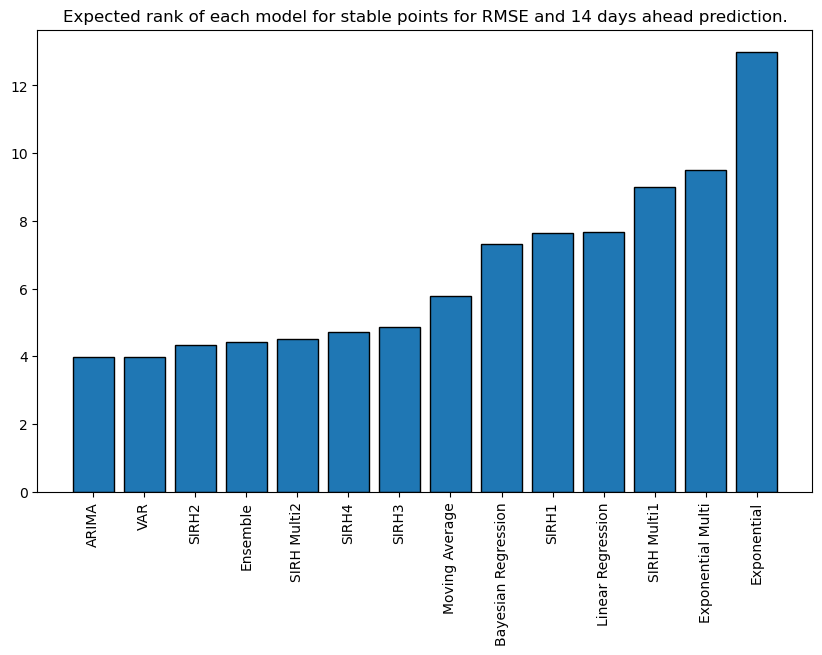

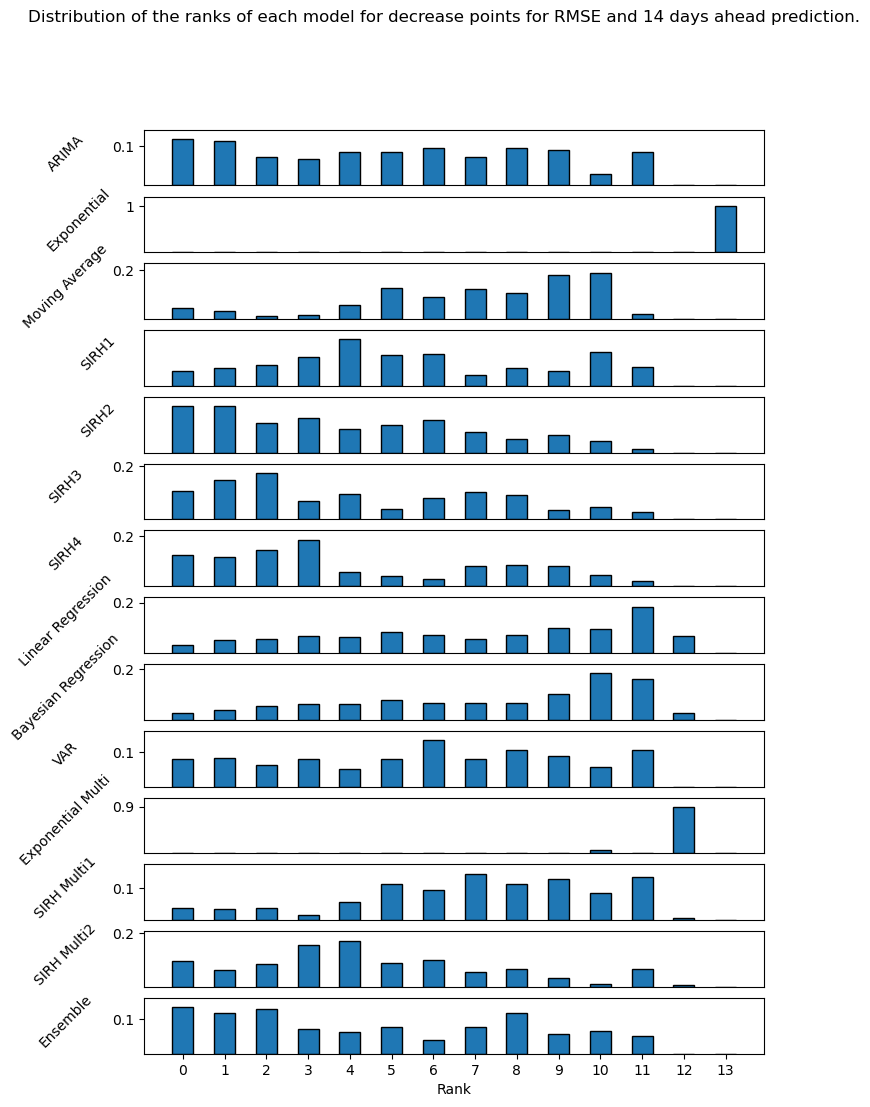

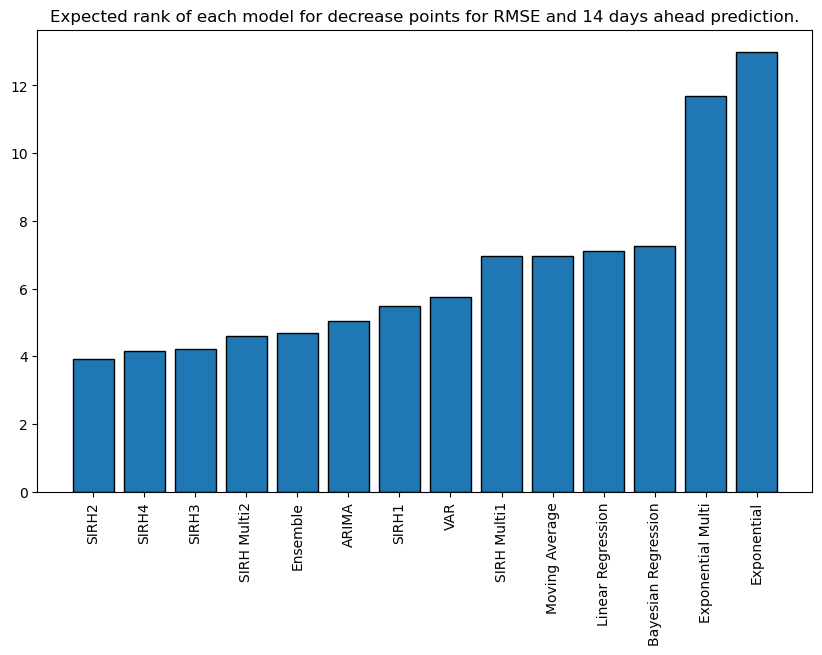

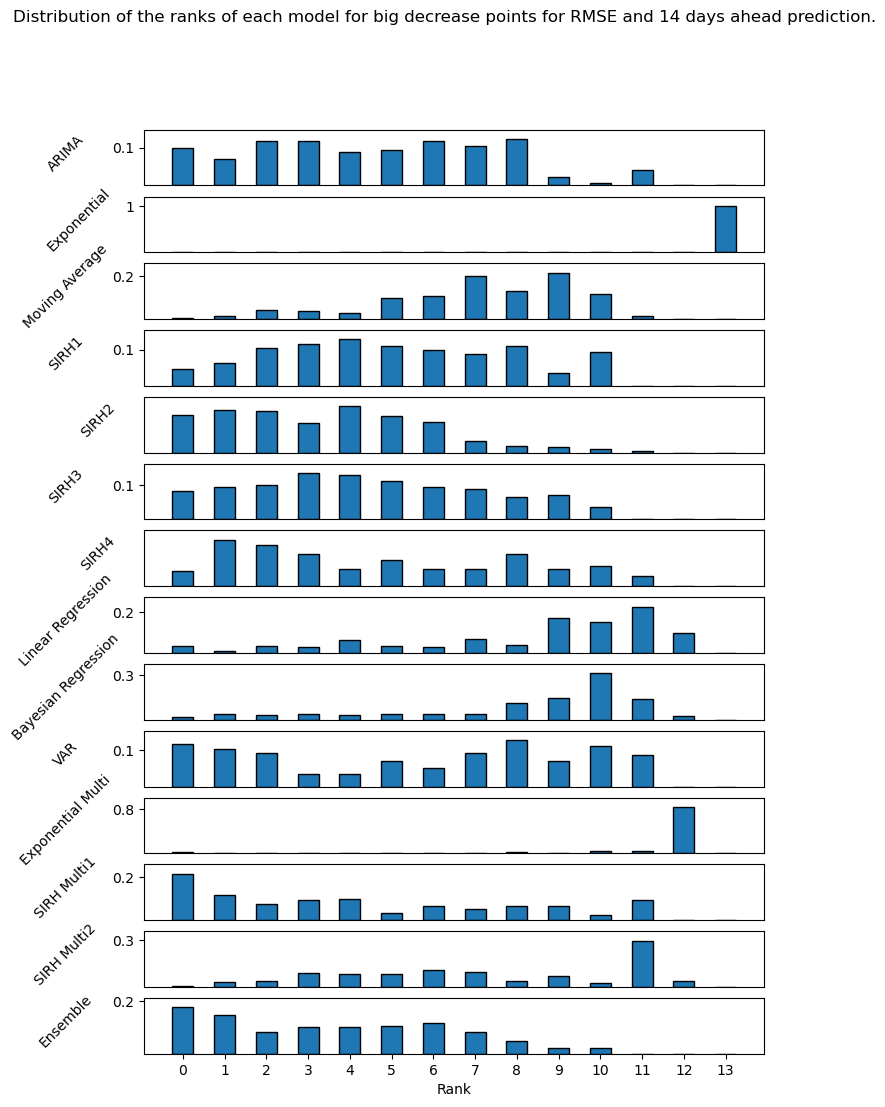

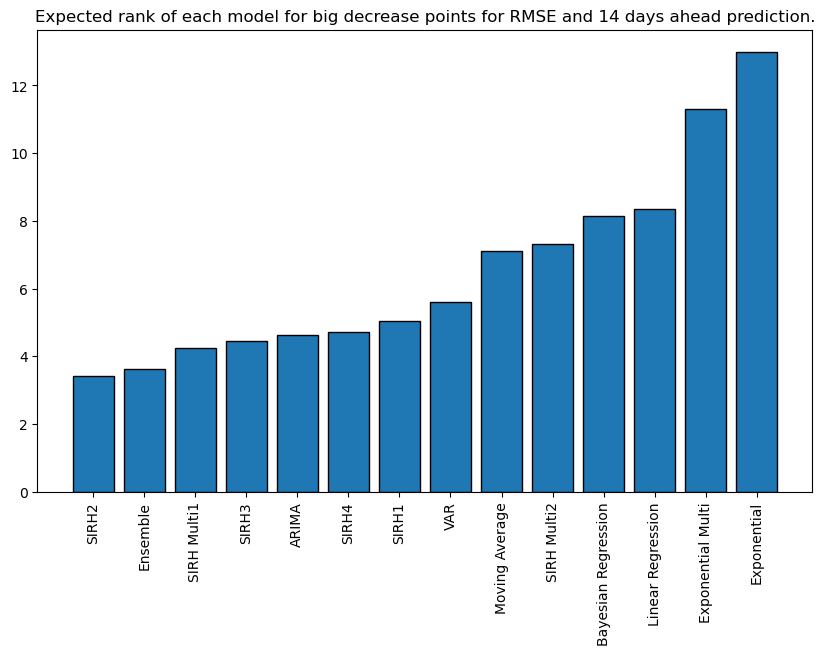

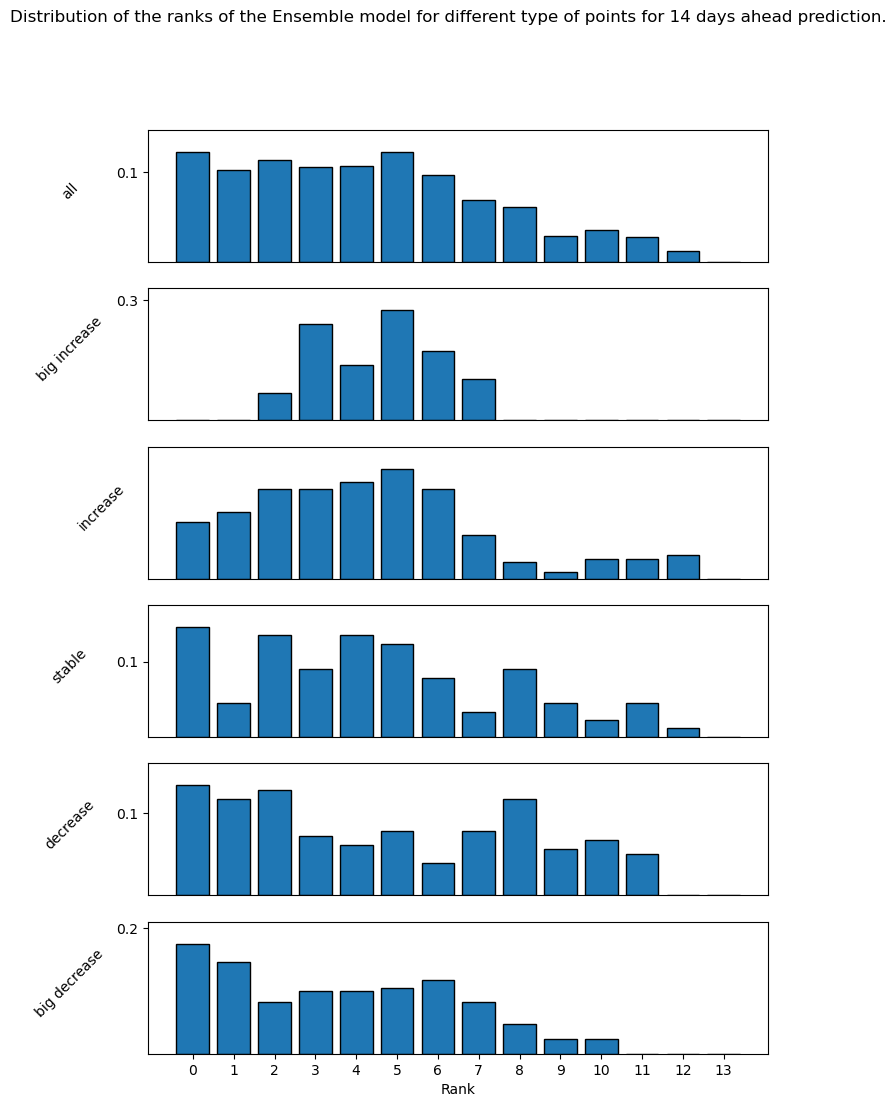

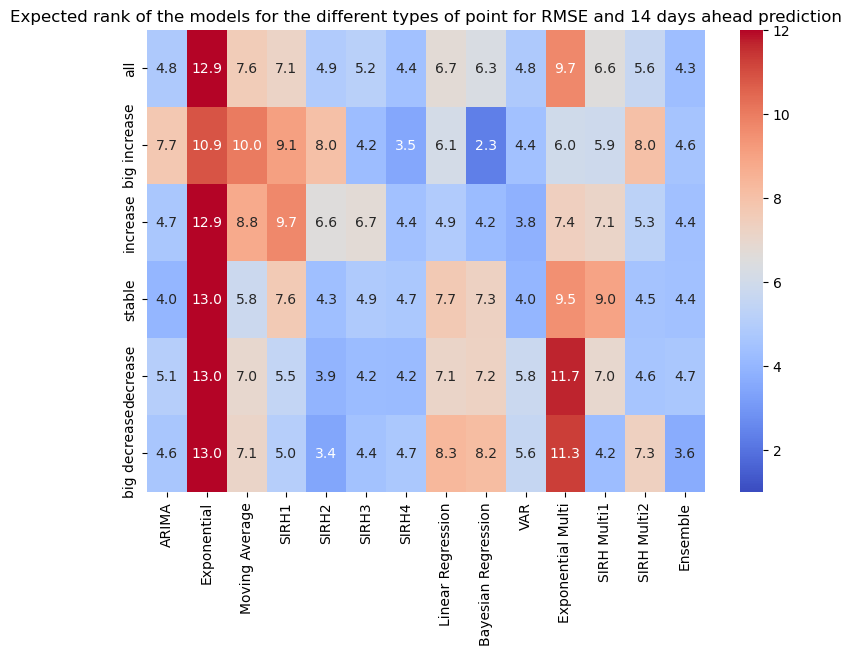

In [62]:
model_type='1D'
loss='RMSE'
reach='7'
list_of_models= models1Dnames+models3Dnames + ['Ensemble']
list_of_models.remove('Moving Average Multi')
# type_of_points=['all','big increase', 'increase' , 'stable', 'inflexion', 'decrease', 'big decrease']
type_of_points=['all','big increase', 'increase' , 'stable', 'decrease', 'big decrease']
for loss in [ 'RMSE']: 
    
    for reach in ['7', '14']:
        if reach == '7':
            regressor=regressor_7_days
            is_in_test_set=is_in_test_set_7
        else :
            regressor=regressor_14_days
            is_in_test_set=is_in_test_set_14
        ranks_ensb=np.zeros((7,14))
        
        df_expected_ranks=pd.DataFrame(columns= list_of_models, index = type_of_points )
        for numeropoint, label_point in enumerate( type_of_points):
        # for label_point in ['all']:
            
            all_ranks=np.zeros((len(list_of_models), len(list_of_models)))
            results_list=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if loss in name and '1D' in name and 'reach_='+str(reach) in name and is_in_test_set(name)  ] # results of the models
            for name in results_list :
                mob=int(name.split('_')[-5])
                pand=int(name.split('_')[-4])
                dicoresults1=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
                dicoresults2=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name.replace('1D', '3D')))
                dicoresults=concat_dico(dicoresults1, dicoresults2)
                df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
                df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
                df.drop(['Unnamed: 0'], axis=1, inplace=True)
                n_hospitalized = np.array(df.loc['n_hospitalized'])
                r_eff=np.array(df.loc['r_eff'])
                indexs_points=[[20*i] for i in range(1, 15) ] 
                prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
                prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
                prediction.index=[20*i for i in range(1, 15)]
                prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi', 'Moving Average Multi'], axis=1)
                prediction_all=prediction
                prediction=prediction_bis
                for point in indexs_points: 
                    if n_hospitalized[point[0]] >= 100 :
                        if label_point=='all': 
                            # ensemble_value=prediction.loc[point[0]].mean()
                            ensemble_value=np.matmul(np.array(prediction.loc[point[0]]), regressor.coef_) + regressor.intercept_
                            real_value=prediction_all['Real values'].loc[point[0]]
                            ensemble_perf=np.sqrt((ensemble_value-real_value)**2)
                            perfs=dicoresults[str(point)]
                            assert(len(perfs)==14)
                            assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
                            perfs.pop(11) # remove the moving average multi
                            assert(len(perfs)==13)
                            perfs.append(ensemble_perf)
                            rankings=get_classement(perfs)
                            for i in range(len(rankings)): 
                                rank_model_i=rankings[i]
                                all_ranks[i][rank_model_i]+=1

                        # elif classify(point[0], n_hospitalized) == label_point :
                        elif classify_bis(point[0], r_eff) == label_point :
                            # ensemble_value=prediction.loc[point[0]].mean()
                            ensemble_value=np.matmul(np.array(prediction.loc[point[0]]), regressor.coef_) + regressor.intercept_
                            real_value=prediction_all['Real values'].loc[point[0]]
                            ensemble_perf=np.sqrt((ensemble_value-real_value)**2)
                            perfs=dicoresults[str(point)]
                            assert(len(perfs)==14)
                            assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
                            perfs.pop(11) # remove the moving average multi
                            assert(len(perfs)==13)
                            perfs.append(ensemble_perf)
                            
                            rankings=get_classement(perfs)
                            for i in range(len(rankings)): 
                                rank_model_i=rankings[i]
                                all_ranks[i][rank_model_i]+=1
            

            ranks_ensb[numeropoint]=all_ranks[-1]
            fig, axs = plt.subplots(len(list_of_models), figsize=(8, 12))     
            expected_ranks=[np.sum((np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])))*np.array([i for i in range( len(rankings))])) for i in range(len(rankings))]    
            for i in range(len(rankings)):   
                axs[i].bar([j for j in range(len(rankings))], np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])), edgecolor='black', width = 0.5)
                axs[i].set_yticks([ round(np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))), 1) ])
                axs[i].set_ylim(bottom = 0 , top = (np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))))*1.2)
                axs[i].set_ylabel(list_of_models[i], labelpad=30)
                axs[i].yaxis.label.set_rotation(45)
                if i != len(rankings)-1:
                    axs[i].set_xticks([])
                else : 
                    axs[i].set_xticks([j for j in range(len(rankings))])
                    axs[i].set_xlabel('Rank'  )
                fig.suptitle('Distribution of the ranks of each model for '+label_point+' points for '+loss+' and '+reach+' days ahead prediction.')

            plt.show()
            plt.figure(figsize=(10, 6))
            exp_copy=expected_ranks.copy()
            expected_ranks.sort()
            df_expected_ranks.loc[label_point]=exp_copy
            plt.bar(sort_list(list_of_models, exp_copy), expected_ranks, edgecolor='black')
            plt.xticks(rotation=90)
            plt.title('Expected rank of each model for '+label_point+' points for '+loss+' and '+reach+' days ahead prediction.')
            plt.show()
        fig, ax = plt.subplots(len(type_of_points) , figsize=(8, 12))
        for i in range(len(type_of_points)): 
            ax[i].bar([j for j in range(14)], np.array(ranks_ensb[i])/(np.sum(np.array(ranks_ensb[i]))), edgecolor='black')
            ax[i].set_yticks([ round(np.max(ranks_ensb[i])/np.sum(ranks_ensb[i]), 1) ])
            ax[i].set_ylim(bottom = 0 , top = (np.max(ranks_ensb[i])/np.sum(ranks_ensb[i]))*1.2)
            ax[i].set_ylabel(type_of_points[i], labelpad=30)
            ax[i].yaxis.label.set_rotation(45)
            if i != len(type_of_points)-1:
                ax[i].set_xticks([])
            else : 
                ax[i].set_xticks([j for j in range(14)])
                ax[i].set_xlabel('Rank'  )
            fig.suptitle('Distribution of the ranks of the Ensemble model for different type of points for '+reach+' days ahead prediction.')
            
        plt.figure(figsize=(9,6))
        sns.heatmap(df_expected_ranks.astype(float), cmap='coolwarm', annot=True, fmt=".1f", vmin=1, vmax=12)
        xticks = list_of_models
        yticks =type_of_points
        plt.xticks(ticks=[i+0.5 for i in range(len(xticks))], labels=xticks, rotation=90)
        plt.yticks(ticks=[i+0.5 for i in range(len(yticks))], labels=yticks, rotation=90)
        plt.title('Expected rank of the models for the different types of point for '+str(loss)+' and '+str(reach)+' days ahead prediction')
        plt.show()
    

Next cells to correct infs in the dataframes

In [45]:
if False : 
    names = os.listdir('./results/global_evaluation_from_zero/') 
    for name in names: 
        df=pd.DataFrame(json.load(open('./results/global_evaluation_from_zero/'+name)))
        if len(df.index) == 9 : 
            df.index=models1Dnames
        elif len(df.index) == 5 :
            df.index=models3Dnames
        else : 
            raise ValueError('error')

        for col in df.columns: 
            for row in df.index: 
                if df[col][row]==np.inf: 
                    if len(df.index) == 9 : 
                        df[col][row]=df[col]['Moving Average'] + 0.00001
                    elif len(df.index) == 5 :
                        df[col][row]=df[col]['Moving Average Multi'] + 0.00001
                    else : 
                        raise ValueError('error')
        if '1D' in name : 
            df.index=[i for i in range(9)]
        elif '3D' in name : 
            df.index=[i for i in range(5)]
        else : 
            raise ValueError('error')
        df.to_csv('./results/global_evaluation_from_zero_corrected/'+name.split('.')[0]+'.csv')


In [46]:
if False: 
    names = os.listdir('./results/predictions_of_the_models/')
    for name in names : 
        df=pd.read_csv('./results/predictions_of_the_models/'+name)
        df=df.set_index('Unnamed: 0')

        for col in df.columns:
            for row in df.index: 
                if df[col][row]==np.inf: 
                    df[col][row]=df['Moving Average'][row]

        df.to_csv('./results/predictions_of_the_models_corrected/'+name)
